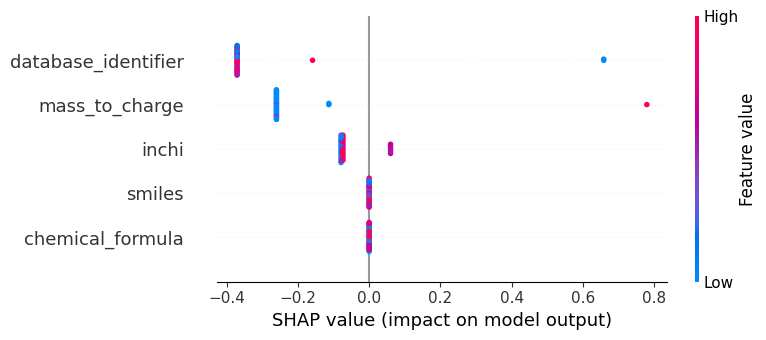

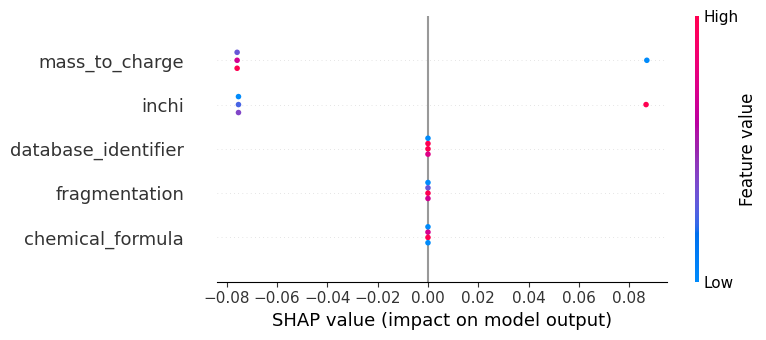

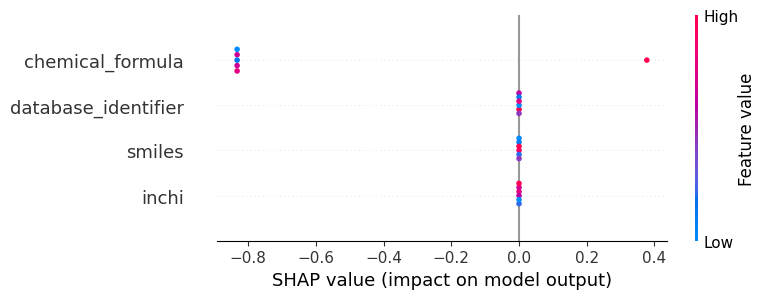

In [55]:
# Explain the model's predictions using SHAP for Curcuma Data 1
explainer_curcuma1 = shap.TreeExplainer(final_model_curcuma1)
shap_values_curcuma1 = explainer_curcuma1.shap_values(curcuma_data1_selected)

# Plot the SHAP summary plot for Curcuma Data 1
shap.summary_plot(shap_values_curcuma1, curcuma_data1_selected)

# Explain the model's predictions using SHAP for Curcuma Data 2
explainer_curcuma2 = shap.TreeExplainer(final_model_curcuma2)
shap_values_curcuma2 = explainer_curcuma2.shap_values(curcuma_data2_selected)

# Plot the SHAP summary plot for Curcuma Data 2
shap.summary_plot(shap_values_curcuma2, curcuma_data2_selected)

# Explain the model's predictions using SHAP for Saffron Data
if len(y_saffron.unique()) > 1:
    explainer_saffron = shap.TreeExplainer(final_model_saffron)
    shap_values_saffron = explainer_saffron.shap_values(saffron_data_selected)

    # Plot the SHAP summary plot for Saffron Data
    shap.summary_plot(shap_values_saffron, saffron_data_selected)
else:
    print("Saffron Data has only one class present. Skipping SHAP analysis.")


Best parameters found for Curcuma Data 2:  {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 50, 'scale_pos_weight': 2.0}
Best F1-Score for Curcuma Data 2:  0.5333333333333333
Curcuma Data 2 Evaluation with Cost-Sensitive Learning:
              precision    recall  f1-score   support

           0       0.00      1.00      0.00       0.0
           1       1.00      0.00      0.00       1.0

    accuracy                           0.00       1.0
   macro avg       0.50      0.50      0.00       1.0
weighted avg       1.00      0.00      0.00       1.0



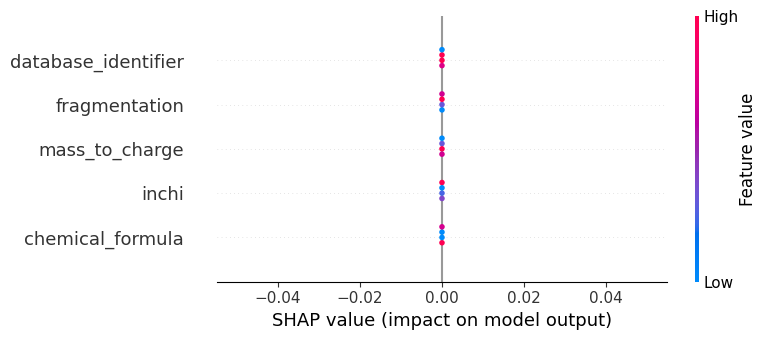

Best parameters found for Saffron:  {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 50, 'scale_pos_weight': 3.0}
Best F1-Score for Saffron:  0.6428571428571428
Saffron Data Evaluation with Cost-Sensitive Learning:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2



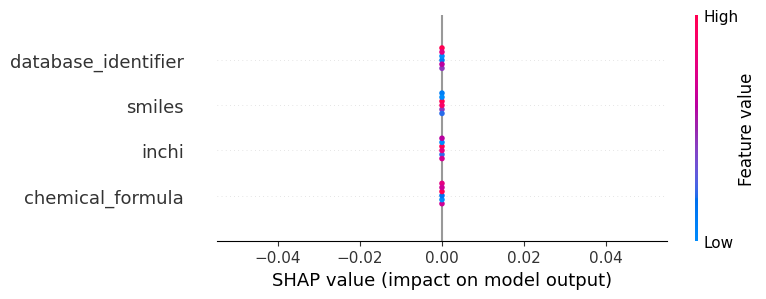

In [61]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, f1_score, make_scorer
import shap
import numpy as np

# Custom scorer for F1-Score
def custom_f1_score(y_true, y_pred):
    return f1_score(y_true, y_pred, average='weighted', zero_division=1)

custom_scorer = make_scorer(custom_f1_score, greater_is_better=True)

# Function to find best hyperparameters manually
def find_best_hyperparameters(X_train, y_train):
    best_f1_score = 0
    best_params = None
    learning_rates = [0.01, 0.1]
    max_depths = [3, 5]
    n_estimators = [50, 100]

    class_weights = (y_train == 0).sum() / max((y_train == 1).sum(), 1)
    scale_pos_weights = [class_weights]

    for lr in learning_rates:
        for md in max_depths:
            for ne in n_estimators:
                for spw in scale_pos_weights:
                    model = XGBClassifier(
                        random_state=42, 
                        learning_rate=lr, 
                        max_depth=md, 
                        n_estimators=ne, 
                        scale_pos_weight=spw
                    )
                    model.fit(X_train, y_train)
                    y_pred = model.predict(X_train)
                    f1 = f1_score(y_train, y_pred, average='weighted', zero_division=1)
                    if f1 > best_f1_score:
                        best_f1_score = f1
                        best_params = {
                            'learning_rate': lr,
                            'max_depth': md,
                            'n_estimators': ne,
                            'scale_pos_weight': spw
                        }
    return best_params, best_f1_score

# Curcuma Data 2
X_train_curcuma2, X_test_curcuma2, y_train_curcuma2, y_test_curcuma2 = train_test_split(
    curcuma_data2_selected, y_curcuma2, test_size=0.2, random_state=42)

best_params_curcuma2, best_f1_curcuma2 = find_best_hyperparameters(X_train_curcuma2, y_train_curcuma2)

print("Best parameters found for Curcuma Data 2: ", best_params_curcuma2)
print("Best F1-Score for Curcuma Data 2: ", best_f1_curcuma2)

final_model_curcuma2 = XGBClassifier(random_state=42, **best_params_curcuma2)
final_model_curcuma2.fit(X_train_curcuma2, y_train_curcuma2)

y_pred_curcuma2 = final_model_curcuma2.predict(X_test_curcuma2)
print("Curcuma Data 2 Evaluation with Cost-Sensitive Learning:")
print(classification_report(y_test_curcuma2, y_pred_curcuma2, zero_division=1))

# SHAP analysis for Curcuma Data 2
explainer_curcuma2 = shap.TreeExplainer(final_model_curcuma2)
shap_values_curcuma2 = explainer_curcuma2.shap_values(curcuma_data2_selected)
shap.summary_plot(shap_values_curcuma2, curcuma_data2_selected)

# Saffron Data
X_train_saffron, X_test_saffron, y_train_saffron, y_test_saffron = train_test_split(
    saffron_data_selected, y_saffron, test_size=0.2, random_state=42)

best_params_saffron, best_f1_saffron = find_best_hyperparameters(X_train_saffron, y_train_saffron)

print("Best parameters found for Saffron: ", best_params_saffron)
print("Best F1-Score for Saffron: ", best_f1_saffron)

final_model_saffron = XGBClassifier(random_state=42, **best_params_saffron)
final_model_saffron.fit(X_train_saffron, y_train_saffron)

y_pred_saffron = final_model_saffron.predict(X_test_saffron)
print("Saffron Data Evaluation with Cost-Sensitive Learning:")
print(classification_report(y_test_saffron, y_pred_saffron, zero_division=1))

# SHAP analysis for Saffron Data
explainer_saffron = shap.TreeExplainer(final_model_saffron)
shap_values_saffron = explainer_saffron.shap_values(saffron_data_selected)
shap.summary_plot(shap_values_saffron, saffron_data_selected)


Best parameters found for Curcuma Data 1:  {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 50, 'scale_pos_weight': 23.0}
Best F1-Score for Curcuma Data 1:  1.0
Curcuma Data 1 Evaluation with Cost-Sensitive Learning:
              precision    recall  f1-score   support

           0       0.83      1.00      0.91         5
           1       1.00      0.00      0.00         1

    accuracy                           0.83         6
   macro avg       0.92      0.50      0.45         6
weighted avg       0.86      0.83      0.76         6



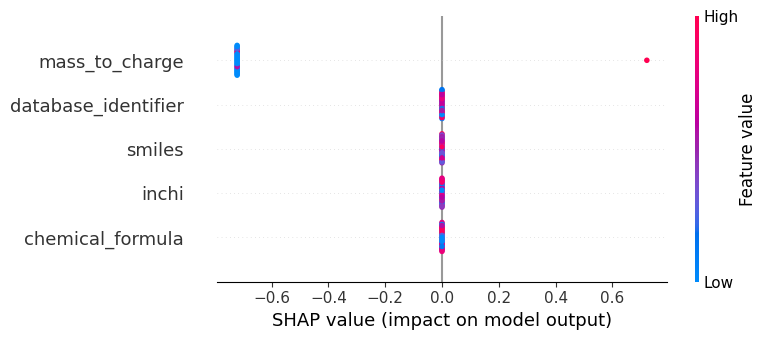

Best parameters found for Curcuma Data 2:  {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 50, 'scale_pos_weight': 2.0}
Best F1-Score for Curcuma Data 2:  0.5333333333333333
Curcuma Data 2 Evaluation with Cost-Sensitive Learning:
              precision    recall  f1-score   support

           0       0.00      1.00      0.00       0.0
           1       1.00      0.00      0.00       1.0

    accuracy                           0.00       1.0
   macro avg       0.50      0.50      0.00       1.0
weighted avg       1.00      0.00      0.00       1.0



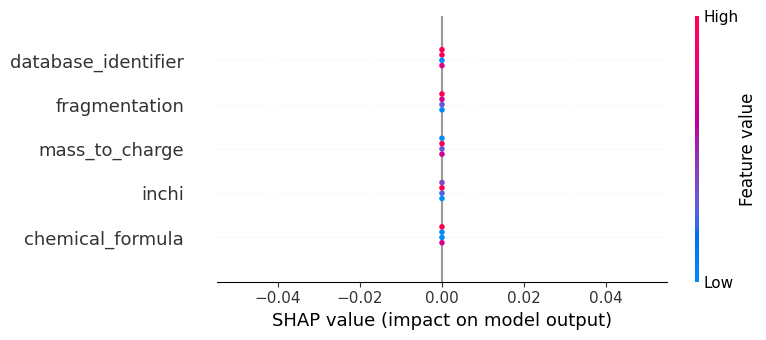

Best parameters found for Saffron:  {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 50, 'scale_pos_weight': 3.0}
Best F1-Score for Saffron:  0.6428571428571428
Saffron Data Evaluation with Cost-Sensitive Learning:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2



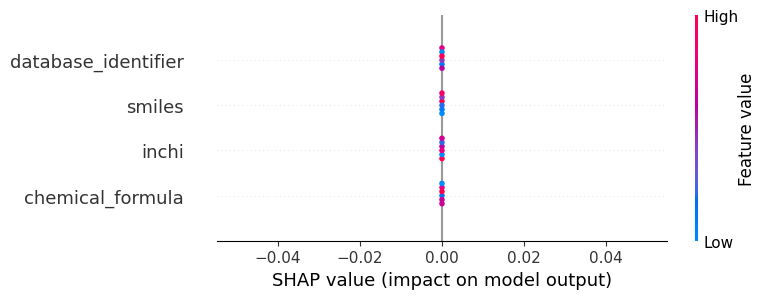

In [62]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, f1_score, make_scorer
import shap
import numpy as np

# Custom scorer for F1-Score
def custom_f1_score(y_true, y_pred):
    return f1_score(y_true, y_pred, average='weighted', zero_division=1)

custom_scorer = make_scorer(custom_f1_score, greater_is_better=True)

# Function to find best hyperparameters manually
def find_best_hyperparameters(X_train, y_train):
    best_f1_score = 0
    best_params = None
    learning_rates = [0.01, 0.1]
    max_depths = [3, 5]
    n_estimators = [50, 100]

    class_weights = (y_train == 0).sum() / max((y_train == 1).sum(), 1)
    scale_pos_weights = [class_weights]

    for lr in learning_rates:
        for md in max_depths:
            for ne in n_estimators:
                for spw in scale_pos_weights:
                    model = XGBClassifier(
                        random_state=42, 
                        learning_rate=lr, 
                        max_depth=md, 
                        n_estimators=ne, 
                        scale_pos_weight=spw
                    )
                    model.fit(X_train, y_train)
                    y_pred = model.predict(X_train)
                    f1 = f1_score(y_train, y_pred, average='weighted', zero_division=1)
                    if f1 > best_f1_score:
                        best_f1_score = f1
                        best_params = {
                            'learning_rate': lr,
                            'max_depth': md,
                            'n_estimators': ne,
                            'scale_pos_weight': spw
                        }
    return best_params, best_f1_score

# Curcuma Data 1
X_train_curcuma1, X_test_curcuma1, y_train_curcuma1, y_test_curcuma1 = train_test_split(
    curcuma_data1_selected, y_curcuma1, test_size=0.2, random_state=42)

best_params_curcuma1, best_f1_curcuma1 = find_best_hyperparameters(X_train_curcuma1, y_train_curcuma1)

print("Best parameters found for Curcuma Data 1: ", best_params_curcuma1)
print("Best F1-Score for Curcuma Data 1: ", best_f1_curcuma1)

final_model_curcuma1 = XGBClassifier(random_state=42, **best_params_curcuma1)
final_model_curcuma1.fit(X_train_curcuma1, y_train_curcuma1)

y_pred_curcuma1 = final_model_curcuma1.predict(X_test_curcuma1)
print("Curcuma Data 1 Evaluation with Cost-Sensitive Learning:")
print(classification_report(y_test_curcuma1, y_pred_curcuma1, zero_division=1))

# SHAP analysis for Curcuma Data 1
explainer_curcuma1 = shap.TreeExplainer(final_model_curcuma1)
shap_values_curcuma1 = explainer_curcuma1.shap_values(curcuma_data1_selected)
shap.summary_plot(shap_values_curcuma1, curcuma_data1_selected)

# Curcuma Data 2
X_train_curcuma2, X_test_curcuma2, y_train_curcuma2, y_test_curcuma2 = train_test_split(
    curcuma_data2_selected, y_curcuma2, test_size=0.2, random_state=42)

best_params_curcuma2, best_f1_curcuma2 = find_best_hyperparameters(X_train_curcuma2, y_train_curcuma2)

print("Best parameters found for Curcuma Data 2: ", best_params_curcuma2)
print("Best F1-Score for Curcuma Data 2: ", best_f1_curcuma2)

final_model_curcuma2 = XGBClassifier(random_state=42, **best_params_curcuma2)
final_model_curcuma2.fit(X_train_curcuma2, y_train_curcuma2)

y_pred_curcuma2 = final_model_curcuma2.predict(X_test_curcuma2)
print("Curcuma Data 2 Evaluation with Cost-Sensitive Learning:")
print(classification_report(y_test_curcuma2, y_pred_curcuma2, zero_division=1))

# SHAP analysis for Curcuma Data 2
explainer_curcuma2 = shap.TreeExplainer(final_model_curcuma2)
shap_values_curcuma2 = explainer_curcuma2.shap_values(curcuma_data2_selected)
shap.summary_plot(shap_values_curcuma2, curcuma_data2_selected)

# Saffron Data
X_train_saffron, X_test_saffron, y_train_saffron, y_test_saffron = train_test_split(
    saffron_data_selected, y_saffron, test_size=0.2, random_state=42)

best_params_saffron, best_f1_saffron = find_best_hyperparameters(X_train_saffron, y_train_saffron)

print("Best parameters found for Saffron: ", best_params_saffron)
print("Best F1-Score for Saffron: ", best_f1_saffron)

final_model_saffron = XGBClassifier(random_state=42, **best_params_saffron)
final_model_saffron.fit(X_train_saffron, y_train_saffron)

y_pred_saffron = final_model_saffron.predict(X_test_saffron)
print("Saffron Data Evaluation with Cost-Sensitive Learning:")
print(classification_report(y_test_saffron, y_pred_saffron, zero_division=1))

# SHAP analysis for Saffron Data
explainer_saffron = shap.TreeExplainer(final_model_saffron)
shap_values_saffron = explainer_saffron.shap_values(saffron_data_selected)
shap.summary_plot(shap_values_saffron, saffron_data_selected)


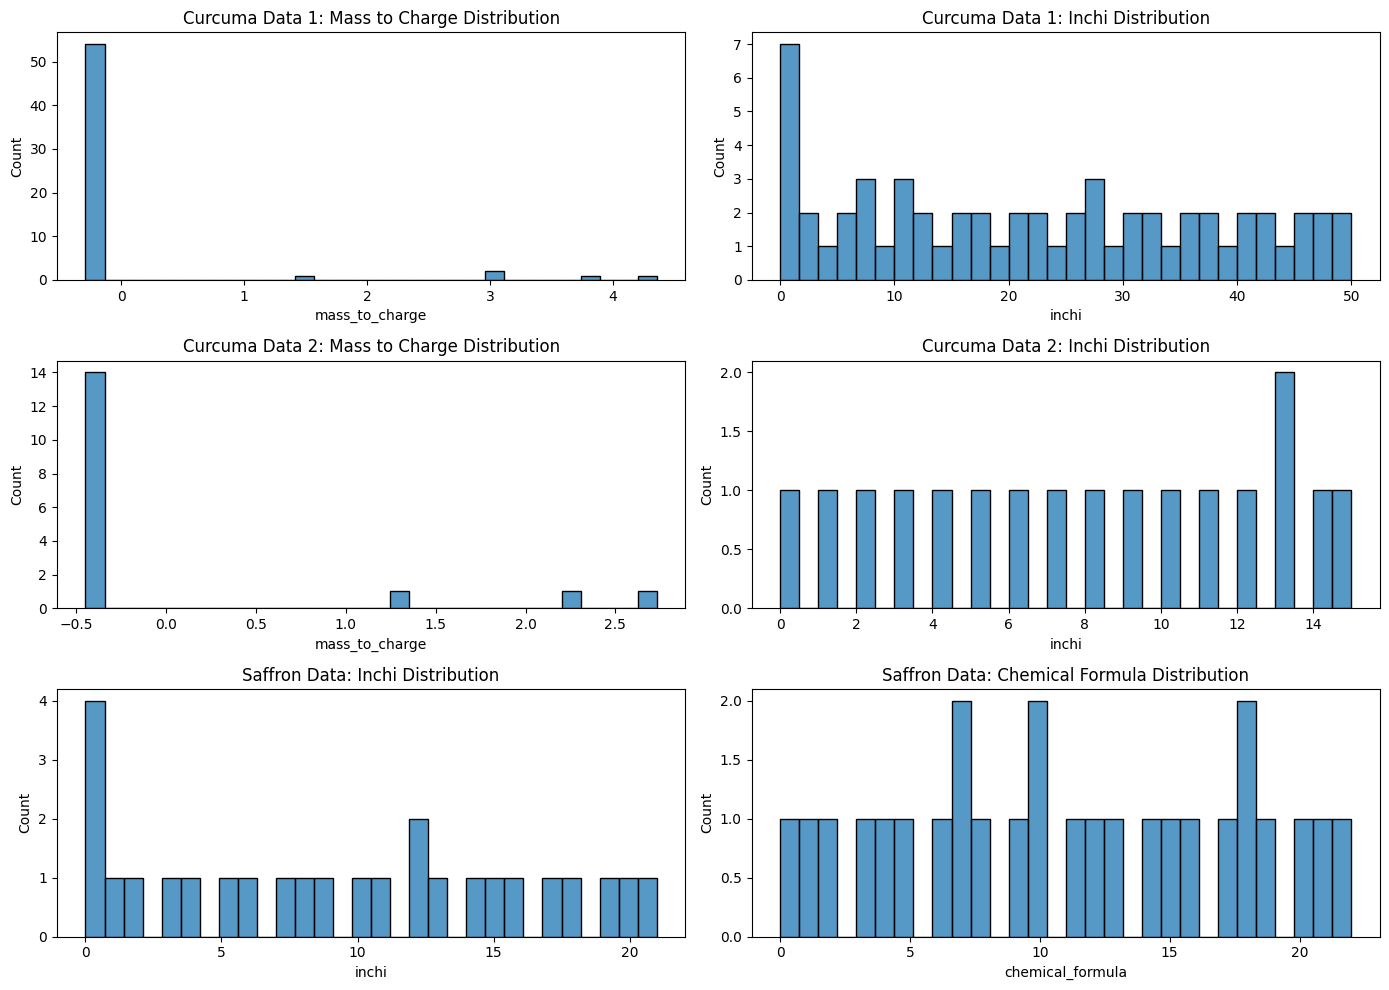

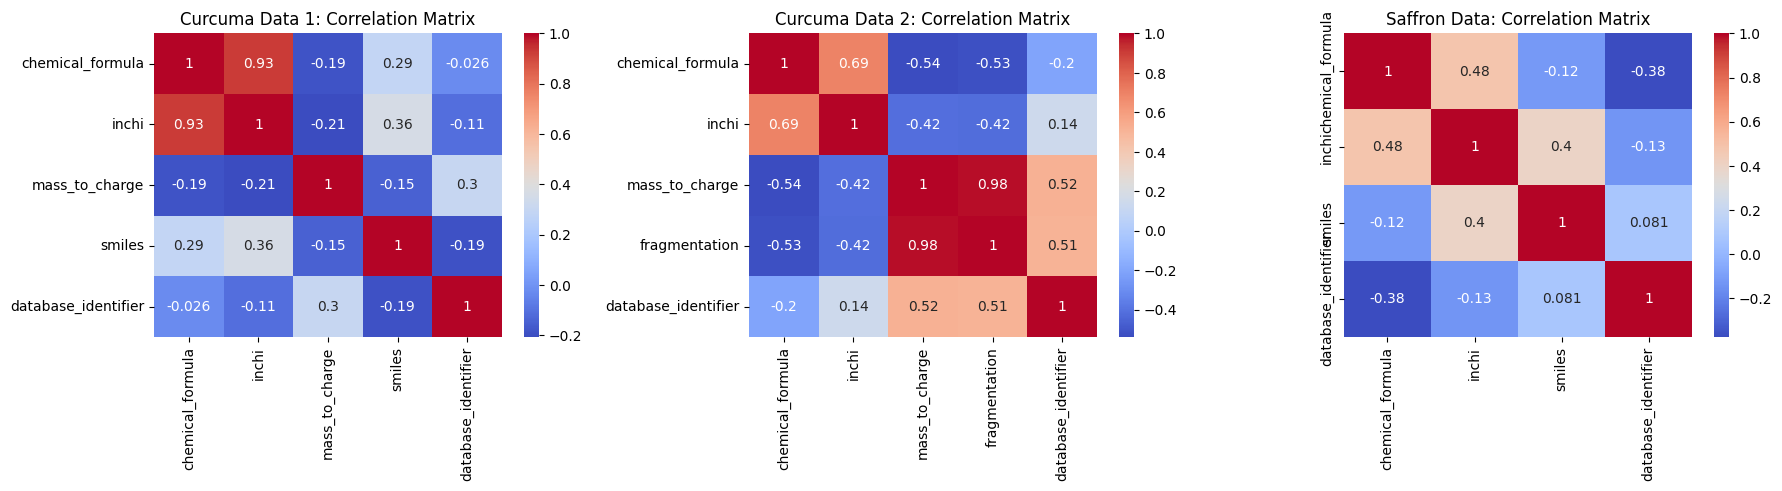

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot histograms for the numerical features
plt.figure(figsize=(14, 10))

# Curcuma Data 1
plt.subplot(3, 2, 1)
sns.histplot(curcuma_data1_selected['mass_to_charge'], bins=30)
plt.title('Curcuma Data 1: Mass to Charge Distribution')

plt.subplot(3, 2, 2)
sns.histplot(curcuma_data1_selected['inchi'], bins=30)
plt.title('Curcuma Data 1: Inchi Distribution')

# Curcuma Data 2
plt.subplot(3, 2, 3)
sns.histplot(curcuma_data2_selected['mass_to_charge'], bins=30)
plt.title('Curcuma Data 2: Mass to Charge Distribution')

plt.subplot(3, 2, 4)
sns.histplot(curcuma_data2_selected['inchi'], bins=30)
plt.title('Curcuma Data 2: Inchi Distribution')

# Saffron Data
plt.subplot(3, 2, 5)
sns.histplot(saffron_data_selected['inchi'], bins=30)
plt.title('Saffron Data: Inchi Distribution')

plt.subplot(3, 2, 6)
sns.histplot(saffron_data_selected['chemical_formula'], bins=30)
plt.title('Saffron Data: Chemical Formula Distribution')

plt.tight_layout()
plt.show()

# Plot correlation heatmaps for selected features
plt.figure(figsize=(18, 5))

plt.subplot(1, 3, 1)
sns.heatmap(curcuma_data1_selected.corr(), annot=True, cmap='coolwarm')
plt.title('Curcuma Data 1: Correlation Matrix')

plt.subplot(1, 3, 2)
sns.heatmap(curcuma_data2_selected.corr(), annot=True, cmap='coolwarm')
plt.title('Curcuma Data 2: Correlation Matrix')

plt.subplot(1, 3, 3)
sns.heatmap(saffron_data_selected.corr(), annot=True, cmap='coolwarm')
plt.title('Saffron Data: Correlation Matrix')

plt.tight_layout()
plt.show()


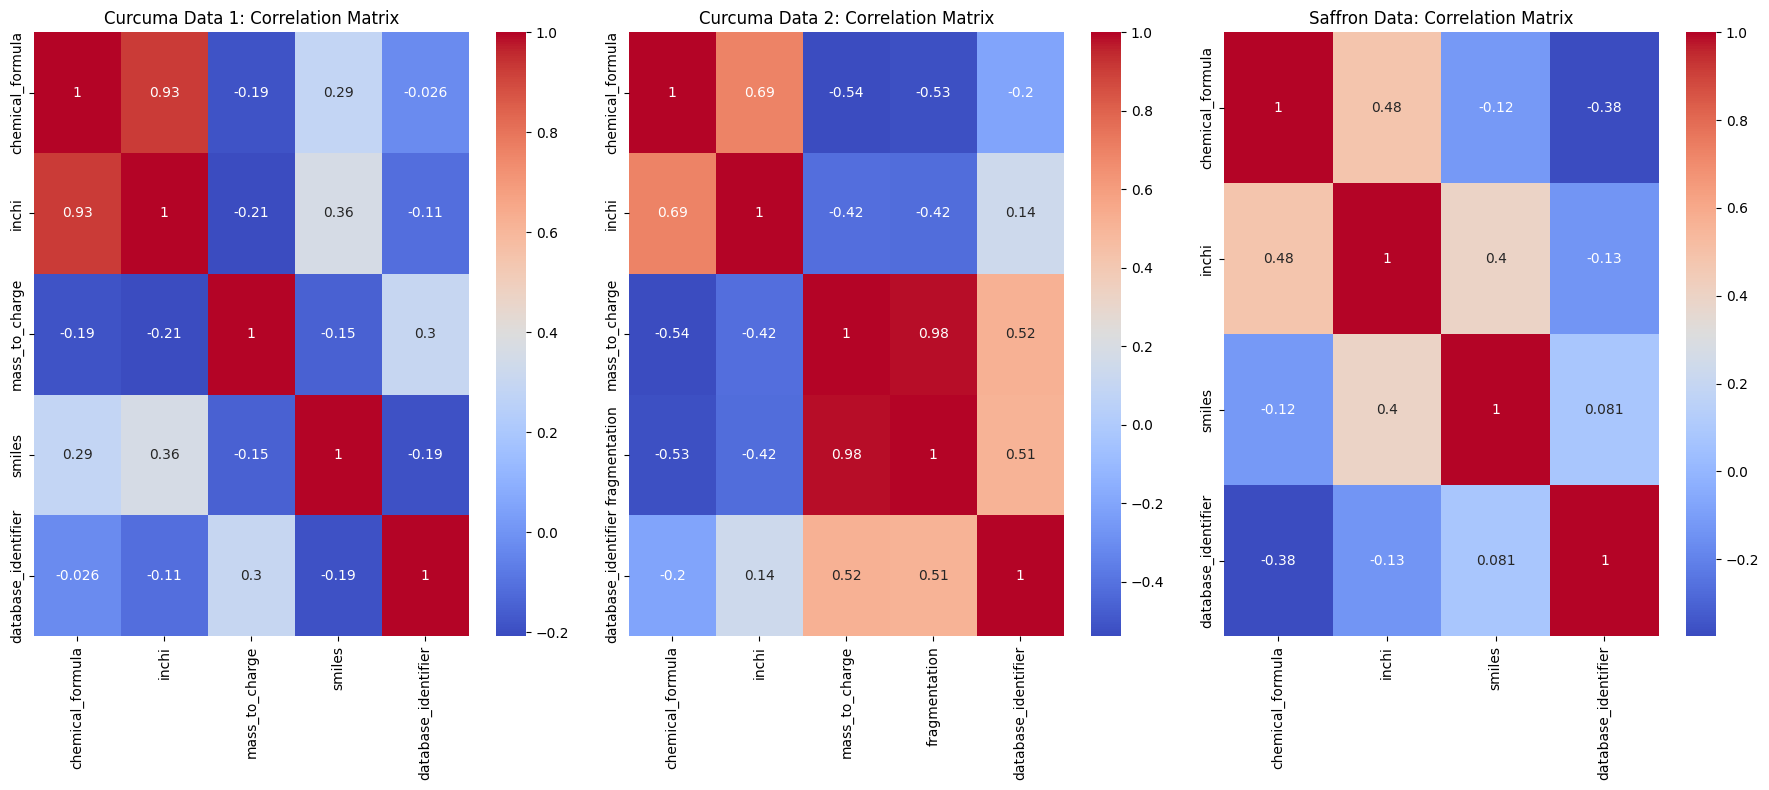

In [8]:
# Plot correlation heatmaps for selected features
plt.figure(figsize=(18, 8))

plt.subplot(1, 3, 1)
sns.heatmap(curcuma_data1_selected.corr(), annot=True, cmap='coolwarm')
plt.title('Curcuma Data 1: Correlation Matrix')

plt.subplot(1, 3, 2)
sns.heatmap(curcuma_data2_selected.corr(), annot=True, cmap='coolwarm')
plt.title('Curcuma Data 2: Correlation Matrix')

plt.subplot(1, 3, 3)
sns.heatmap(saffron_data_selected.corr(), annot=True, cmap='coolwarm')
plt.title('Saffron Data: Correlation Matrix')

plt.tight_layout()
plt.show()


<Figure size 1000x1000 with 0 Axes>

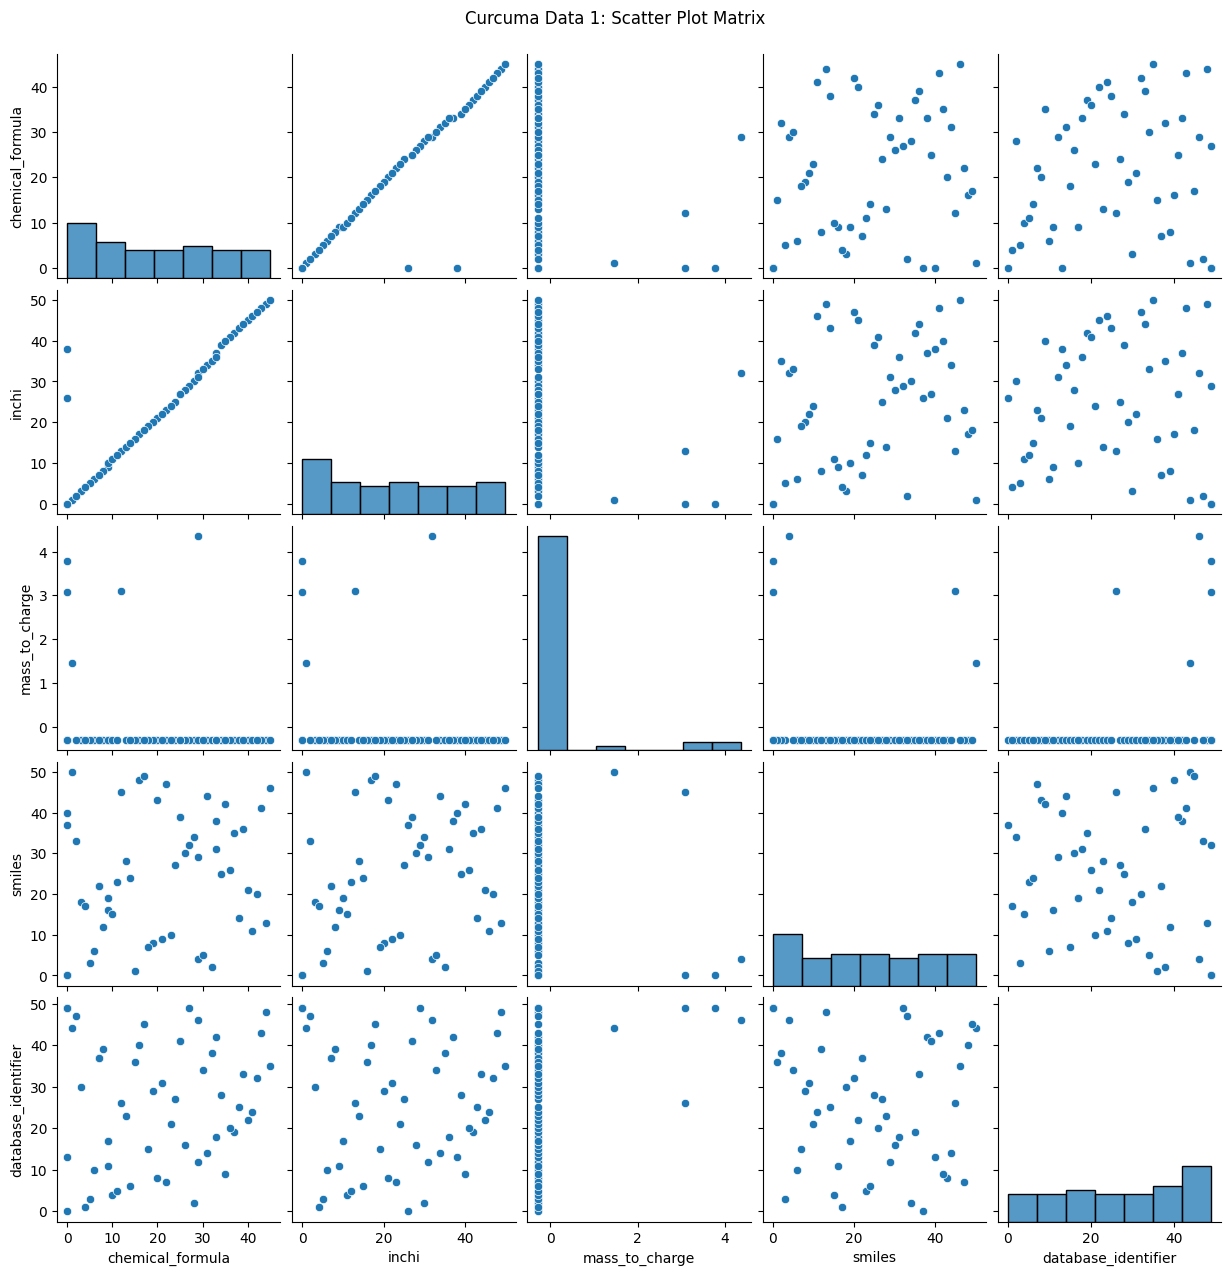

<Figure size 1000x1000 with 0 Axes>

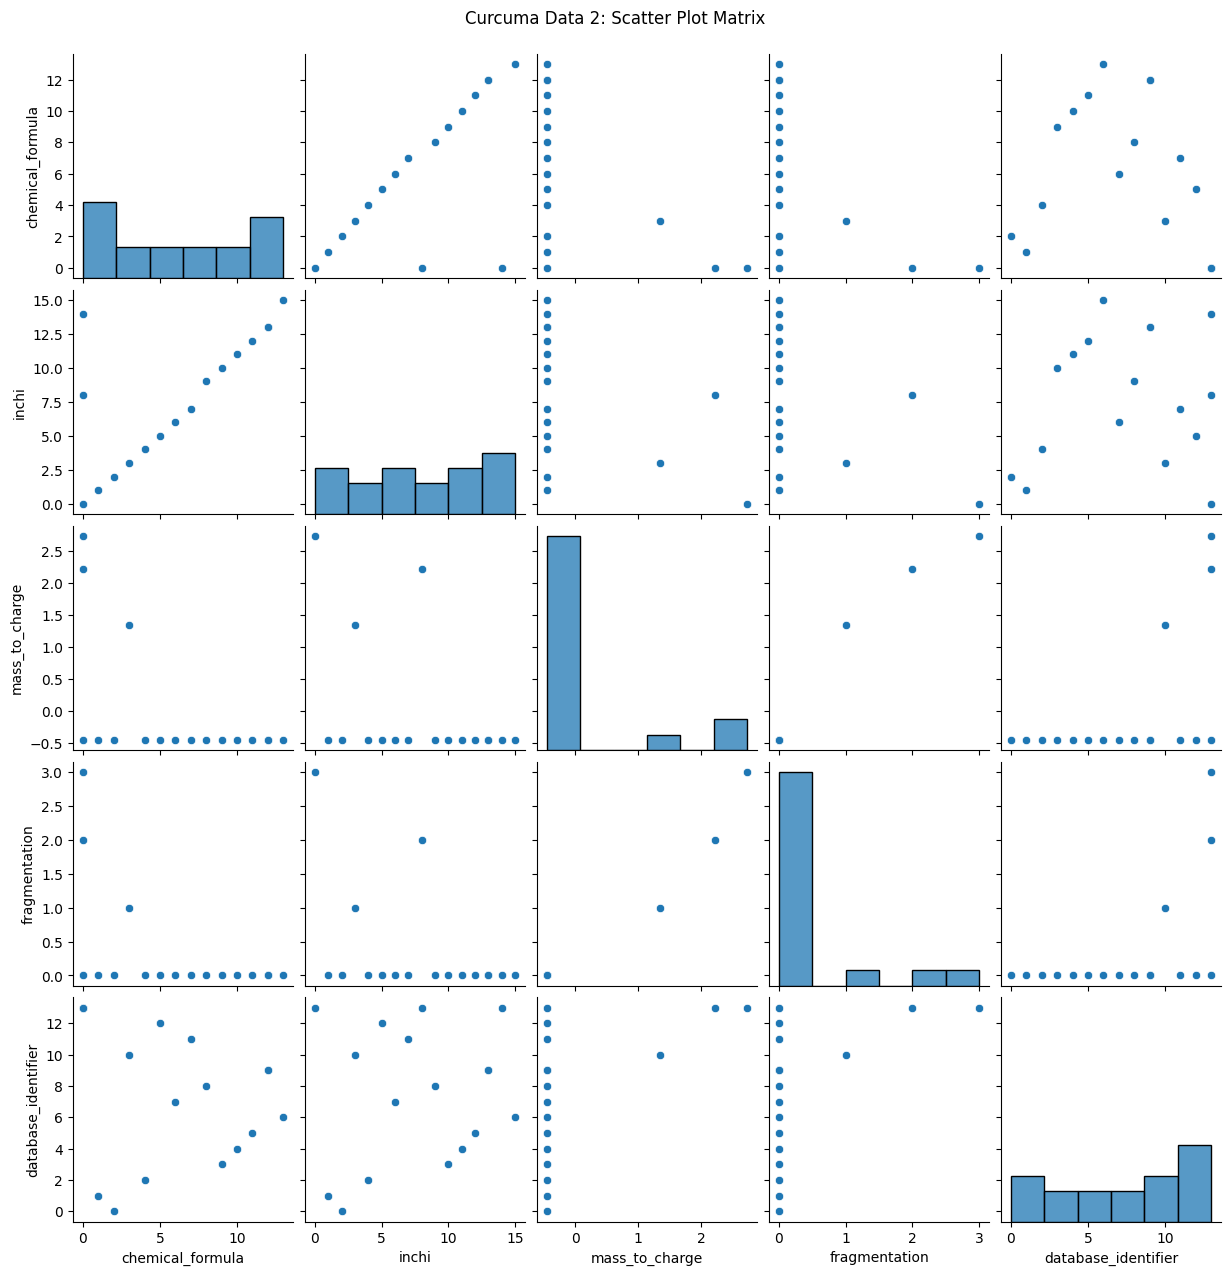

<Figure size 1000x1000 with 0 Axes>

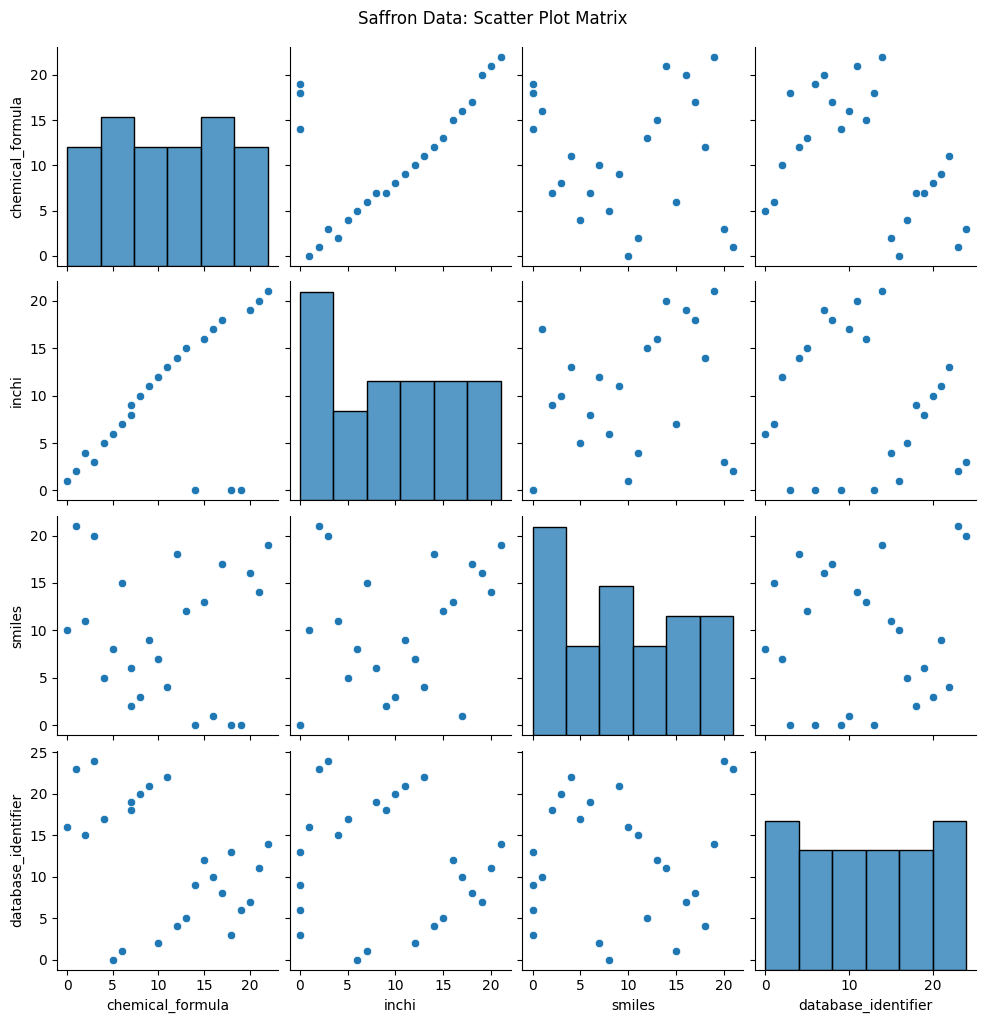

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.feature_selection import SelectKBest, f_classif

# Loading data
curcuma_data1 = pd.read_csv('C:/Users/Muqaddas Bano/Downloads/MTBLS2790_files/m_MTBLS2790_LC-MS_negative_reverse-phase_metabolite_profiling_v2_maf.tsv', sep='\t')
curcuma_data2 = pd.read_csv('C:/Users/Muqaddas Bano/Downloads/MTBLS2790_files/m_MTBLS2790_LC-MS_positive_reverse-phase_metabolite_profiling-1_v2_maf.tsv', sep='\t')
saffron_data = pd.read_csv('C:/Users/Muqaddas Bano/Downloads/MTBLS331_files/m_MTBLS331_uofc_hcc_serum_NMR_spectroscopy_v2_maf.tsv', sep='\t')

# Ensure data is cleaned
curcuma_data1.fillna(-1, inplace=True)
curcuma_data2.fillna(-1, inplace=True)
saffron_data.fillna(-1, inplace=True)

# Create binary indicator for the presence of curcumin and crocin
curcuma_compound = 'curcumin'
saffron_compound = 'crocin'

curcuma_data1['compound_presence'] = curcuma_data1['metabolite_identification'].apply(lambda x: 1 if curcuma_compound in str(x).lower() else 0)
curcuma_data2['compound_presence'] = curcuma_data2['metabolite_identification'].apply(lambda x: 1 if curcuma_compound in str(x).lower() else 0)
saffron_data['compound_presence'] = saffron_data['metabolite_identification'].apply(lambda x: 1 if saffron_compound in str(x).lower() else 0)

# Select relevant features and target variable
features = ['chemical_formula', 'inchi', 'mass_to_charge', 'retention_time', 'fragmentation', 'smallmolecule_abundance_sub', 'smallmolecule_abundance_stdev_sub', 'smallmolecule_abundance_std_error_sub', 'smiles', 'taxid', 'species', 'search_engine_score', 'database_identifier']
target_variable = 'compound_presence'

# Function to ensure all entries in a column are strings
def ensure_str(df, columns):
    for column in columns:
        if column in df.columns:
            df[column] = df[column].astype(str)
    return df

# Convert relevant columns to strings
curcuma_data1 = ensure_str(curcuma_data1, ['chemical_formula', 'inchi', 'smiles', 'taxid', 'species', 'database_identifier'])
curcuma_data2 = ensure_str(curcuma_data2, ['chemical_formula', 'inchi', 'smiles', 'taxid', 'species', 'database_identifier'])
saffron_data = ensure_str(saffron_data, ['chemical_formula', 'inchi', 'smiles', 'taxid', 'species', 'database_identifier'])

# Encode categorical features
def encode_categorical_features(df, features):
    le = LabelEncoder()
    for feature in features:
        if feature in df.columns and df[feature].dtype == 'object':
            df[feature] = le.fit_transform(df[feature].astype(str))
    return df

curcuma_data1_encoded = encode_categorical_features(curcuma_data1, features)
curcuma_data2_encoded = encode_categorical_features(curcuma_data2, features)
saffron_data_encoded = encode_categorical_features(saffron_data, features)

# Normalizing the numerical features
def normalize_features(df, numerical_features):
    scaler = StandardScaler()
    for feature in numerical_features:
        if feature in df.columns:
            df[feature] = scaler.fit_transform(df[[feature]])
    return df

numerical_features = ['mass_to_charge', 'retention_time']
curcuma_data1_encoded = normalize_features(curcuma_data1_encoded, numerical_features)
curcuma_data2_encoded = normalize_features(curcuma_data2_encoded, numerical_features)
saffron_data_encoded = normalize_features(saffron_data_encoded, numerical_features)

# Remove constant features
def remove_constant_features(df):
    return df.loc[:, (df != df.iloc[0]).any()]

curcuma_data1_encoded = remove_constant_features(curcuma_data1_encoded)
curcuma_data2_encoded = remove_constant_features(curcuma_data2_encoded)
saffron_data_encoded = remove_constant_features(saffron_data_encoded)

# Feature selection
def select_features(df, features, target_variable, k=5):
    present_features = [feature for feature in features if feature in df.columns]
    X = df[present_features]
    y = df[target_variable]
    selector = SelectKBest(score_func=f_classif, k=min(k, len(present_features)))
    X_new = selector.fit_transform(X, y)
    selected_features = X.columns[selector.get_support()]
    return df[selected_features]

curcuma_data1_selected = select_features(curcuma_data1_encoded, features, target_variable)
curcuma_data2_selected = select_features(curcuma_data2_encoded, features, target_variable)
saffron_data_selected = select_features(saffron_data_encoded, features, target_variable)

# Scatter plot matrix (pairplot) for selected features

# Curcuma Data 1
plt.figure(figsize=(10, 10))
sns.pairplot(curcuma_data1_selected)
plt.suptitle('Curcuma Data 1: Scatter Plot Matrix', y=1.02)
plt.show()

# Curcuma Data 2
plt.figure(figsize=(10, 10))
sns.pairplot(curcuma_data2_selected)
plt.suptitle('Curcuma Data 2: Scatter Plot Matrix', y=1.02)
plt.show()

# Saffron Data
plt.figure(figsize=(10, 10))
sns.pairplot(saffron_data_selected)
plt.suptitle('Saffron Data: Scatter Plot Matrix', y=1.02)
plt.show()


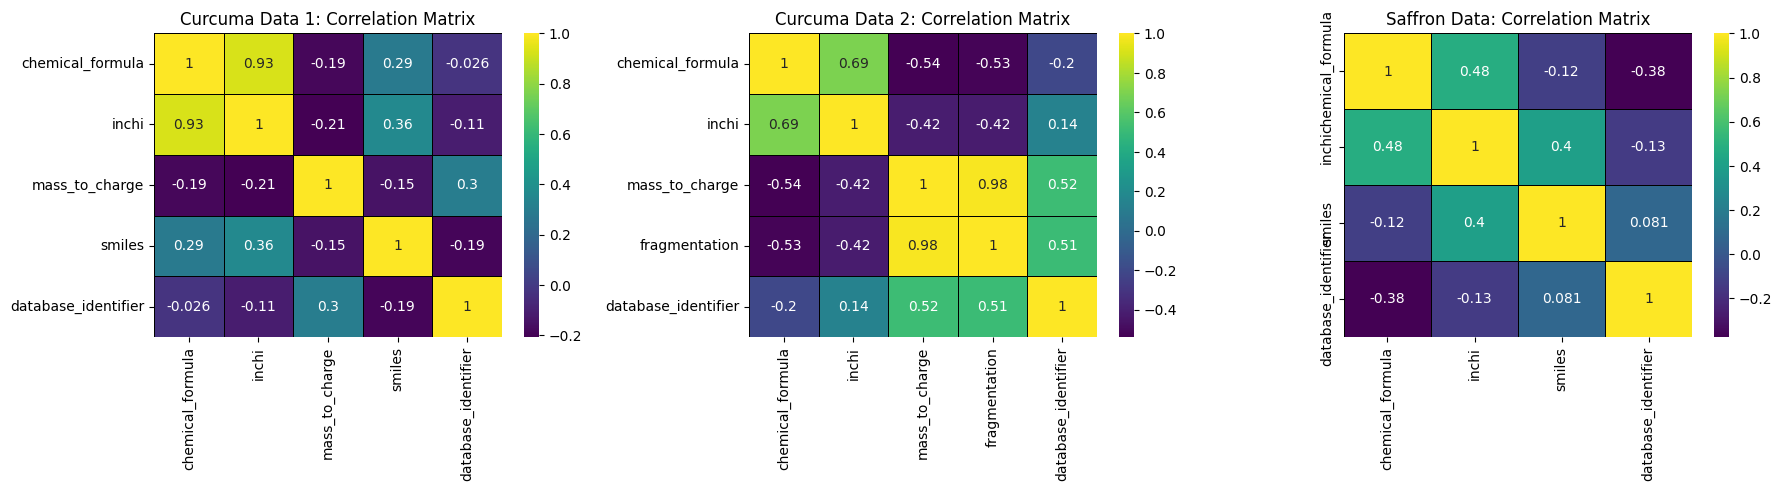

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.feature_selection import SelectKBest, f_classif

# Loading data
curcuma_data1 = pd.read_csv('C:/Users/Muqaddas Bano/Downloads/MTBLS2790_files/m_MTBLS2790_LC-MS_negative_reverse-phase_metabolite_profiling_v2_maf.tsv', sep='\t')
curcuma_data2 = pd.read_csv('C:/Users/Muqaddas Bano/Downloads/MTBLS2790_files/m_MTBLS2790_LC-MS_positive_reverse-phase_metabolite_profiling-1_v2_maf.tsv', sep='\t')
saffron_data = pd.read_csv('C:/Users/Muqaddas Bano/Downloads/MTBLS331_files/m_MTBLS331_uofc_hcc_serum_NMR_spectroscopy_v2_maf.tsv', sep='\t')

# Ensure data is cleaned
curcuma_data1.fillna(-1, inplace=True)
curcuma_data2.fillna(-1, inplace=True)
saffron_data.fillna(-1, inplace=True)

# Create binary indicator for the presence of curcumin and crocin
curcuma_compound = 'curcumin'
saffron_compound = 'crocin'

curcuma_data1['compound_presence'] = curcuma_data1['metabolite_identification'].apply(lambda x: 1 if curcuma_compound in str(x).lower() else 0)
curcuma_data2['compound_presence'] = curcuma_data2['metabolite_identification'].apply(lambda x: 1 if curcuma_compound in str(x).lower() else 0)
saffron_data['compound_presence'] = saffron_data['metabolite_identification'].apply(lambda x: 1 if saffron_compound in str(x).lower() else 0)

# Select relevant features and target variable
features = ['chemical_formula', 'inchi', 'mass_to_charge', 'retention_time', 'fragmentation', 'smallmolecule_abundance_sub', 'smallmolecule_abundance_stdev_sub', 'smallmolecule_abundance_std_error_sub', 'smiles', 'taxid', 'species', 'search_engine_score', 'database_identifier']
target_variable = 'compound_presence'

# Function to ensure all entries in a column are strings
def ensure_str(df, columns):
    for column in columns:
        if column in df.columns:
            df[column] = df[column].astype(str)
    return df

# Convert relevant columns to strings
curcuma_data1 = ensure_str(curcuma_data1, ['chemical_formula', 'inchi', 'smiles', 'taxid', 'species', 'database_identifier'])
curcuma_data2 = ensure_str(curcuma_data2, ['chemical_formula', 'inchi', 'smiles', 'taxid', 'species', 'database_identifier'])
saffron_data = ensure_str(saffron_data, ['chemical_formula', 'inchi', 'smiles', 'taxid', 'species', 'database_identifier'])

# Encode categorical features
def encode_categorical_features(df, features):
    le = LabelEncoder()
    for feature in features:
        if feature in df.columns and df[feature].dtype == 'object':
            df[feature] = le.fit_transform(df[feature].astype(str))
    return df

curcuma_data1_encoded = encode_categorical_features(curcuma_data1, features)
curcuma_data2_encoded = encode_categorical_features(curcuma_data2, features)
saffron_data_encoded = encode_categorical_features(saffron_data, features)

# Normalizing the numerical features
def normalize_features(df, numerical_features):
    scaler = StandardScaler()
    for feature in numerical_features:
        if feature in df.columns:
            df[feature] = scaler.fit_transform(df[[feature]])
    return df

numerical_features = ['mass_to_charge', 'retention_time']
curcuma_data1_encoded = normalize_features(curcuma_data1_encoded, numerical_features)
curcuma_data2_encoded = normalize_features(curcuma_data2_encoded, numerical_features)
saffron_data_encoded = normalize_features(saffron_data_encoded, numerical_features)

# Remove constant features
def remove_constant_features(df):
    return df.loc[:, (df != df.iloc[0]).any()]

curcuma_data1_encoded = remove_constant_features(curcuma_data1_encoded)
curcuma_data2_encoded = remove_constant_features(curcuma_data2_encoded)
saffron_data_encoded = remove_constant_features(saffron_data_encoded)

# Feature selection
def select_features(df, features, target_variable, k=5):
    present_features = [feature for feature in features if feature in df.columns]
    X = df[present_features]
    y = df[target_variable]
    selector = SelectKBest(score_func=f_classif, k=min(k, len(present_features)))
    X_new = selector.fit_transform(X, y)
    selected_features = X.columns[selector.get_support()]
    return df[selected_features]

curcuma_data1_selected = select_features(curcuma_data1_encoded, features, target_variable)
curcuma_data2_selected = select_features(curcuma_data2_encoded, features, target_variable)
saffron_data_selected = select_features(saffron_data_encoded, features, target_variable)

# Plot correlation heatmaps with different design
plt.figure(figsize=(18, 5))

plt.subplot(1, 3, 1)
sns.heatmap(curcuma_data1_selected.corr(), annot=True, cmap='viridis', linewidths=.5, linecolor='black')
plt.title('Curcuma Data 1: Correlation Matrix')

plt.subplot(1, 3, 2)
sns.heatmap(curcuma_data2_selected.corr(), annot=True, cmap='viridis', linewidths=.5, linecolor='black')
plt.title('Curcuma Data 2: Correlation Matrix')

plt.subplot(1, 3, 3)
sns.heatmap(saffron_data_selected.corr(), annot=True, cmap='viridis', linewidths=.5, linecolor='black')
plt.title('Saffron Data: Correlation Matrix')

plt.tight_layout()
plt.show()


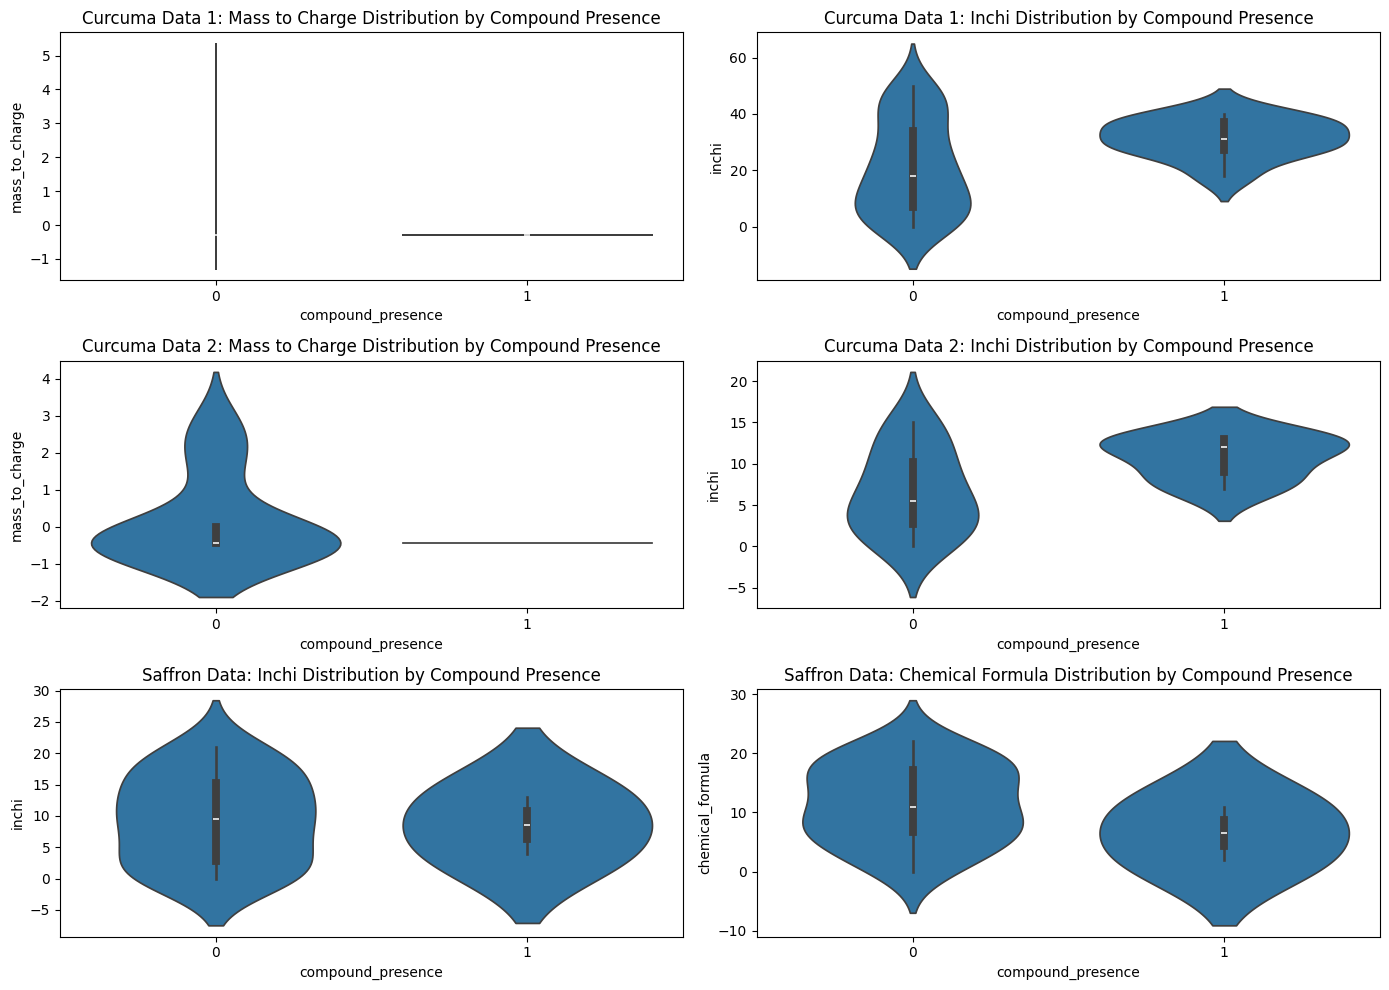

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.feature_selection import SelectKBest, f_classif

# Loading data
curcuma_data1 = pd.read_csv('C:/Users/Muqaddas Bano/Downloads/MTBLS2790_files/m_MTBLS2790_LC-MS_negative_reverse-phase_metabolite_profiling_v2_maf.tsv', sep='\t')
curcuma_data2 = pd.read_csv('C:/Users/Muqaddas Bano/Downloads/MTBLS2790_files/m_MTBLS2790_LC-MS_positive_reverse-phase_metabolite_profiling-1_v2_maf.tsv', sep='\t')
saffron_data = pd.read_csv('C:/Users/Muqaddas Bano/Downloads/MTBLS331_files/m_MTBLS331_uofc_hcc_serum_NMR_spectroscopy_v2_maf.tsv', sep='\t')

# Ensure data is cleaned
curcuma_data1.fillna(-1, inplace=True)
curcuma_data2.fillna(-1, inplace=True)
saffron_data.fillna(-1, inplace=True)

# Create binary indicator for the presence of curcumin and crocin
curcuma_compound = 'curcumin'
saffron_compound = 'crocin'

curcuma_data1['compound_presence'] = curcuma_data1['metabolite_identification'].apply(lambda x: 1 if curcuma_compound in str(x).lower() else 0)
curcuma_data2['compound_presence'] = curcuma_data2['metabolite_identification'].apply(lambda x: 1 if curcuma_compound in str(x).lower() else 0)
saffron_data['compound_presence'] = saffron_data['metabolite_identification'].apply(lambda x: 1 if saffron_compound in str(x).lower() else 0)

# Select relevant features and target variable
features = ['chemical_formula', 'inchi', 'mass_to_charge', 'retention_time', 'fragmentation', 'smallmolecule_abundance_sub', 'smallmolecule_abundance_stdev_sub', 'smallmolecule_abundance_std_error_sub', 'smiles', 'taxid', 'species', 'search_engine_score', 'database_identifier']
target_variable = 'compound_presence'

# Function to ensure all entries in a column are strings
def ensure_str(df, columns):
    for column in columns:
        if column in df.columns:
            df[column] = df[column].astype(str)
    return df

# Convert relevant columns to strings
curcuma_data1 = ensure_str(curcuma_data1, ['chemical_formula', 'inchi', 'smiles', 'taxid', 'species', 'database_identifier'])
curcuma_data2 = ensure_str(curcuma_data2, ['chemical_formula', 'inchi', 'smiles', 'taxid', 'species', 'database_identifier'])
saffron_data = ensure_str(saffron_data, ['chemical_formula', 'inchi', 'smiles', 'taxid', 'species', 'database_identifier'])

# Encode categorical features
def encode_categorical_features(df, features):
    le = LabelEncoder()
    for feature in features:
        if feature in df.columns and df[feature].dtype == 'object':
            df[feature] = le.fit_transform(df[feature].astype(str))
    return df

curcuma_data1_encoded = encode_categorical_features(curcuma_data1, features)
curcuma_data2_encoded = encode_categorical_features(curcuma_data2, features)
saffron_data_encoded = encode_categorical_features(saffron_data, features)

# Normalizing the numerical features
def normalize_features(df, numerical_features):
    scaler = StandardScaler()
    for feature in numerical_features:
        if feature in df.columns:
            df[feature] = scaler.fit_transform(df[[feature]])
    return df

numerical_features = ['mass_to_charge', 'retention_time']
curcuma_data1_encoded = normalize_features(curcuma_data1_encoded, numerical_features)
curcuma_data2_encoded = normalize_features(curcuma_data2_encoded, numerical_features)
saffron_data_encoded = normalize_features(saffron_data_encoded, numerical_features)

# Remove constant features
def remove_constant_features(df):
    return df.loc[:, (df != df.iloc[0]).any()]

curcuma_data1_encoded = remove_constant_features(curcuma_data1_encoded)
curcuma_data2_encoded = remove_constant_features(curcuma_data2_encoded)
saffron_data_encoded = remove_constant_features(saffron_data_encoded)

# Feature selection
def select_features(df, features, target_variable, k=5):
    present_features = [feature for feature in features if feature in df.columns]
    X = df[present_features]
    y = df[target_variable]
    selector = SelectKBest(score_func=f_classif, k=min(k, len(present_features)))
    X_new = selector.fit_transform(X, y)
    selected_features = X.columns[selector.get_support()]
    return df[selected_features]

curcuma_data1_selected = select_features(curcuma_data1_encoded, features, target_variable)
curcuma_data2_selected = select_features(curcuma_data2_encoded, features, target_variable)
saffron_data_selected = select_features(saffron_data_encoded, features, target_variable)

# Plot violin plots for the numerical features
plt.figure(figsize=(14, 10))

# Curcuma Data 1
plt.subplot(3, 2, 1)
sns.violinplot(x='compound_presence', y='mass_to_charge', data=curcuma_data1)
plt.title('Curcuma Data 1: Mass to Charge Distribution by Compound Presence')

plt.subplot(3, 2, 2)
sns.violinplot(x='compound_presence', y='inchi', data=curcuma_data1)
plt.title('Curcuma Data 1: Inchi Distribution by Compound Presence')

# Curcuma Data 2
plt.subplot(3, 2, 3)
sns.violinplot(x='compound_presence', y='mass_to_charge', data=curcuma_data2)
plt.title('Curcuma Data 2: Mass to Charge Distribution by Compound Presence')

plt.subplot(3, 2, 4)
sns.violinplot(x='compound_presence', y='inchi', data=curcuma_data2)
plt.title('Curcuma Data 2: Inchi Distribution by Compound Presence')

# Saffron Data
plt.subplot(3, 2, 5)
sns.violinplot(x='compound_presence', y='inchi', data=saffron_data)
plt.title('Saffron Data: Inchi Distribution by Compound Presence')

plt.subplot(3, 2, 6)
sns.violinplot(x='compound_presence', y='chemical_formula', data=saffron_data)
plt.title('Saffron Data: Chemical Formula Distribution by Compound Presence')

plt.tight_layout()
plt.show()


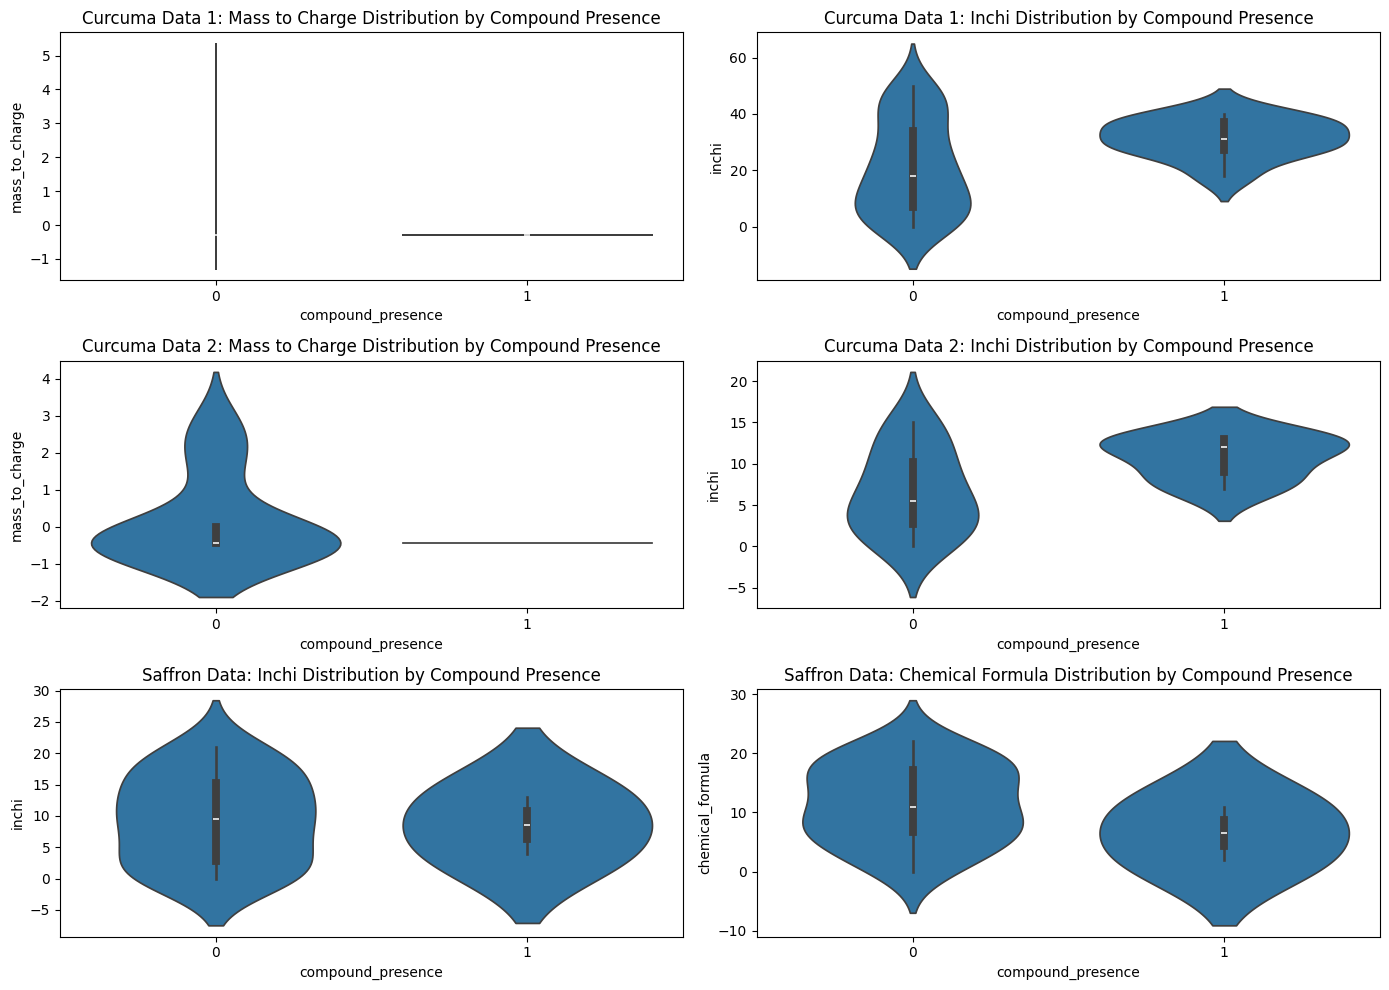

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.feature_selection import SelectKBest, f_classif

# Loading data
curcuma_data1 = pd.read_csv('C:/Users/Muqaddas Bano/Downloads/MTBLS2790_files/m_MTBLS2790_LC-MS_negative_reverse-phase_metabolite_profiling_v2_maf.tsv', sep='\t')
curcuma_data2 = pd.read_csv('C:/Users/Muqaddas Bano/Downloads/MTBLS2790_files/m_MTBLS2790_LC-MS_positive_reverse-phase_metabolite_profiling-1_v2_maf.tsv', sep='\t')
saffron_data = pd.read_csv('C:/Users/Muqaddas Bano/Downloads/MTBLS331_files/m_MTBLS331_uofc_hcc_serum_NMR_spectroscopy_v2_maf.tsv', sep='\t')

# Ensure data is cleaned
curcuma_data1.fillna(-1, inplace=True)
curcuma_data2.fillna(-1, inplace=True)
saffron_data.fillna(-1, inplace=True)

# Create binary indicator for the presence of curcumin and crocin
curcuma_compound = 'curcumin'
saffron_compound = 'crocin'

curcuma_data1['compound_presence'] = curcuma_data1['metabolite_identification'].apply(lambda x: 1 if curcuma_compound in str(x).lower() else 0)
curcuma_data2['compound_presence'] = curcuma_data2['metabolite_identification'].apply(lambda x: 1 if curcuma_compound in str(x).lower() else 0)
saffron_data['compound_presence'] = saffron_data['metabolite_identification'].apply(lambda x: 1 if saffron_compound in str(x).lower() else 0)

# Select relevant features and target variable
features = ['chemical_formula', 'inchi', 'mass_to_charge', 'retention_time', 'fragmentation', 'smallmolecule_abundance_sub', 'smallmolecule_abundance_stdev_sub', 'smallmolecule_abundance_std_error_sub', 'smiles', 'taxid', 'species', 'search_engine_score', 'database_identifier']
target_variable = 'compound_presence'

# Function to ensure all entries in a column are strings
def ensure_str(df, columns):
    for column in columns:
        if column in df.columns:
            df[column] = df[column].astype(str)
    return df

# Convert relevant columns to strings
curcuma_data1 = ensure_str(curcuma_data1, ['chemical_formula', 'inchi', 'smiles', 'taxid', 'species', 'database_identifier'])
curcuma_data2 = ensure_str(curcuma_data2, ['chemical_formula', 'inchi', 'smiles', 'taxid', 'species', 'database_identifier'])
saffron_data = ensure_str(saffron_data, ['chemical_formula', 'inchi', 'smiles', 'taxid', 'species', 'database_identifier'])

# Encode categorical features
def encode_categorical_features(df, features):
    le = LabelEncoder()
    for feature in features:
        if feature in df.columns and df[feature].dtype == 'object':
            df[feature] = le.fit_transform(df[feature].astype(str))
    return df

curcuma_data1_encoded = encode_categorical_features(curcuma_data1, features)
curcuma_data2_encoded = encode_categorical_features(curcuma_data2, features)
saffron_data_encoded = encode_categorical_features(saffron_data, features)

# Normalizing the numerical features
def normalize_features(df, numerical_features):
    scaler = StandardScaler()
    for feature in numerical_features:
        if feature in df.columns:
            df[feature] = scaler.fit_transform(df[[feature]])
    return df

numerical_features = ['mass_to_charge', 'retention_time']
curcuma_data1_encoded = normalize_features(curcuma_data1_encoded, numerical_features)
curcuma_data2_encoded = normalize_features(curcuma_data2_encoded, numerical_features)
saffron_data_encoded = normalize_features(saffron_data_encoded, numerical_features)

# Remove constant features
def remove_constant_features(df):
    return df.loc[:, (df != df.iloc[0]).any()]

curcuma_data1_encoded = remove_constant_features(curcuma_data1_encoded)
curcuma_data2_encoded = remove_constant_features(curcuma_data2_encoded)
saffron_data_encoded = remove_constant_features(saffron_data_encoded)

# Feature selection
def select_features(df, features, target_variable, k=5):
    present_features = [feature for feature in features if feature in df.columns]
    X = df[present_features]
    y = df[target_variable]
    selector = SelectKBest(score_func=f_classif, k=min(k, len(present_features)))
    X_new = selector.fit_transform(X, y)
    selected_features = X.columns[selector.get_support()]
    return df[selected_features]

curcuma_data1_selected = select_features(curcuma_data1_encoded, features, target_variable)
curcuma_data2_selected = select_features(curcuma_data2_encoded, features, target_variable)
saffron_data_selected = select_features(saffron_data_encoded, features, target_variable)

# Plot violin plots for the numerical features
plt.figure(figsize=(14, 10))

# Curcuma Data 1
plt.subplot(3, 2, 1)
if 'mass_to_charge' in curcuma_data1.columns:
    sns.violinplot(x='compound_presence', y='mass_to_charge', data=curcuma_data1)
    plt.title('Curcuma Data 1: Mass to Charge Distribution by Compound Presence')
else:
    plt.text(0.5, 0.5, 'mass_to_charge not available', ha='center', va='center')
    plt.title('Curcuma Data 1: Mass to Charge Distribution by Compound Presence')

plt.subplot(3, 2, 2)
sns.violinplot(x='compound_presence', y='inchi', data=curcuma_data1)
plt.title('Curcuma Data 1: Inchi Distribution by Compound Presence')

# Curcuma Data 2
plt.subplot(3, 2, 3)
sns.violinplot(x='compound_presence', y='mass_to_charge', data=curcuma_data2)
plt.title('Curcuma Data 2: Mass to Charge Distribution by Compound Presence')

plt.subplot(3, 2, 4)
sns.violinplot(x='compound_presence', y='inchi', data=curcuma_data2)
plt.title('Curcuma Data 2: Inchi Distribution by Compound Presence')

# Saffron Data
plt.subplot(3, 2, 5)
sns.violinplot(x='compound_presence', y='inchi', data=saffron_data)
plt.title('Saffron Data: Inchi Distribution by Compound Presence')

plt.subplot(3, 2, 6)
sns.violinplot(x='compound_presence', y='chemical_formula', data=saffron_data)
plt.title('Saffron Data: Chemical Formula Distribution by Compound Presence')

plt.tight_layout()
plt.show()


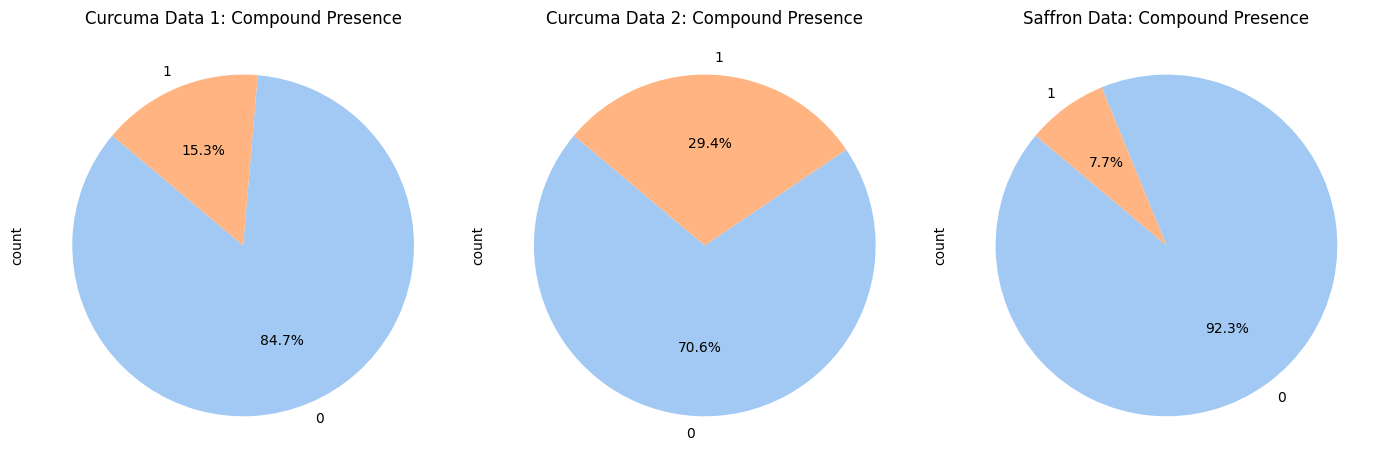

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.feature_selection import SelectKBest, f_classif

# Loading data
curcuma_data1 = pd.read_csv('C:/Users/Muqaddas Bano/Downloads/MTBLS2790_files/m_MTBLS2790_LC-MS_negative_reverse-phase_metabolite_profiling_v2_maf.tsv', sep='\t')
curcuma_data2 = pd.read_csv('C:/Users/Muqaddas Bano/Downloads/MTBLS2790_files/m_MTBLS2790_LC-MS_positive_reverse-phase_metabolite_profiling-1_v2_maf.tsv', sep='\t')
saffron_data = pd.read_csv('C:/Users/Muqaddas Bano/Downloads/MTBLS331_files/m_MTBLS331_uofc_hcc_serum_NMR_spectroscopy_v2_maf.tsv', sep='\t')

# Ensure data is cleaned
curcuma_data1.fillna(-1, inplace=True)
curcuma_data2.fillna(-1, inplace=True)
saffron_data.fillna(-1, inplace=True)

# Create binary indicator for the presence of curcumin and crocin
curcuma_compound = 'curcumin'
saffron_compound = 'crocin'

curcuma_data1['compound_presence'] = curcuma_data1['metabolite_identification'].apply(lambda x: 1 if curcuma_compound in str(x).lower() else 0)
curcuma_data2['compound_presence'] = curcuma_data2['metabolite_identification'].apply(lambda x: 1 if curcuma_compound in str(x).lower() else 0)
saffron_data['compound_presence'] = saffron_data['metabolite_identification'].apply(lambda x: 1 if saffron_compound in str(x).lower() else 0)

# Select relevant features and target variable
features = ['chemical_formula', 'inchi', 'mass_to_charge', 'retention_time', 'fragmentation', 'smallmolecule_abundance_sub', 'smallmolecule_abundance_stdev_sub', 'smallmolecule_abundance_std_error_sub', 'smiles', 'taxid', 'species', 'search_engine_score', 'database_identifier']
target_variable = 'compound_presence'

# Function to ensure all entries in a column are strings
def ensure_str(df, columns):
    for column in columns:
        if column in df.columns:
            df[column] = df[column].astype(str)
    return df

# Convert relevant columns to strings
curcuma_data1 = ensure_str(curcuma_data1, ['chemical_formula', 'inchi', 'smiles', 'taxid', 'species', 'database_identifier'])
curcuma_data2 = ensure_str(curcuma_data2, ['chemical_formula', 'inchi', 'smiles', 'taxid', 'species', 'database_identifier'])
saffron_data = ensure_str(saffron_data, ['chemical_formula', 'inchi', 'smiles', 'taxid', 'species', 'database_identifier'])

# Encode categorical features
def encode_categorical_features(df, features):
    le = LabelEncoder()
    for feature in features:
        if feature in df.columns and df[feature].dtype == 'object':
            df[feature] = le.fit_transform(df[feature].astype(str))
    return df

curcuma_data1_encoded = encode_categorical_features(curcuma_data1, features)
curcuma_data2_encoded = encode_categorical_features(curcuma_data2, features)
saffron_data_encoded = encode_categorical_features(saffron_data, features)

# Normalizing the numerical features
def normalize_features(df, numerical_features):
    scaler = StandardScaler()
    for feature in numerical_features:
        if feature in df.columns:
            df[feature] = scaler.fit_transform(df[[feature]])
    return df

numerical_features = ['mass_to_charge', 'retention_time']
curcuma_data1_encoded = normalize_features(curcuma_data1_encoded, numerical_features)
curcuma_data2_encoded = normalize_features(curcuma_data2_encoded, numerical_features)
saffron_data_encoded = normalize_features(saffron_data_encoded, numerical_features)

# Remove constant features
def remove_constant_features(df):
    return df.loc[:, (df != df.iloc[0]).any()]

curcuma_data1_encoded = remove_constant_features(curcuma_data1_encoded)
curcuma_data2_encoded = remove_constant_features(curcuma_data2_encoded)
saffron_data_encoded = remove_constant_features(saffron_data_encoded)

# Feature selection
def select_features(df, features, target_variable, k=5):
    present_features = [feature for feature in features if feature in df.columns]
    X = df[present_features]
    y = df[target_variable]
    selector = SelectKBest(score_func=f_classif, k=min(k, len(present_features)))
    X_new = selector.fit_transform(X, y)
    selected_features = X.columns[selector.get_support()]
    return df[selected_features]

curcuma_data1_selected = select_features(curcuma_data1_encoded, features, target_variable)
curcuma_data2_selected = select_features(curcuma_data2_encoded, features, target_variable)
saffron_data_selected = select_features(saffron_data_encoded, features, target_variable)

# Plot pie charts for compound presence
plt.figure(figsize=(14, 5))

plt.subplot(1, 3, 1)
curcuma_data1['compound_presence'].value_counts().plot.pie(autopct='%1.1f%%', colors=sns.color_palette('pastel'), startangle=140)
plt.title('Curcuma Data 1: Compound Presence')

plt.subplot(1, 3, 2)
curcuma_data2['compound_presence'].value_counts().plot.pie(autopct='%1.1f%%', colors=sns.color_palette('pastel'), startangle=140)
plt.title('Curcuma Data 2: Compound Presence')

plt.subplot(1, 3, 3)
saffron_data['compound_presence'].value_counts().plot.pie(autopct='%1.1f%%', colors=sns.color_palette('pastel'), startangle=140)
plt.title('Saffron Data: Compound Presence')

plt.tight_layout()
plt.show()


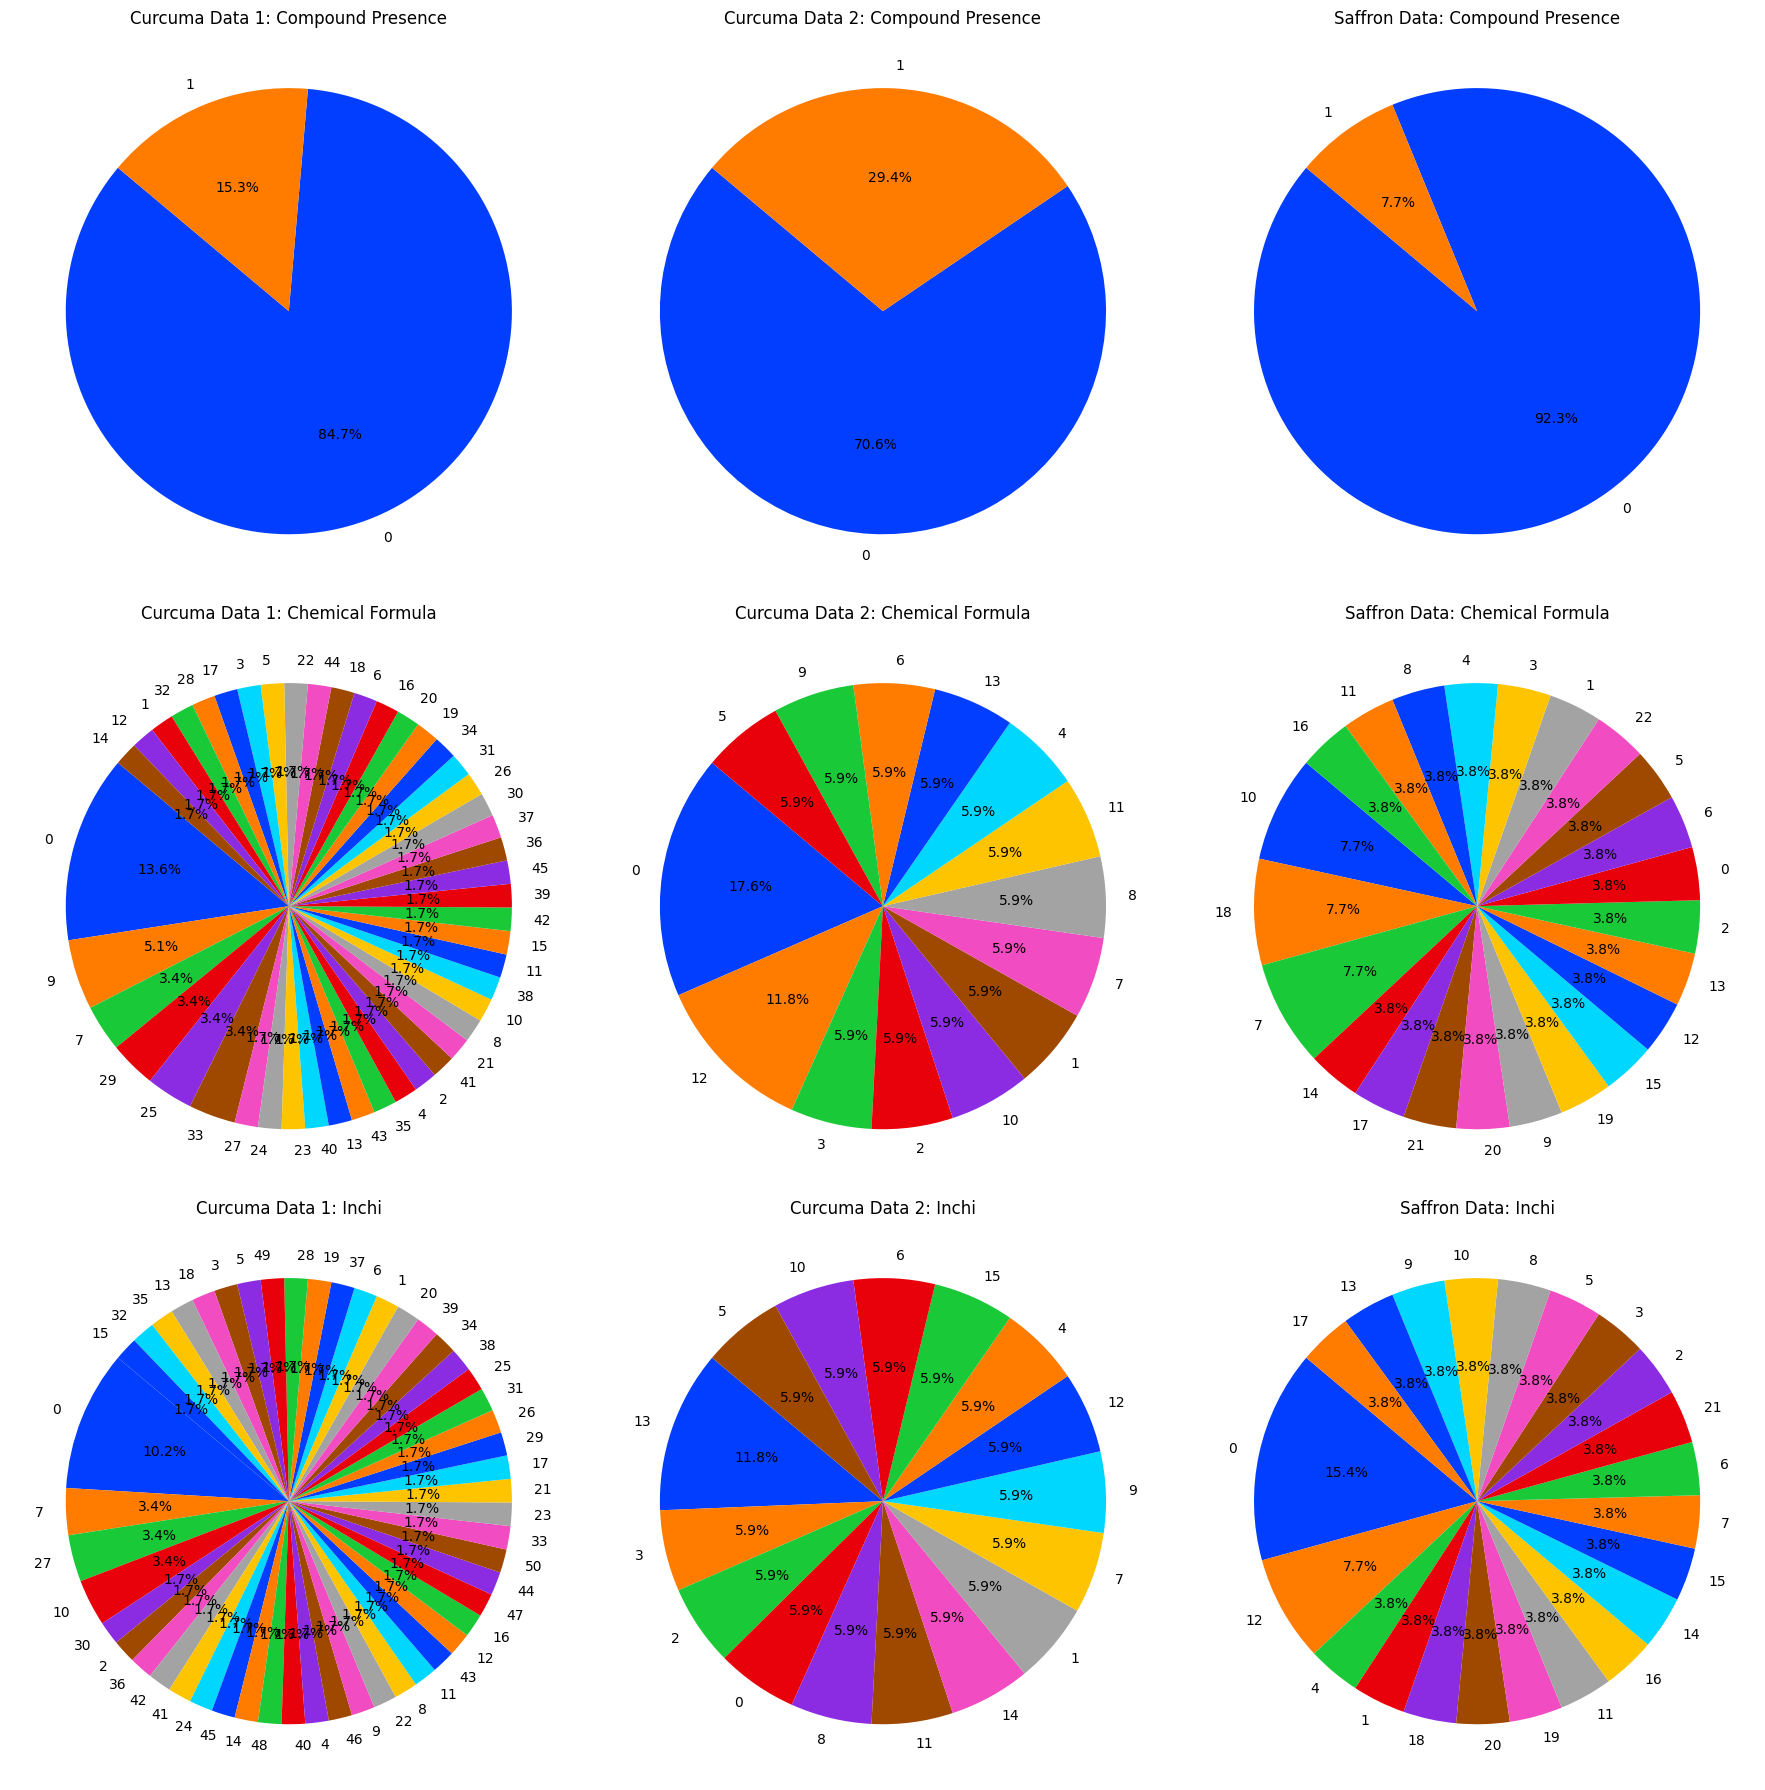

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.feature_selection import SelectKBest, f_classif

# Loading data
curcuma_data1 = pd.read_csv('C:/Users/Muqaddas Bano/Downloads/MTBLS2790_files/m_MTBLS2790_LC-MS_negative_reverse-phase_metabolite_profiling_v2_maf.tsv', sep='\t')
curcuma_data2 = pd.read_csv('C:/Users/Muqaddas Bano/Downloads/MTBLS2790_files/m_MTBLS2790_LC-MS_positive_reverse-phase_metabolite_profiling-1_v2_maf.tsv', sep='\t')
saffron_data = pd.read_csv('C:/Users/Muqaddas Bano/Downloads/MTBLS331_files/m_MTBLS331_uofc_hcc_serum_NMR_spectroscopy_v2_maf.tsv', sep='\t')

# Ensure data is cleaned
curcuma_data1.fillna(-1, inplace=True)
curcuma_data2.fillna(-1, inplace=True)
saffron_data.fillna(-1, inplace=True)

# Create binary indicator for the presence of curcumin and crocin
curcuma_compound = 'curcumin'
saffron_compound = 'crocin'

curcuma_data1['compound_presence'] = curcuma_data1['metabolite_identification'].apply(lambda x: 1 if curcuma_compound in str(x).lower() else 0)
curcuma_data2['compound_presence'] = curcuma_data2['metabolite_identification'].apply(lambda x: 1 if curcuma_compound in str(x).lower() else 0)
saffron_data['compound_presence'] = saffron_data['metabolite_identification'].apply(lambda x: 1 if saffron_compound in str(x).lower() else 0)

# Select relevant features and target variable
features = ['chemical_formula', 'inchi', 'mass_to_charge', 'retention_time', 'fragmentation', 'smallmolecule_abundance_sub', 'smallmolecule_abundance_stdev_sub', 'smallmolecule_abundance_std_error_sub', 'smiles', 'taxid', 'species', 'search_engine_score', 'database_identifier']
target_variable = 'compound_presence'

# Function to ensure all entries in a column are strings
def ensure_str(df, columns):
    for column in columns:
        if column in df.columns:
            df[column] = df[column].astype(str)
    return df

# Convert relevant columns to strings
curcuma_data1 = ensure_str(curcuma_data1, ['chemical_formula', 'inchi', 'smiles', 'taxid', 'species', 'database_identifier'])
curcuma_data2 = ensure_str(curcuma_data2, ['chemical_formula', 'inchi', 'smiles', 'taxid', 'species', 'database_identifier'])
saffron_data = ensure_str(saffron_data, ['chemical_formula', 'inchi', 'smiles', 'taxid', 'species', 'database_identifier'])

# Encode categorical features
def encode_categorical_features(df, features):
    le = LabelEncoder()
    for feature in features:
        if feature in df.columns and df[feature].dtype == 'object':
            df[feature] = le.fit_transform(df[feature].astype(str))
    return df

curcuma_data1_encoded = encode_categorical_features(curcuma_data1, features)
curcuma_data2_encoded = encode_categorical_features(curcuma_data2, features)
saffron_data_encoded = encode_categorical_features(saffron_data, features)

# Normalizing the numerical features
def normalize_features(df, numerical_features):
    scaler = StandardScaler()
    for feature in numerical_features:
        if feature in df.columns:
            df[feature] = scaler.fit_transform(df[[feature]])
    return df

numerical_features = ['mass_to_charge', 'retention_time']
curcuma_data1_encoded = normalize_features(curcuma_data1_encoded, numerical_features)
curcuma_data2_encoded = normalize_features(curcuma_data2_encoded, numerical_features)
saffron_data_encoded = normalize_features(saffron_data_encoded, numerical_features)

# Remove constant features
def remove_constant_features(df):
    return df.loc[:, (df != df.iloc[0]).any()]

curcuma_data1_encoded = remove_constant_features(curcuma_data1_encoded)
curcuma_data2_encoded = remove_constant_features(curcuma_data2_encoded)
saffron_data_encoded = remove_constant_features(saffron_data_encoded)

# Feature selection
def select_features(df, features, target_variable, k=5):
    present_features = [feature for feature in features if feature in df.columns]
    X = df[present_features]
    y = df[target_variable]
    selector = SelectKBest(score_func=f_classif, k=min(k, len(present_features)))
    X_new = selector.fit_transform(X, y)
    selected_features = X.columns[selector.get_support()]
    return df[selected_features]

curcuma_data1_selected = select_features(curcuma_data1_encoded, features, target_variable)
curcuma_data2_selected = select_features(curcuma_data2_encoded, features, target_variable)
saffron_data_selected = select_features(saffron_data_encoded, features, target_variable)

# Define a function to plot pie charts for categorical features
def plot_pie_chart(data, feature, title, ax):
    counts = data[feature].value_counts()
    labels = counts.index
    sizes = counts.values
    colors = sns.color_palette('bright')
    ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors)
    ax.set_title(title)

# Plot pie charts for compound presence and selected categorical features
fig, axes = plt.subplots(3, 3, figsize=(18, 18))

# Compound presence
plot_pie_chart(curcuma_data1, 'compound_presence', 'Curcuma Data 1: Compound Presence', axes[0, 0])
plot_pie_chart(curcuma_data2, 'compound_presence', 'Curcuma Data 2: Compound Presence', axes[0, 1])
plot_pie_chart(saffron_data, 'compound_presence', 'Saffron Data: Compound Presence', axes[0, 2])

# Categorical features
plot_pie_chart(curcuma_data1, 'chemical_formula', 'Curcuma Data 1: Chemical Formula', axes[1, 0])
plot_pie_chart(curcuma_data2, 'chemical_formula', 'Curcuma Data 2: Chemical Formula', axes[1, 1])
plot_pie_chart(saffron_data, 'chemical_formula', 'Saffron Data: Chemical Formula', axes[1, 2])

plot_pie_chart(curcuma_data1, 'inchi', 'Curcuma Data 1: Inchi', axes[2, 0])
plot_pie_chart(curcuma_data2, 'inchi', 'Curcuma Data 2: Inchi', axes[2, 1])
plot_pie_chart(saffron_data, 'inchi', 'Saffron Data: Inchi', axes[2, 2])

plt.tight_layout()
plt.show()


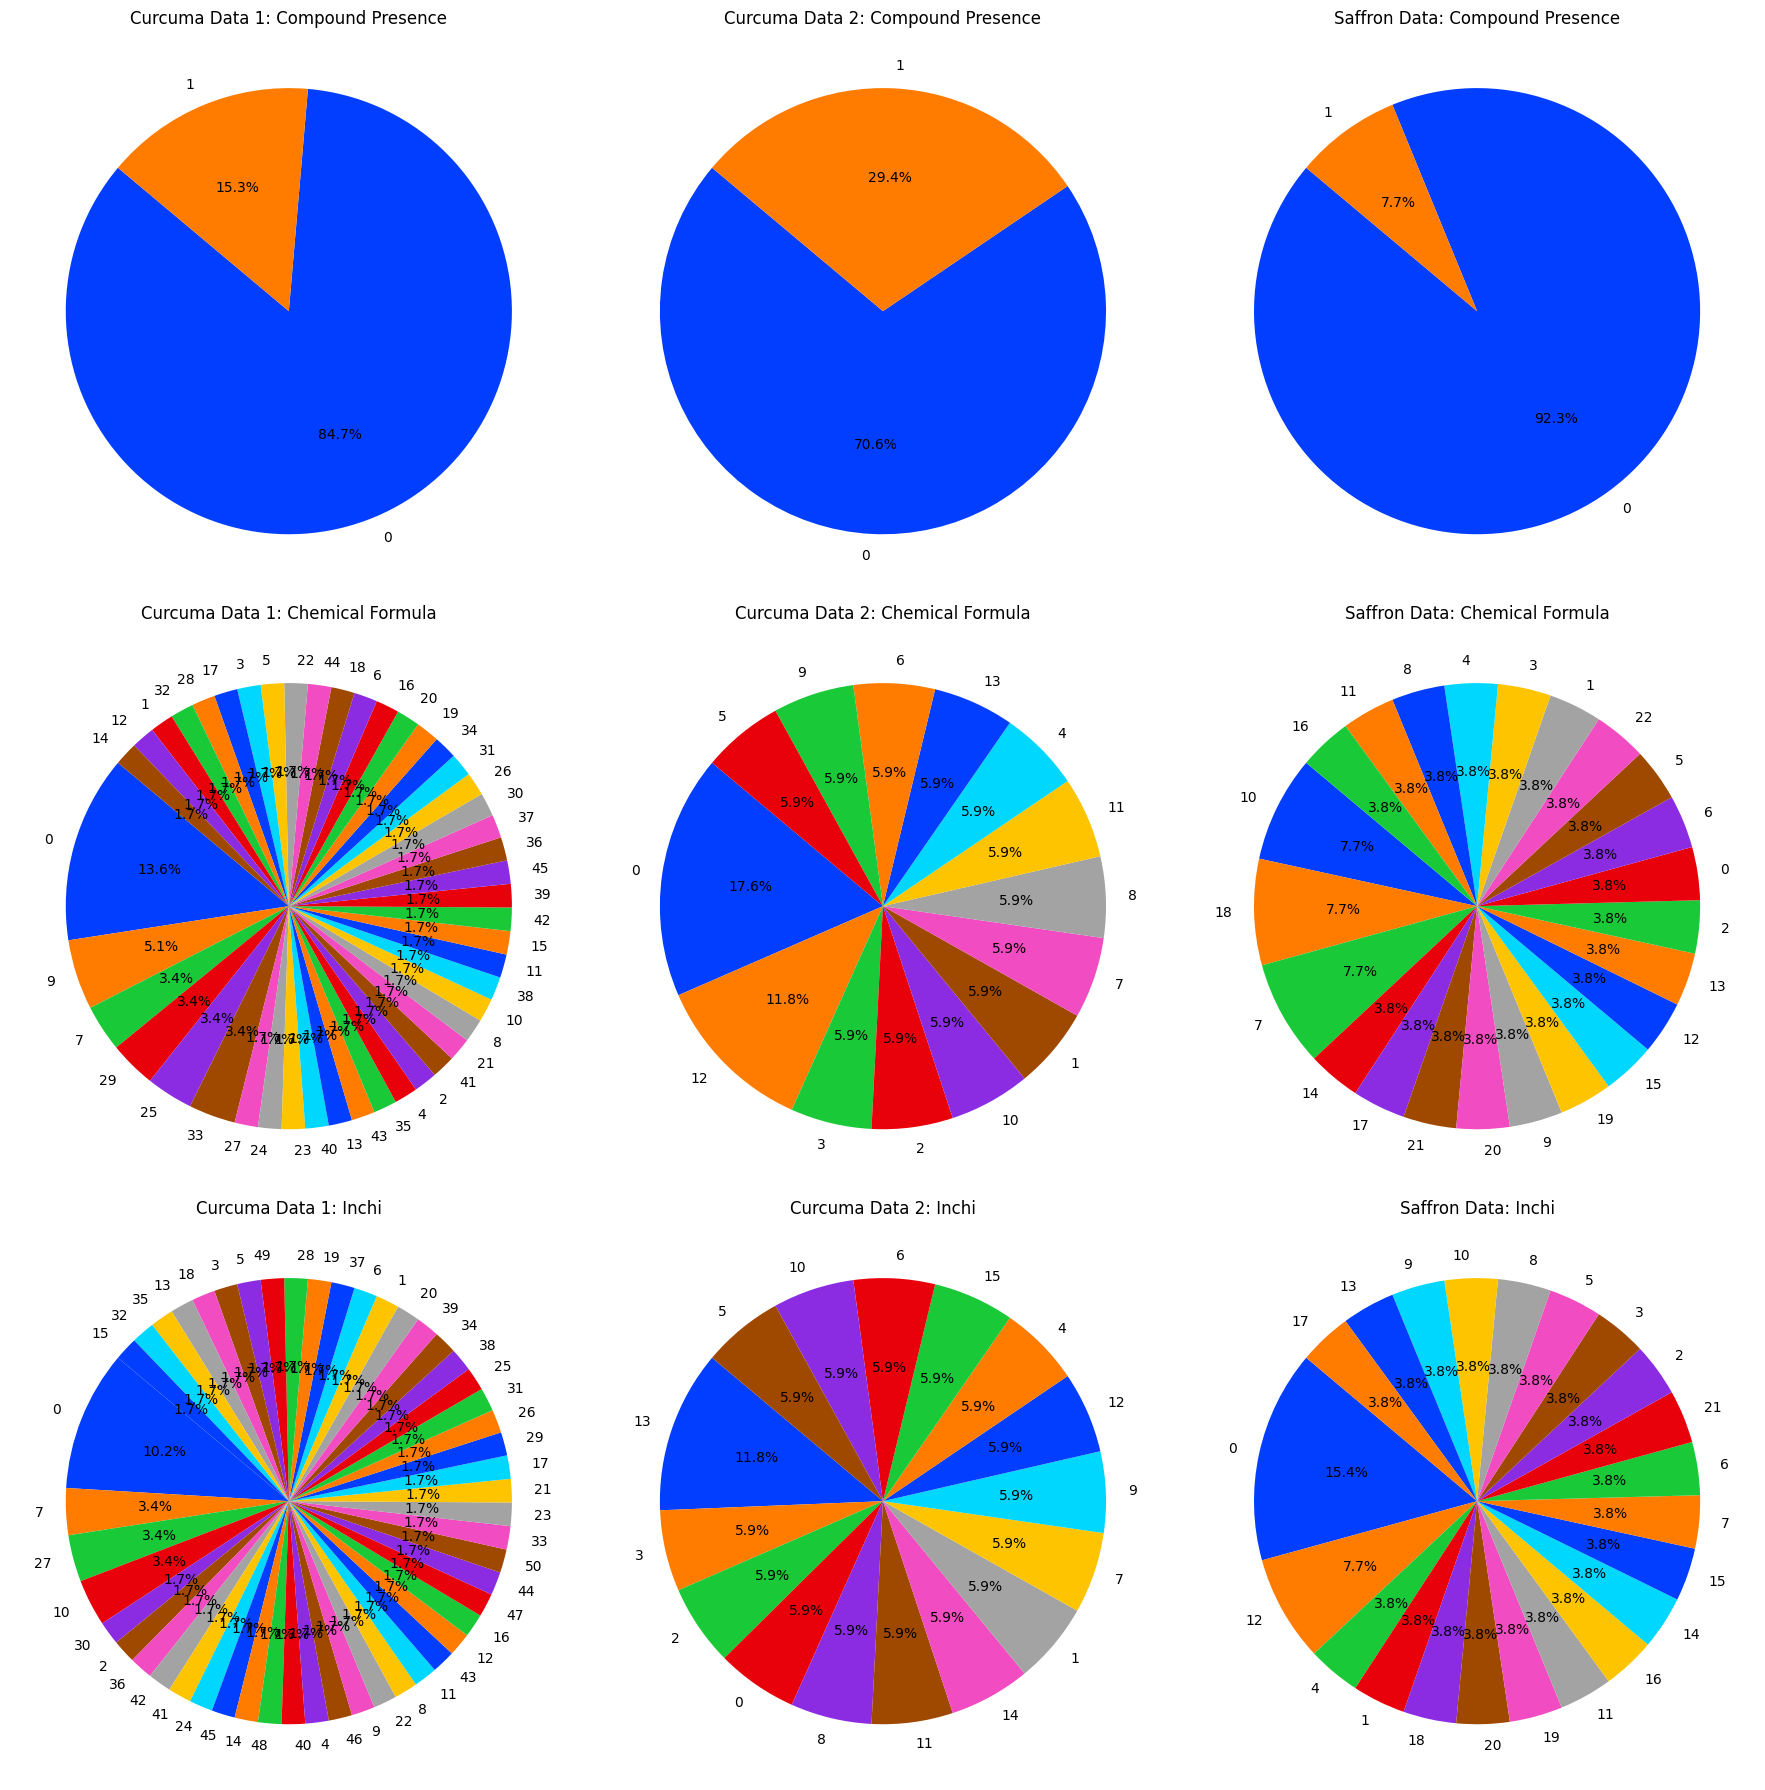

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.feature_selection import SelectKBest, f_classif

# Loading data
curcuma_data1 = pd.read_csv('C:/Users/Muqaddas Bano/Downloads/MTBLS2790_files/m_MTBLS2790_LC-MS_negative_reverse-phase_metabolite_profiling_v2_maf.tsv', sep='\t')
curcuma_data2 = pd.read_csv('C:/Users/Muqaddas Bano/Downloads/MTBLS2790_files/m_MTBLS2790_LC-MS_positive_reverse-phase_metabolite_profiling-1_v2_maf.tsv', sep='\t')
saffron_data = pd.read_csv('C:/Users/Muqaddas Bano/Downloads/MTBLS331_files/m_MTBLS331_uofc_hcc_serum_NMR_spectroscopy_v2_maf.tsv', sep='\t')

# Ensure data is cleaned
curcuma_data1.fillna(-1, inplace=True)
curcuma_data2.fillna(-1, inplace=True)
saffron_data.fillna(-1, inplace=True)

# Create binary indicator for the presence of curcumin and crocin
curcuma_compound = 'curcumin'
saffron_compound = 'crocin'

curcuma_data1['compound_presence'] = curcuma_data1['metabolite_identification'].apply(lambda x: 1 if curcuma_compound in str(x).lower() else 0)
curcuma_data2['compound_presence'] = curcuma_data2['metabolite_identification'].apply(lambda x: 1 if curcuma_compound in str(x).lower() else 0)
saffron_data['compound_presence'] = saffron_data['metabolite_identification'].apply(lambda x: 1 if saffron_compound in str(x).lower() else 0)

# Select relevant features and target variable
features = ['chemical_formula', 'inchi', 'mass_to_charge', 'retention_time', 'fragmentation', 'smallmolecule_abundance_sub', 'smallmolecule_abundance_stdev_sub', 'smallmolecule_abundance_std_error_sub', 'smiles', 'taxid', 'species', 'search_engine_score', 'database_identifier']
target_variable = 'compound_presence'

# Function to ensure all entries in a column are strings
def ensure_str(df, columns):
    for column in columns:
        if column in df.columns:
            df[column] = df[column].astype(str)
    return df

# Convert relevant columns to strings
curcuma_data1 = ensure_str(curcuma_data1, ['chemical_formula', 'inchi', 'smiles', 'taxid', 'species', 'database_identifier'])
curcuma_data2 = ensure_str(curcuma_data2, ['chemical_formula', 'inchi', 'smiles', 'taxid', 'species', 'database_identifier'])
saffron_data = ensure_str(saffron_data, ['chemical_formula', 'inchi', 'smiles', 'taxid', 'species', 'database_identifier'])

# Encode categorical features
def encode_categorical_features(df, features):
    le = LabelEncoder()
    for feature in features:
        if feature in df.columns and df[feature].dtype == 'object':
            df[feature] = le.fit_transform(df[feature].astype(str))
    return df

curcuma_data1_encoded = encode_categorical_features(curcuma_data1, features)
curcuma_data2_encoded = encode_categorical_features(curcuma_data2, features)
saffron_data_encoded = encode_categorical_features(saffron_data, features)

# Normalizing the numerical features
def normalize_features(df, numerical_features):
    scaler = StandardScaler()
    for feature in numerical_features:
        if feature in df.columns:
            df[feature] = scaler.fit_transform(df[[feature]])
    return df

numerical_features = ['mass_to_charge', 'retention_time']
curcuma_data1_encoded = normalize_features(curcuma_data1_encoded, numerical_features)
curcuma_data2_encoded = normalize_features(curcuma_data2_encoded, numerical_features)
saffron_data_encoded = normalize_features(saffron_data_encoded, numerical_features)

# Remove constant features
def remove_constant_features(df):
    return df.loc[:, (df != df.iloc[0]).any()]

curcuma_data1_encoded = remove_constant_features(curcuma_data1_encoded)
curcuma_data2_encoded = remove_constant_features(curcuma_data2_encoded)
saffron_data_encoded = remove_constant_features(saffron_data_encoded)

# Feature selection
def select_features(df, features, target_variable, k=5):
    present_features = [feature for feature in features if feature in df.columns]
    X = df[present_features]
    y = df[target_variable]
    selector = SelectKBest(score_func=f_classif, k=min(k, len(present_features)))
    X_new = selector.fit_transform(X, y)
    selected_features = X.columns[selector.get_support()]
    return df[selected_features]

curcuma_data1_selected = select_features(curcuma_data1_encoded, features, target_variable)
curcuma_data2_selected = select_features(curcuma_data2_encoded, features, target_variable)
saffron_data_selected = select_features(saffron_data_encoded, features, target_variable)

# Define a function to plot pie charts for categorical features
def plot_pie_chart(data, feature, title, ax):
    counts = data[feature].value_counts()
    labels = counts.index
    sizes = counts.values
    colors = sns.color_palette('bright')
    ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors)
    ax.set_title(title)

# Plot pie charts for compound presence and selected categorical features
fig, axes = plt.subplots(3, 3, figsize=(18, 18))

# Compound presence
plot_pie_chart(curcuma_data1, 'compound_presence', 'Curcuma Data 1: Compound Presence', axes[0, 0])
plot_pie_chart(curcuma_data2, 'compound_presence', 'Curcuma Data 2: Compound Presence', axes[0, 1])
plot_pie_chart(saffron_data, 'compound_presence', 'Saffron Data: Compound Presence', axes[0, 2])

# Categorical features
plot_pie_chart(curcuma_data1, 'chemical_formula', 'Curcuma Data 1: Chemical Formula', axes[1, 0])
plot_pie_chart(curcuma_data2, 'chemical_formula', 'Curcuma Data 2: Chemical Formula', axes[1, 1])
plot_pie_chart(saffron_data, 'chemical_formula', 'Saffron Data: Chemical Formula', axes[1, 2])

plot_pie_chart(curcuma_data1, 'inchi', 'Curcuma Data 1: Inchi', axes[2, 0])
plot_pie_chart(curcuma_data2, 'inchi', 'Curcuma Data 2: Inchi', axes[2, 1])
plot_pie_chart(saffron_data, 'inchi', 'Saffron Data: Inchi', axes[2, 2])

plt.tight_layout()
plt.show()


In [16]:
import pandas as pd
import numpy as np

# Load the data
curcuma_data1 = pd.read_csv('C:/Users/Muqaddas Bano/Downloads/MTBLS2790_files/m_MTBLS2790_LC-MS_negative_reverse-phase_metabolite_profiling_v2_maf.tsv', sep='\t')
curcuma_data2 = pd.read_csv('C:/Users/Muqaddas Bano/Downloads/MTBLS2790_files/m_MTBLS2790_LC-MS_positive_reverse-phase_metabolite_profiling-1_v2_maf.tsv', sep='\t')
saffron_data = pd.read_csv('C:/Users/Muqaddas Bano/Downloads/MTBLS331_files/m_MTBLS331_uofc_hcc_serum_NMR_spectroscopy_v2_maf.tsv', sep='\t')

# Ensure data is cleaned
curcuma_data1.fillna(-1, inplace=True)
curcuma_data2.fillna(-1, inplace=True)
saffron_data.fillna(-1, inplace=True)

# Create binary indicator for the presence of curcumin and crocin
curcuma_compound = 'curcumin'
saffron_compound = 'crocin'

curcuma_data1['compound_presence'] = curcuma_data1['metabolite_identification'].apply(lambda x: 1 if curcuma_compound in str(x).lower() else 0)
curcuma_data2['compound_presence'] = curcuma_data2['metabolite_identification'].apply(lambda x: 1 if curcuma_compound in str(x).lower() else 0)
saffron_data['compound_presence'] = saffron_data['metabolite_identification'].apply(lambda x: 1 if saffron_compound in str(x).lower() else 0)

# Select relevant features
features = ['chemical_formula', 'inchi', 'mass_to_charge', 'retention_time', 'fragmentation', 'smallmolecule_abundance_sub', 'smallmolecule_abundance_stdev_sub', 'smallmolecule_abundance_std_error_sub', 'smiles', 'taxid', 'species', 'search_engine_score', 'database_identifier']
target_variable = 'compound_presence'

# Convert relevant columns to strings
def ensure_str(df, columns):
    for column in columns:
        if column in df.columns:
            df[column] = df[column].astype(str)
    return df

curcuma_data1 = ensure_str(curcuma_data1, ['chemical_formula', 'inchi', 'smiles', 'taxid', 'species', 'database_identifier'])
curcuma_data2 = ensure_str(curcuma_data2, ['chemical_formula', 'inchi', 'smiles', 'taxid', 'species', 'database_identifier'])
saffron_data = ensure_str(saffron_data, ['chemical_formula', 'inchi', 'smiles', 'taxid', 'species', 'database_identifier'])

# Encode categorical features
def encode_categorical_features(df, features):
    le = LabelEncoder()
    for feature in features:
        if feature in df.columns and df[feature].dtype == 'object':
            df[feature] = le.fit_transform(df[feature].astype(str))
    return df

curcuma_data1_encoded = encode_categorical_features(curcuma_data1, features)
curcuma_data2_encoded = encode_categorical_features(curcuma_data2, features)
saffron_data_encoded = encode_categorical_features(saffron_data, features)

# Normalizing the numerical features
def normalize_features(df, numerical_features):
    scaler = StandardScaler()
    for feature in numerical_features:
        if feature in df.columns:
            df[feature] = scaler.fit_transform(df[[feature]])
    return df

numerical_features = ['mass_to_charge', 'retention_time']
curcuma_data1_encoded = normalize_features(curcuma_data1_encoded, numerical_features)
curcuma_data2_encoded = normalize_features(curcuma_data2_encoded, numerical_features)
saffron_data_encoded = normalize_features(saffron_data_encoded, numerical_features)

# Remove constant features
def remove_constant_features(df):
    return df.loc[:, (df != df.iloc[0]).any()]

curcuma_data1_encoded = remove_constant_features(curcuma_data1_encoded)
curcuma_data2_encoded = remove_constant_features(curcuma_data2_encoded)
saffron_data_encoded = remove_constant_features(saffron_data_encoded)

# Feature selection
def select_features(df, features, target_variable, k=5):
    present_features = [feature for feature in features if feature in df.columns]
    X = df[present_features]
    y = df[target_variable]
    selector = SelectKBest(score_func=f_classif, k=min(k, len(present_features)))
    X_new = selector.fit_transform(X, y)
    selected_features = X.columns[selector.get_support()]
    return df[selected_features]

curcuma_data1_selected = select_features(curcuma_data1_encoded, features, target_variable)
curcuma_data2_selected = select_features(curcuma_data2_encoded, features, target_variable)
saffron_data_selected = select_features(saffron_data_encoded, features, target_variable)

# Generate statistical summaries
curcuma_data1_summary = curcuma_data1_selected.describe(include='all')
curcuma_data2_summary = curcuma_data2_selected.describe(include='all')
saffron_data_summary = saffron_data_selected.describe(include='all')

# Display summaries
print("Curcuma Data 1 Summary:")
print(curcuma_data1_summary)
print("\nCurcuma Data 2 Summary:")
print(curcuma_data2_summary)
print("\nSaffron Data Summary:")
print(saffron_data_summary)

# Save summaries to CSV files
curcuma_data1_summary.to_csv('curcuma_data1_summary.csv')
curcuma_data2_summary.to_csv('curcuma_data2_summary.csv')
saffron_data_summary.to_csv('saffron_data_summary.csv')


Curcuma Data 1 Summary:
       chemical_formula      inchi  mass_to_charge     smiles  \
count         59.000000  59.000000    5.900000e+01  59.000000   
mean          19.440678  22.355932    7.526936e-18  22.966102   
std           14.301279  15.710487    1.008584e+00  15.631496   
min            0.000000   0.000000   -2.918584e-01   0.000000   
25%            7.000000   8.500000   -2.918584e-01   9.500000   
50%           19.000000  22.000000   -2.918584e-01  22.000000   
75%           31.500000  35.500000   -2.918584e-01  36.500000   
max           45.000000  50.000000    4.356872e+00  50.000000   

       database_identifier  
count            59.000000  
mean             27.355932  
std              15.546108  
min               0.000000  
25%              14.500000  
50%              28.000000  
75%              41.000000  
max              49.000000  

Curcuma Data 2 Summary:
       chemical_formula      inchi  mass_to_charge  fragmentation  \
count         17.000000  17.000000 

Curcuma Data 1 Summary:
       chemical_formula      inchi  mass_to_charge     smiles  \
count         59.000000  59.000000    5.900000e+01  59.000000   
mean          19.440678  22.355932    7.526936e-18  22.966102   
std           14.301279  15.710487    1.008584e+00  15.631496   
min            0.000000   0.000000   -2.918584e-01   0.000000   
25%            7.000000   8.500000   -2.918584e-01   9.500000   
50%           19.000000  22.000000   -2.918584e-01  22.000000   
75%           31.500000  35.500000   -2.918584e-01  36.500000   
max           45.000000  50.000000    4.356872e+00  50.000000   

       database_identifier  
count            59.000000  
mean             27.355932  
std              15.546108  
min               0.000000  
25%              14.500000  
50%              28.000000  
75%              41.000000  
max              49.000000  

Curcuma Data 2 Summary:
       chemical_formula      inchi  mass_to_charge  fragmentation  \
count         17.000000  17.000000 

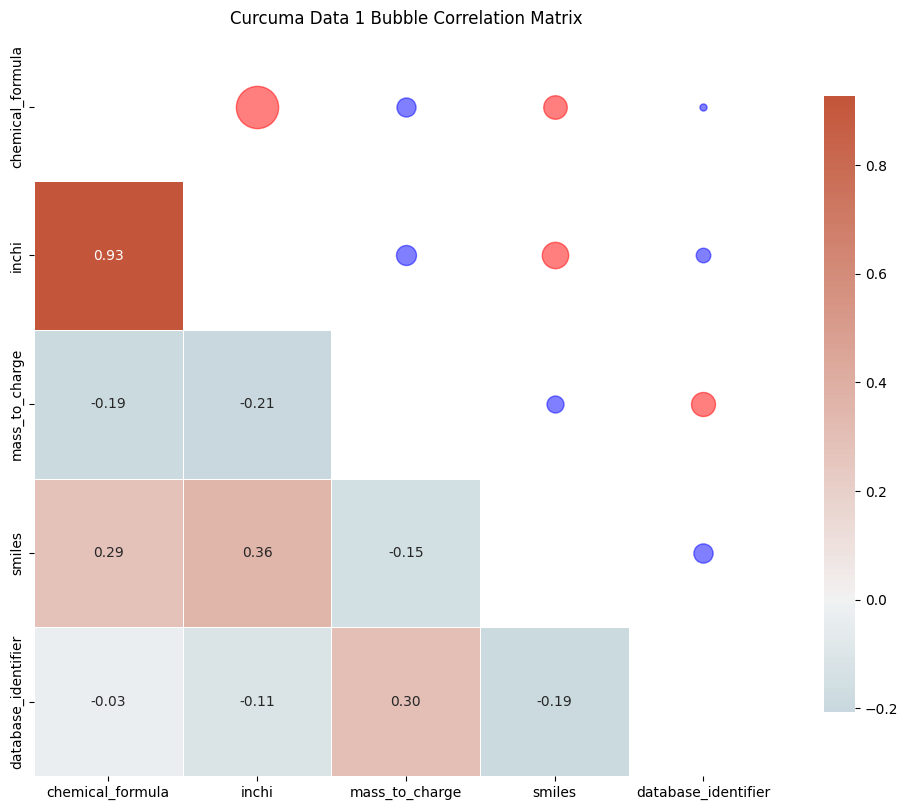

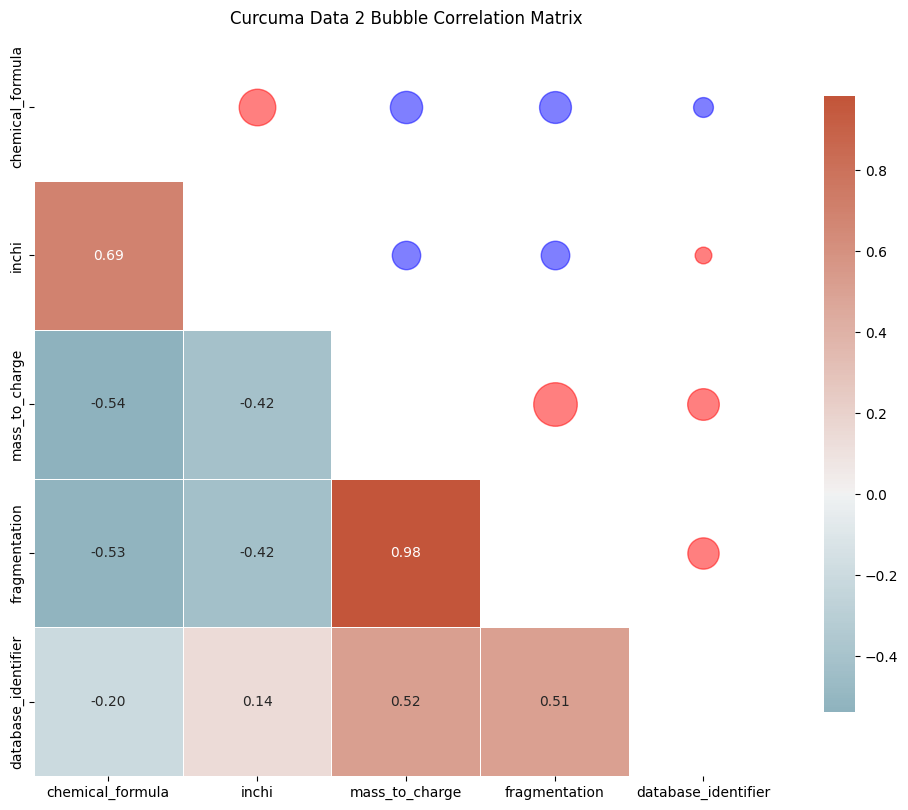

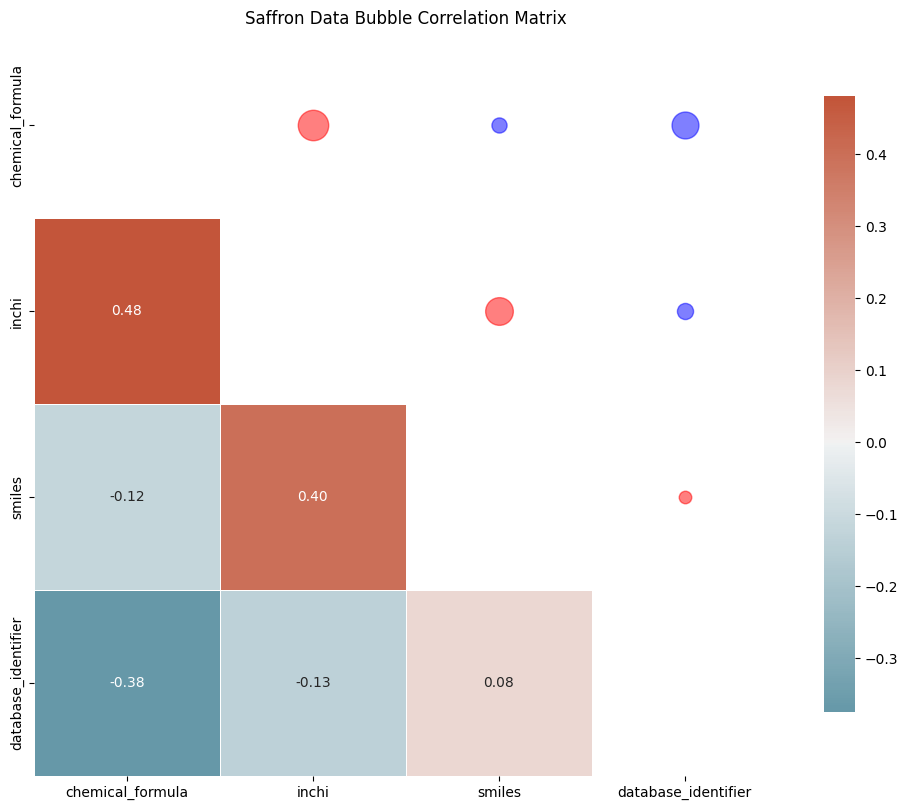

In [19]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data
curcuma_data1 = pd.read_csv('C:/Users/Muqaddas Bano/Downloads/MTBLS2790_files/m_MTBLS2790_LC-MS_negative_reverse-phase_metabolite_profiling_v2_maf.tsv', sep='\t')
curcuma_data2 = pd.read_csv('C:/Users/Muqaddas Bano/Downloads/MTBLS2790_files/m_MTBLS2790_LC-MS_positive_reverse-phase_metabolite_profiling-1_v2_maf.tsv', sep='\t')
saffron_data = pd.read_csv('C:/Users/Muqaddas Bano/Downloads/MTBLS331_files/m_MTBLS331_uofc_hcc_serum_NMR_spectroscopy_v2_maf.tsv', sep='\t')

# Ensure data is cleaned
curcuma_data1.fillna(-1, inplace=True)
curcuma_data2.fillna(-1, inplace=True)
saffron_data.fillna(-1, inplace=True)

# Create binary indicator for the presence of curcumin and crocin
curcuma_compound = 'curcumin'
saffron_compound = 'crocin'

curcuma_data1['compound_presence'] = curcuma_data1['metabolite_identification'].apply(lambda x: 1 if curcuma_compound in str(x).lower() else 0)
curcuma_data2['compound_presence'] = curcuma_data2['metabolite_identification'].apply(lambda x: 1 if curcuma_compound in str(x).lower() else 0)
saffron_data['compound_presence'] = saffron_data['metabolite_identification'].apply(lambda x: 1 if saffron_compound in str(x).lower() else 0)

# Select relevant features
features = ['chemical_formula', 'inchi', 'mass_to_charge', 'retention_time', 'fragmentation', 'smallmolecule_abundance_sub', 'smallmolecule_abundance_stdev_sub', 'smallmolecule_abundance_std_error_sub', 'smiles', 'taxid', 'species', 'search_engine_score', 'database_identifier']
target_variable = 'compound_presence'

# Convert relevant columns to strings
def ensure_str(df, columns):
    for column in columns:
        if column in df.columns:
            df[column] = df[column].astype(str)
    return df

curcuma_data1 = ensure_str(curcuma_data1, ['chemical_formula', 'inchi', 'smiles', 'taxid', 'species', 'database_identifier'])
curcuma_data2 = ensure_str(curcuma_data2, ['chemical_formula', 'inchi', 'smiles', 'taxid', 'species', 'database_identifier'])
saffron_data = ensure_str(saffron_data, ['chemical_formula', 'inchi', 'smiles', 'taxid', 'species', 'database_identifier'])

# Encode categorical features
def encode_categorical_features(df, features):
    le = LabelEncoder()
    for feature in features:
        if feature in df.columns and df[feature].dtype == 'object':
            df[feature] = le.fit_transform(df[feature].astype(str))
    return df

curcuma_data1_encoded = encode_categorical_features(curcuma_data1, features)
curcuma_data2_encoded = encode_categorical_features(curcuma_data2, features)
saffron_data_encoded = encode_categorical_features(saffron_data, features)

# Normalizing the numerical features
def normalize_features(df, numerical_features):
    scaler = StandardScaler()
    for feature in numerical_features:
        if feature in df.columns:
            df[feature] = scaler.fit_transform(df[[feature]])
    return df

numerical_features = ['mass_to_charge', 'retention_time']
curcuma_data1_encoded = normalize_features(curcuma_data1_encoded, numerical_features)
curcuma_data2_encoded = normalize_features(curcuma_data2_encoded, numerical_features)
saffron_data_encoded = normalize_features(saffron_data_encoded, numerical_features)

# Remove constant features
def remove_constant_features(df):
    return df.loc[:, (df != df.iloc[0]).any()]

curcuma_data1_encoded = remove_constant_features(curcuma_data1_encoded)
curcuma_data2_encoded = remove_constant_features(curcuma_data2_encoded)
saffron_data_encoded = remove_constant_features(saffron_data_encoded)

# Feature selection
def select_features(df, features, target_variable, k=5):
    present_features = [feature for feature in features if feature in df.columns]
    X = df[present_features]
    y = df[target_variable]
    selector = SelectKBest(score_func=f_classif, k=min(k, len(present_features)))
    X_new = selector.fit_transform(X, y)
    selected_features = X.columns[selector.get_support()]
    return df[selected_features]

curcuma_data1_selected = select_features(curcuma_data1_encoded, features, target_variable)
curcuma_data2_selected = select_features(curcuma_data2_encoded, features, target_variable)
saffron_data_selected = select_features(saffron_data_encoded, features, target_variable)

# Generate statistical summaries
curcuma_data1_summary = curcuma_data1_selected.describe(include='all')
curcuma_data2_summary = curcuma_data2_selected.describe(include='all')
saffron_data_summary = saffron_data_selected.describe(include='all')

# Display summaries
print("Curcuma Data 1 Summary:")
print(curcuma_data1_summary)
print("\nCurcuma Data 2 Summary:")
print(curcuma_data2_summary)
print("\nSaffron Data Summary:")
print(saffron_data_summary)

# Create a bubble plot correlation matrix
def bubble_correlation_matrix(data, title):
    corr = data.corr()
    mask = np.triu(np.ones_like(corr, dtype=bool))
    fig, ax = plt.subplots(figsize=(12, 10))
    cmap = sns.diverging_palette(220, 20, as_cmap=True)
    sns.heatmap(corr, mask=mask, cmap=cmap, center=0,
                annot=True, fmt='.2f', linewidths=.5, cbar_kws={"shrink": .8},
                square=True, ax=ax)
    
    # Create bubble plot
    for i in range(len(corr.columns)):
        for j in range(i+1, len(corr.columns)):
            size = abs(corr.iloc[i, j]) * 1000
            ax.scatter(j+0.5, i+0.5, s=size, alpha=0.5, color='red' if corr.iloc[i, j] > 0 else 'blue')

    plt.title(title)
    plt.show()

# Plot correlation matrices
bubble_correlation_matrix(curcuma_data1_selected, 'Curcuma Data 1 Bubble Correlation Matrix')
bubble_correlation_matrix(curcuma_data2_selected, 'Curcuma Data 2 Bubble Correlation Matrix')
bubble_correlation_matrix(saffron_data_selected, 'Saffron Data Bubble Correlation Matrix')


Curcuma Data 1 Summary:
       chemical_formula      inchi  mass_to_charge     smiles  \
count         59.000000  59.000000    5.900000e+01  59.000000   
mean          19.440678  22.355932    7.526936e-18  22.966102   
std           14.301279  15.710487    1.008584e+00  15.631496   
min            0.000000   0.000000   -2.918584e-01   0.000000   
25%            7.000000   8.500000   -2.918584e-01   9.500000   
50%           19.000000  22.000000   -2.918584e-01  22.000000   
75%           31.500000  35.500000   -2.918584e-01  36.500000   
max           45.000000  50.000000    4.356872e+00  50.000000   

       database_identifier  compound_presence  
count            59.000000          59.000000  
mean             27.355932           0.152542  
std              15.546108           0.362632  
min               0.000000           0.000000  
25%              14.500000           0.000000  
50%              28.000000           0.000000  
75%              41.000000           0.000000  
max   

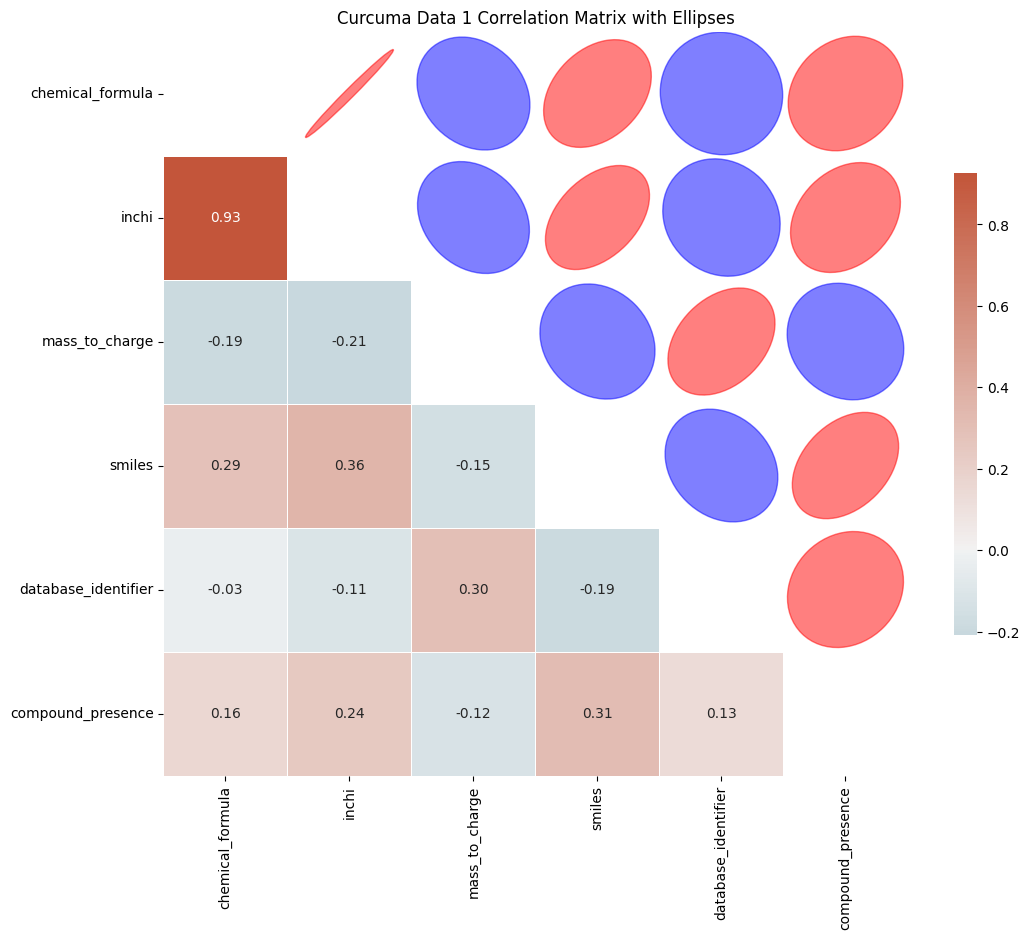

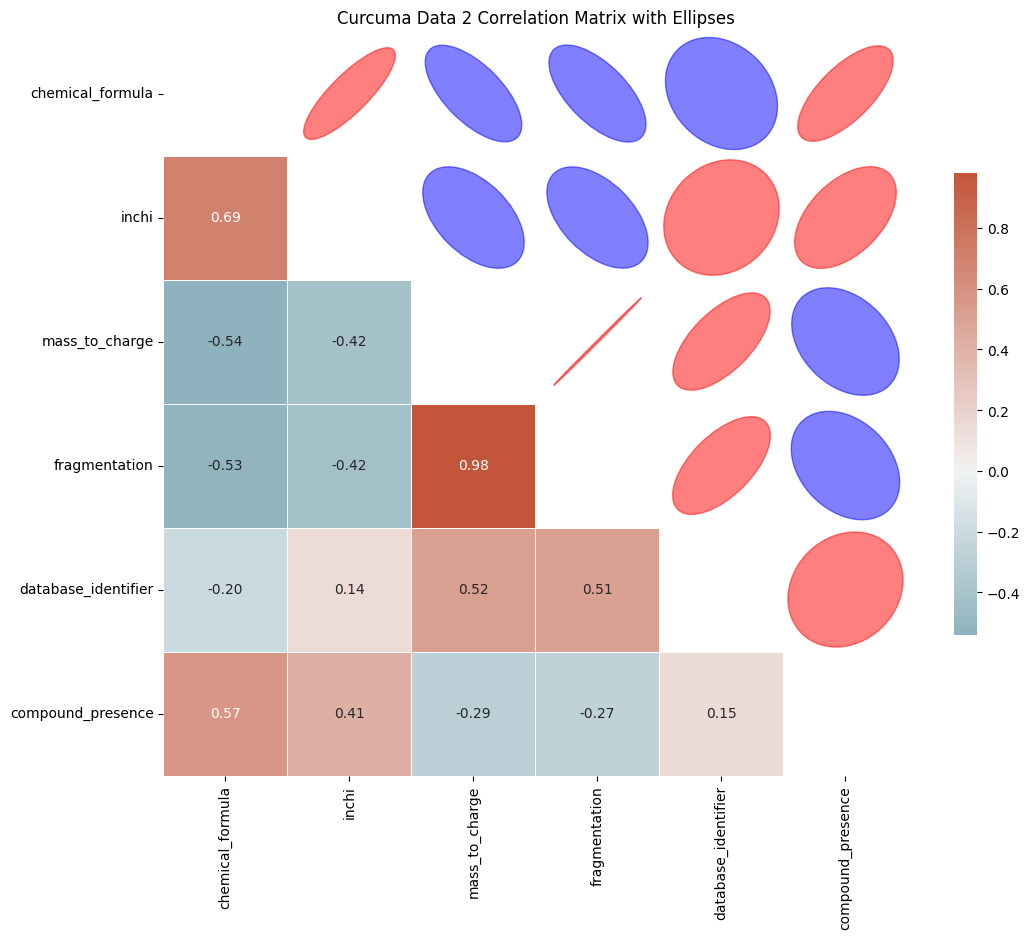

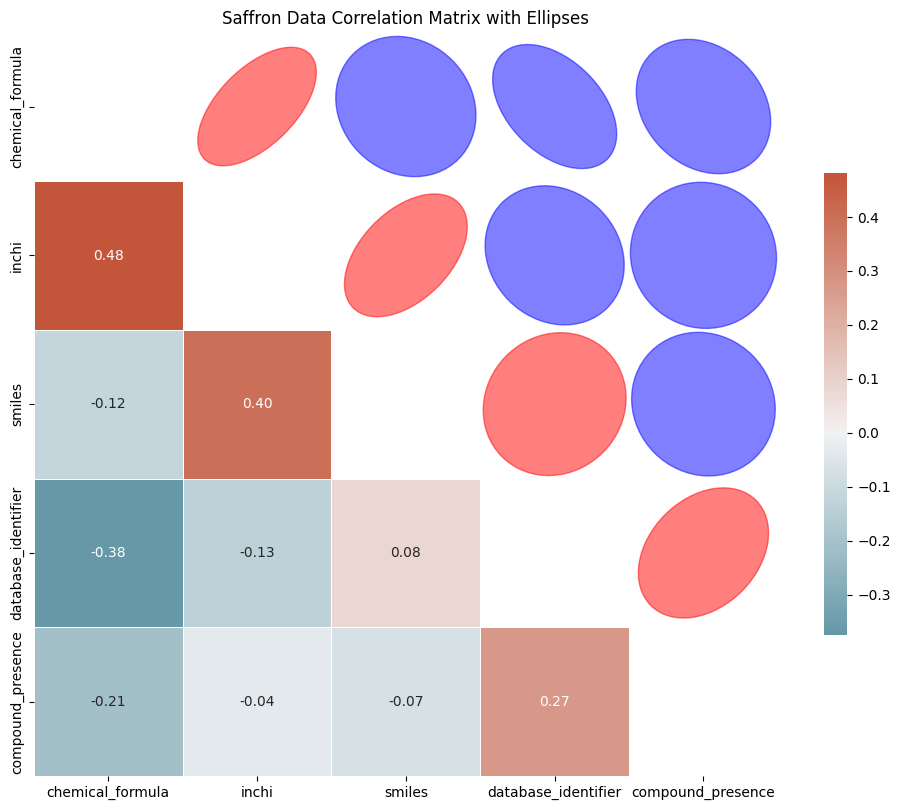

In [23]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif

# Load the data
curcuma_data1 = pd.read_csv('C:/Users/Muqaddas Bano/Downloads/MTBLS2790_files/m_MTBLS2790_LC-MS_negative_reverse-phase_metabolite_profiling_v2_maf.tsv', sep='\t')
curcuma_data2 = pd.read_csv('C:/Users/Muqaddas Bano/Downloads/MTBLS2790_files/m_MTBLS2790_LC-MS_positive_reverse-phase_metabolite_profiling-1_v2_maf.tsv', sep='\t')
saffron_data = pd.read_csv('C:/Users/Muqaddas Bano/Downloads/MTBLS331_files/m_MTBLS331_uofc_hcc_serum_NMR_spectroscopy_v2_maf.tsv', sep='\t')

# Ensure data is cleaned
curcuma_data1.fillna(-1, inplace=True)
curcuma_data2.fillna(-1, inplace=True)
saffron_data.fillna(-1, inplace=True)

# Create binary indicator for the presence of curcumin and crocin
curcuma_compound = 'curcumin'
saffron_compound = 'crocin'

curcuma_data1['compound_presence'] = curcuma_data1['metabolite_identification'].apply(lambda x: 1 if curcuma_compound in str(x).lower() else 0)
curcuma_data2['compound_presence'] = curcuma_data2['metabolite_identification'].apply(lambda x: 1 if curcuma_compound in str(x).lower() else 0)
saffron_data['compound_presence'] = saffron_data['metabolite_identification'].apply(lambda x: 1 if saffron_compound in str(x).lower() else 0)

# Select relevant features
features = ['chemical_formula', 'inchi', 'mass_to_charge', 'retention_time', 'fragmentation', 'smallmolecule_abundance_sub', 'smallmolecule_abundance_stdev_sub', 'smallmolecule_abundance_std_error_sub', 'smiles', 'taxid', 'species', 'search_engine_score', 'database_identifier']
target_variable = 'compound_presence'

# Convert relevant columns to strings
def ensure_str(df, columns):
    for column in columns:
        if column in df.columns:
            df[column] = df[column].astype(str)
    return df

curcuma_data1 = ensure_str(curcuma_data1, ['chemical_formula', 'inchi', 'smiles', 'taxid', 'species', 'database_identifier'])
curcuma_data2 = ensure_str(curcuma_data2, ['chemical_formula', 'inchi', 'smiles', 'taxid', 'species', 'database_identifier'])
saffron_data = ensure_str(saffron_data, ['chemical_formula', 'inchi', 'smiles', 'taxid', 'species', 'database_identifier'])

# Encode categorical features
def encode_categorical_features(df, features):
    le = LabelEncoder()
    for feature in features:
        if feature in df.columns and df[feature].dtype == 'object':
            df[feature] = le.fit_transform(df[feature].astype(str))
    return df

curcuma_data1_encoded = encode_categorical_features(curcuma_data1, features + [target_variable])
curcuma_data2_encoded = encode_categorical_features(curcuma_data2, features + [target_variable])
saffron_data_encoded = encode_categorical_features(saffron_data, features + [target_variable])

# Normalizing the numerical features
def normalize_features(df, numerical_features):
    scaler = StandardScaler()
    for feature in numerical_features:
        if feature in df.columns:
            df[feature] = scaler.fit_transform(df[[feature]])
    return df

numerical_features = ['mass_to_charge', 'retention_time']
curcuma_data1_encoded = normalize_features(curcuma_data1_encoded, numerical_features)
curcuma_data2_encoded = normalize_features(curcuma_data2_encoded, numerical_features)
saffron_data_encoded = normalize_features(saffron_data_encoded, numerical_features)

# Remove constant features
def remove_constant_features(df):
    return df.loc[:, (df != df.iloc[0]).any()]

curcuma_data1_encoded = remove_constant_features(curcuma_data1_encoded)
curcuma_data2_encoded = remove_constant_features(curcuma_data2_encoded)
saffron_data_encoded = remove_constant_features(saffron_data_encoded)

# Feature selection
def select_features(df, features, target_variable, k=5):
    present_features = [feature for feature in features if feature in df.columns]
    X = df[present_features]
    y = df[target_variable]
    selector = SelectKBest(score_func=f_classif, k=min(k, len(present_features)))
    X_new = selector.fit_transform(X, y)
    selected_features = X.columns[selector.get_support()]
    return df[selected_features.to_list() + [target_variable]]

curcuma_data1_selected = select_features(curcuma_data1_encoded, features, target_variable)
curcuma_data2_selected = select_features(curcuma_data2_encoded, features, target_variable)
saffron_data_selected = select_features(saffron_data_encoded, features, target_variable)

# Generate statistical summaries
curcuma_data1_summary = curcuma_data1_selected.describe(include='all')
curcuma_data2_summary = curcuma_data2_selected.describe(include='all')
saffron_data_summary = saffron_data_selected.describe(include='all')

# Display summaries
print("Curcuma Data 1 Summary:")
print(curcuma_data1_summary)
print("\nCurcuma Data 2 Summary:")
print(curcuma_data2_summary)
print("\nSaffron Data Summary:")
print(saffron_data_summary)

# Create an elliptical correlation plot
def plot_correlation_ellipses(data, title):
    corr = data.corr()
    mask = np.triu(np.ones_like(corr, dtype=bool))
    
    fig, ax = plt.subplots(figsize=(12, 12))
    cmap = sns.diverging_palette(220, 20, as_cmap=True)
    
    sns.heatmap(corr, mask=mask, cmap=cmap, center=0, annot=True, fmt='.2f', 
                square=True, linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)
    
    for i in range(len(corr.columns)):
        for j in range(i+1, len(corr.columns)):
            corr_ij = corr.iloc[i, j]
            if corr_ij != 0:
                ellipse_width = 1 - abs(corr_ij)
                ellipse_angle = 45 if corr_ij > 0 else -45
                e = Ellipse((j+0.5, i+0.5), width=ellipse_width, height=1, angle=ellipse_angle, color='red' if corr_ij > 0 else 'blue', alpha=0.5)
                ax.add_patch(e)
    
    plt.title(title)
    plt.show()

# Plot correlation matrices
plot_correlation_ellipses(curcuma_data1_selected, 'Curcuma Data 1 Correlation Matrix with Ellipses')
plot_correlation_ellipses(curcuma_data2_selected, 'Curcuma Data 2 Correlation Matrix with Ellipses')
plot_correlation_ellipses(saffron_data_selected, 'Saffron Data Correlation Matrix with Ellipses')


Curcuma Data 1 Summary:
       chemical_formula      inchi  mass_to_charge     smiles  \
count         59.000000  59.000000    5.900000e+01  59.000000   
mean          19.440678  22.355932    7.526936e-18  22.966102   
std           14.301279  15.710487    1.008584e+00  15.631496   
min            0.000000   0.000000   -2.918584e-01   0.000000   
25%            7.000000   8.500000   -2.918584e-01   9.500000   
50%           19.000000  22.000000   -2.918584e-01  22.000000   
75%           31.500000  35.500000   -2.918584e-01  36.500000   
max           45.000000  50.000000    4.356872e+00  50.000000   

       database_identifier  compound_presence  
count            59.000000          59.000000  
mean             27.355932           0.152542  
std              15.546108           0.362632  
min               0.000000           0.000000  
25%              14.500000           0.000000  
50%              28.000000           0.000000  
75%              41.000000           0.000000  
max   

C:\Users\Muqaddas Bano\AppData\Local\Temp\ipykernel_15008\847831040.py:110: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  p_matrix[r][c] = round(stats.pearsonr(df[r], df[c])[1], 4)


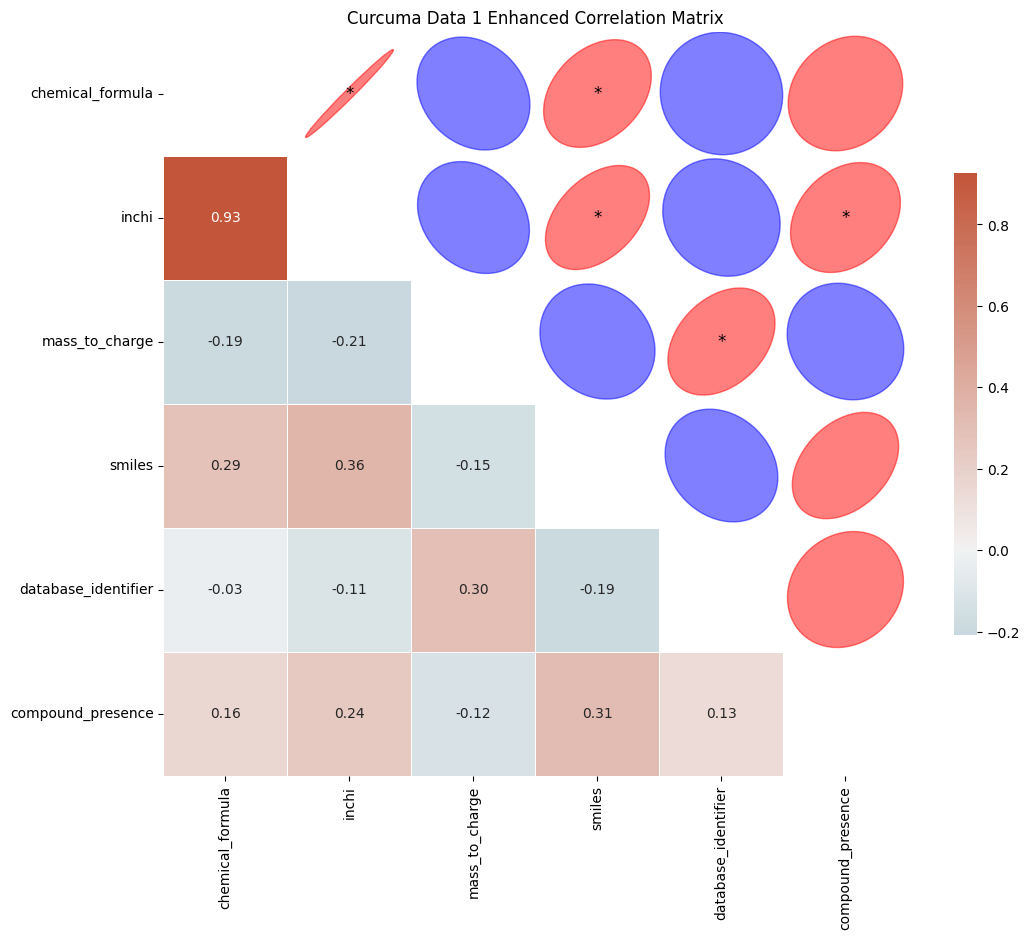

C:\Users\Muqaddas Bano\AppData\Local\Temp\ipykernel_15008\847831040.py:110: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  p_matrix[r][c] = round(stats.pearsonr(df[r], df[c])[1], 4)


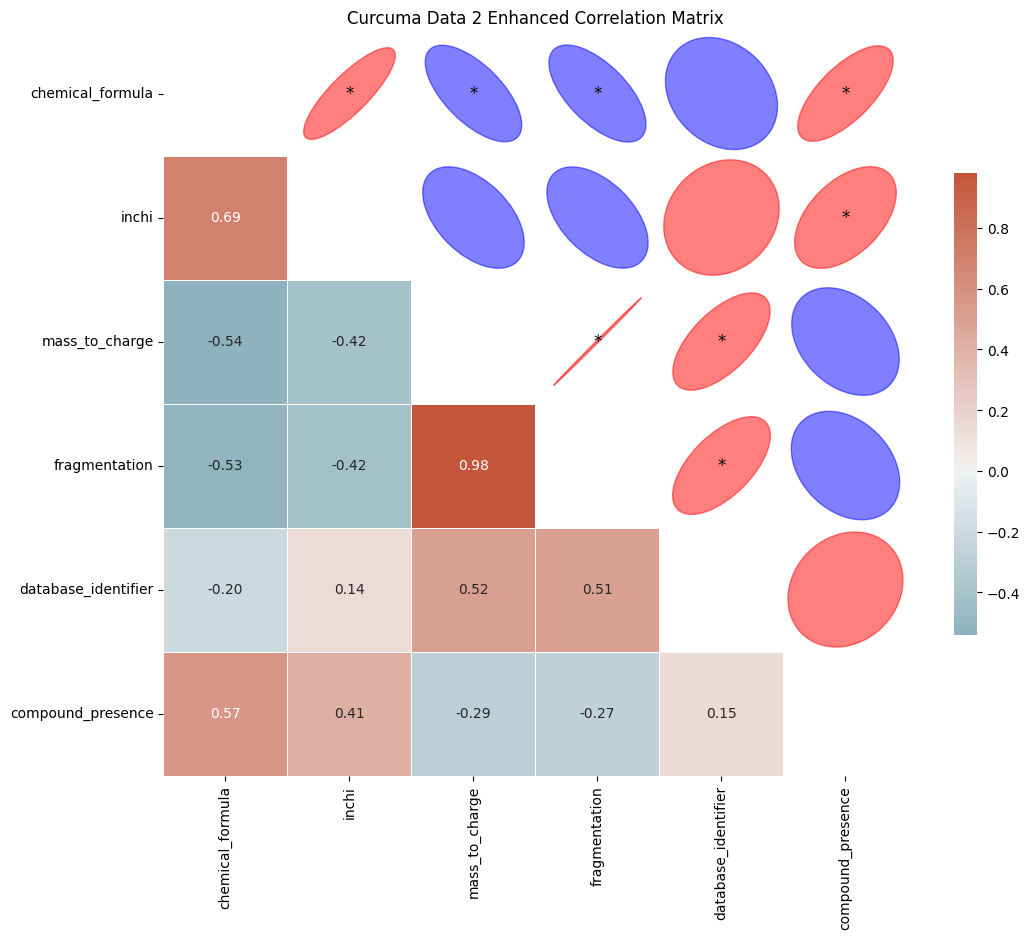

C:\Users\Muqaddas Bano\AppData\Local\Temp\ipykernel_15008\847831040.py:110: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  p_matrix[r][c] = round(stats.pearsonr(df[r], df[c])[1], 4)


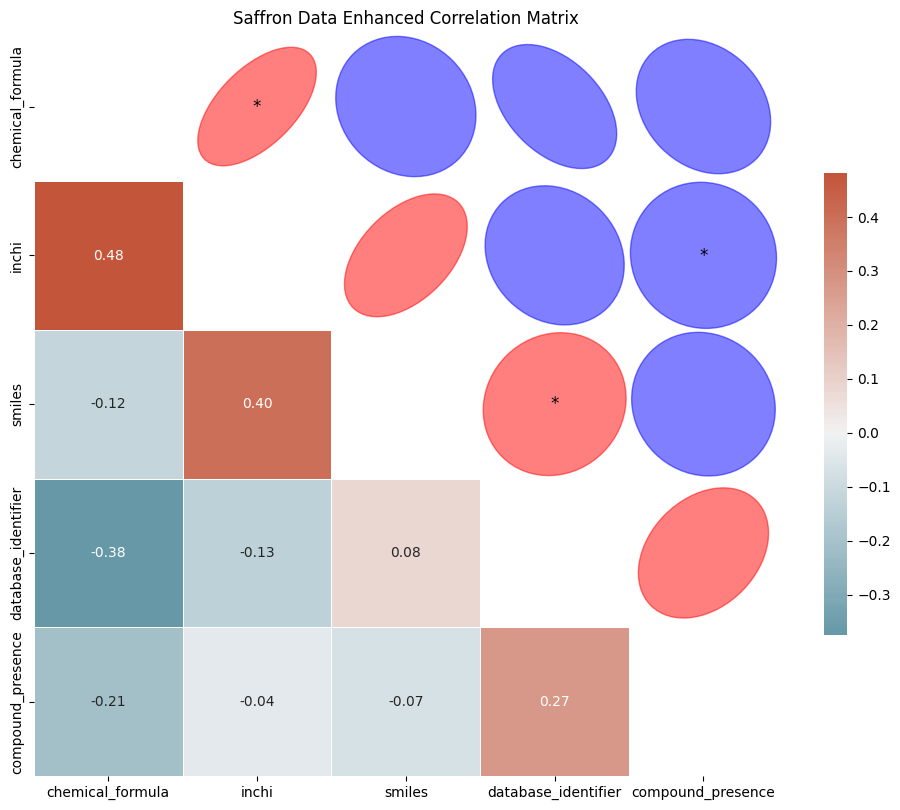

In [24]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
import scipy.stats as stats

# Load the data
curcuma_data1 = pd.read_csv('C:/Users/Muqaddas Bano/Downloads/MTBLS2790_files/m_MTBLS2790_LC-MS_negative_reverse-phase_metabolite_profiling_v2_maf.tsv', sep='\t')
curcuma_data2 = pd.read_csv('C:/Users/Muqaddas Bano/Downloads/MTBLS2790_files/m_MTBLS2790_LC-MS_positive_reverse-phase_metabolite_profiling-1_v2_maf.tsv', sep='\t')
saffron_data = pd.read_csv('C:/Users/Muqaddas Bano/Downloads/MTBLS331_files/m_MTBLS331_uofc_hcc_serum_NMR_spectroscopy_v2_maf.tsv', sep='\t')

# Ensure data is cleaned
curcuma_data1.fillna(-1, inplace=True)
curcuma_data2.fillna(-1, inplace=True)
saffron_data.fillna(-1, inplace=True)

# Create binary indicator for the presence of curcumin and crocin
curcuma_compound = 'curcumin'
saffron_compound = 'crocin'

curcuma_data1['compound_presence'] = curcuma_data1['metabolite_identification'].apply(lambda x: 1 if curcuma_compound in str(x).lower() else 0)
curcuma_data2['compound_presence'] = curcuma_data2['metabolite_identification'].apply(lambda x: 1 if curcuma_compound in str(x).lower() else 0)
saffron_data['compound_presence'] = saffron_data['metabolite_identification'].apply(lambda x: 1 if saffron_compound in str(x).lower() else 0)

# Select relevant features
features = ['chemical_formula', 'inchi', 'mass_to_charge', 'retention_time', 'fragmentation', 'smallmolecule_abundance_sub', 'smallmolecule_abundance_stdev_sub', 'smallmolecule_abundance_std_error_sub', 'smiles', 'taxid', 'species', 'search_engine_score', 'database_identifier']
target_variable = 'compound_presence'

# Convert relevant columns to strings
def ensure_str(df, columns):
    for column in columns:
        if column in df.columns:
            df[column] = df[column].astype(str)
    return df

curcuma_data1 = ensure_str(curcuma_data1, ['chemical_formula', 'inchi', 'smiles', 'taxid', 'species', 'database_identifier'])
curcuma_data2 = ensure_str(curcuma_data2, ['chemical_formula', 'inchi', 'smiles', 'taxid', 'species', 'database_identifier'])
saffron_data = ensure_str(saffron_data, ['chemical_formula', 'inchi', 'smiles', 'taxid', 'species', 'database_identifier'])

# Encode categorical features
def encode_categorical_features(df, features):
    le = LabelEncoder()
    for feature in features:
        if feature in df.columns and df[feature].dtype == 'object':
            df[feature] = le.fit_transform(df[feature].astype(str))
    return df

curcuma_data1_encoded = encode_categorical_features(curcuma_data1, features + [target_variable])
curcuma_data2_encoded = encode_categorical_features(curcuma_data2, features + [target_variable])
saffron_data_encoded = encode_categorical_features(saffron_data, features + [target_variable])

# Normalizing the numerical features
def normalize_features(df, numerical_features):
    scaler = StandardScaler()
    for feature in numerical_features:
        if feature in df.columns:
            df[feature] = scaler.fit_transform(df[[feature]])
    return df

numerical_features = ['mass_to_charge', 'retention_time']
curcuma_data1_encoded = normalize_features(curcuma_data1_encoded, numerical_features)
curcuma_data2_encoded = normalize_features(curcuma_data2_encoded, numerical_features)
saffron_data_encoded = normalize_features(saffron_data_encoded, numerical_features)

# Remove constant features
def remove_constant_features(df):
    return df.loc[:, (df != df.iloc[0]).any()]

curcuma_data1_encoded = remove_constant_features(curcuma_data1_encoded)
curcuma_data2_encoded = remove_constant_features(curcuma_data2_encoded)
saffron_data_encoded = remove_constant_features(saffron_data_encoded)

# Feature selection
def select_features(df, features, target_variable, k=5):
    present_features = [feature for feature in features if feature in df.columns]
    X = df[present_features]
    y = df[target_variable]
    selector = SelectKBest(score_func=f_classif, k=min(k, len(present_features)))
    X_new = selector.fit_transform(X, y)
    selected_features = X.columns[selector.get_support()]
    return df[selected_features.to_list() + [target_variable]]

curcuma_data1_selected = select_features(curcuma_data1_encoded, features, target_variable)
curcuma_data2_selected = select_features(curcuma_data2_encoded, features, target_variable)
saffron_data_selected = select_features(saffron_data_encoded, features, target_variable)

# Generate statistical summaries
curcuma_data1_summary = curcuma_data1_selected.describe(include='all')
curcuma_data2_summary = curcuma_data2_selected.describe(include='all')
saffron_data_summary = saffron_data_selected.describe(include='all')

# Display summaries
print("Curcuma Data 1 Summary:")
print(curcuma_data1_summary)
print("\nCurcuma Data 2 Summary:")
print(curcuma_data2_summary)
print("\nSaffron Data Summary:")
print(saffron_data_summary)

# Calculate p-values for the correlations
def calculate_p_values(data):
    df = pd.DataFrame(data)
    df_cols = pd.DataFrame(columns=df.columns)
    p_matrix = df_cols.transpose().join(df_cols, how='outer')
    for r in df.columns:
        for c in df.columns:
            p_matrix[r][c] = round(stats.pearsonr(df[r], df[c])[1], 4)
    return p_matrix

# Create an elliptical correlation plot with p-values
def plot_correlation_ellipses(data, title):
    corr = data.corr()
    p_vals = calculate_p_values(data)
    mask = np.triu(np.ones_like(corr, dtype=bool))
    
    fig, ax = plt.subplots(figsize=(12, 12))
    cmap = sns.diverging_palette(220, 20, as_cmap=True)
    
    sns.heatmap(corr, mask=mask, cmap=cmap, center=0, annot=True, fmt='.2f', 
                square=True, linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)
    
    for i in range(len(corr.columns)):
        for j in range(i+1, len(corr.columns)):
            corr_ij = corr.iloc[i, j]
            p_val = p_vals.iloc[i, j]
            if corr_ij != 0:
                ellipse_width = 1 - abs(corr_ij)
                ellipse_angle = 45 if corr_ij > 0 else -45
                color = 'red' if corr_ij > 0 else 'blue'
                e = Ellipse((j+0.5, i+0.5), width=ellipse_width, height=1, angle=ellipse_angle, color=color, alpha=0.5)
                ax.add_patch(e)
                if p_val < 0.05:
                    ax.text(j+0.5, i+0.5, '*', ha='center', va='center', color='black', fontsize=12)
    
    plt.title(title)
    plt.show()

# Plot correlation matrices with enhanced features
plot_correlation_ellipses(curcuma_data1_selected, 'Curcuma Data 1 Enhanced Correlation Matrix')
plot_correlation_ellipses(curcuma_data2_selected, 'Curcuma Data 2 Enhanced Correlation Matrix')
plot_correlation_ellipses(saffron_data_selected, 'Saffron Data Enhanced Correlation Matrix')


In [27]:
def plot_correlation_ellipses(data, title):
    corr = data.corr()
    p_vals = calculate_p_values(data)
    mask = np.triu(np.ones_like(corr, dtype=bool))
    
    fig, ax = plt.subplots(figsize=(12, 12))
    cmap = sns.diverging_palette(220, 20, as_cmap=True)
    
    sns.heatmap(corr, mask=mask, cmap=cmap, center=0, annot=True, fmt='.2f', 
                square=True, linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)
    
    for i in range(len(corr.columns)):
        for j in range(i+1, len(corr.columns)):
            corr_ij = corr.iloc[i, j]
            p_val = p_vals.iloc[i, j]
            if corr_ij != 0:
                ellipse_width = 1 - abs(corr_ij)
                ellipse_angle = 45 if corr_ij > 0 else -45
                color = 'red' if corr_ij > 0 else 'blue'
                e = Ellipse((j+0.5, i+0.5), width=ellipse_width, height=1, angle=ellipse_angle, color=color, alpha=0.5)
                ax.add_patch(e)
                if p_val < 0.05:
                    ax.text(j+0.5, i+0.5, '*', ha='center', va='center', color='black', fontsize=12)
                if p_val < 0.01:
                    ax.text(j+0.5, i+0.5, '**', ha='center', va='center', color='black', fontsize=12)
                if p_val < 0.001:
                    ax.text(j+0.5, i+0.5, '***', ha='center', va='center', color='black', fontsize=12)
    
    plt.title(title)
    plt.show()


Curcuma Data 1 Summary:
       chemical_formula      inchi  mass_to_charge     smiles  \
count         59.000000  59.000000    5.900000e+01  59.000000   
mean          19.440678  22.355932    7.526936e-18  22.966102   
std           14.301279  15.710487    1.008584e+00  15.631496   
min            0.000000   0.000000   -2.918584e-01   0.000000   
25%            7.000000   8.500000   -2.918584e-01   9.500000   
50%           19.000000  22.000000   -2.918584e-01  22.000000   
75%           31.500000  35.500000   -2.918584e-01  36.500000   
max           45.000000  50.000000    4.356872e+00  50.000000   

       database_identifier  compound_presence  
count            59.000000          59.000000  
mean             27.355932           0.152542  
std              15.546108           0.362632  
min               0.000000           0.000000  
25%              14.500000           0.000000  
50%              28.000000           0.000000  
75%              41.000000           0.000000  
max   

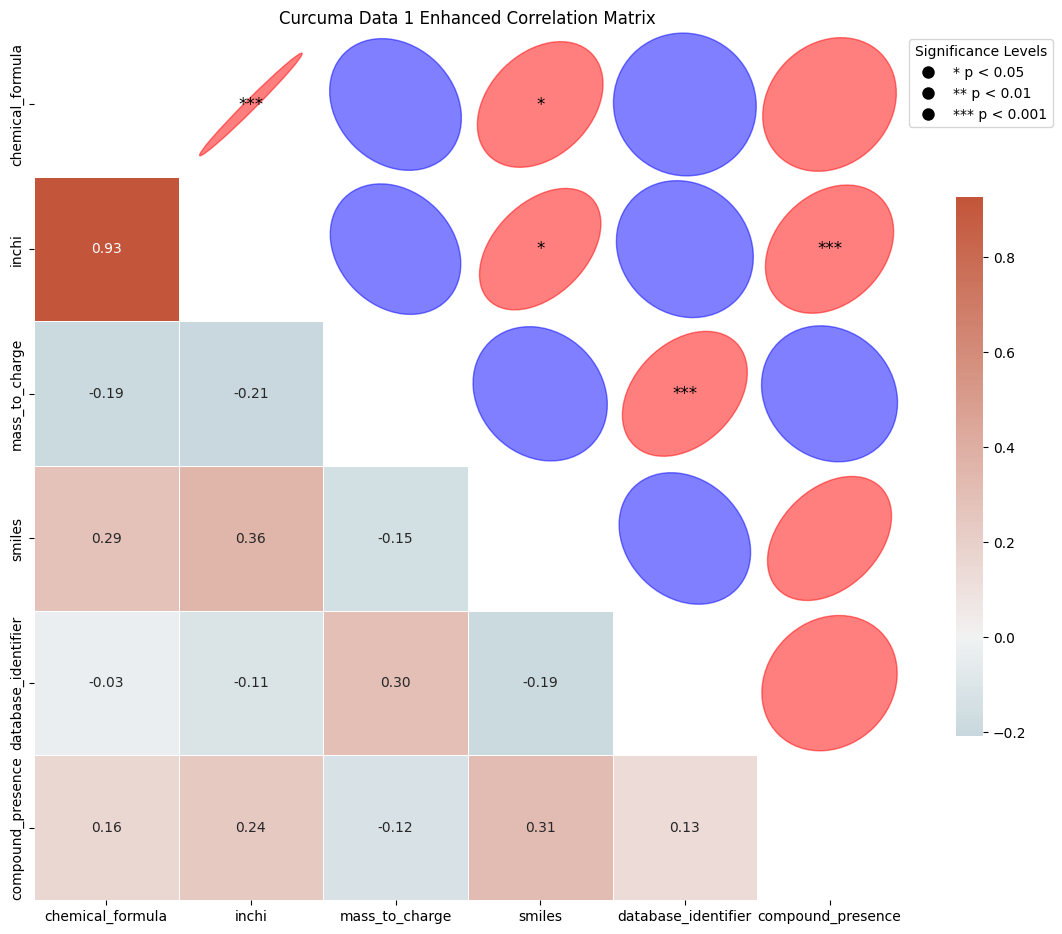

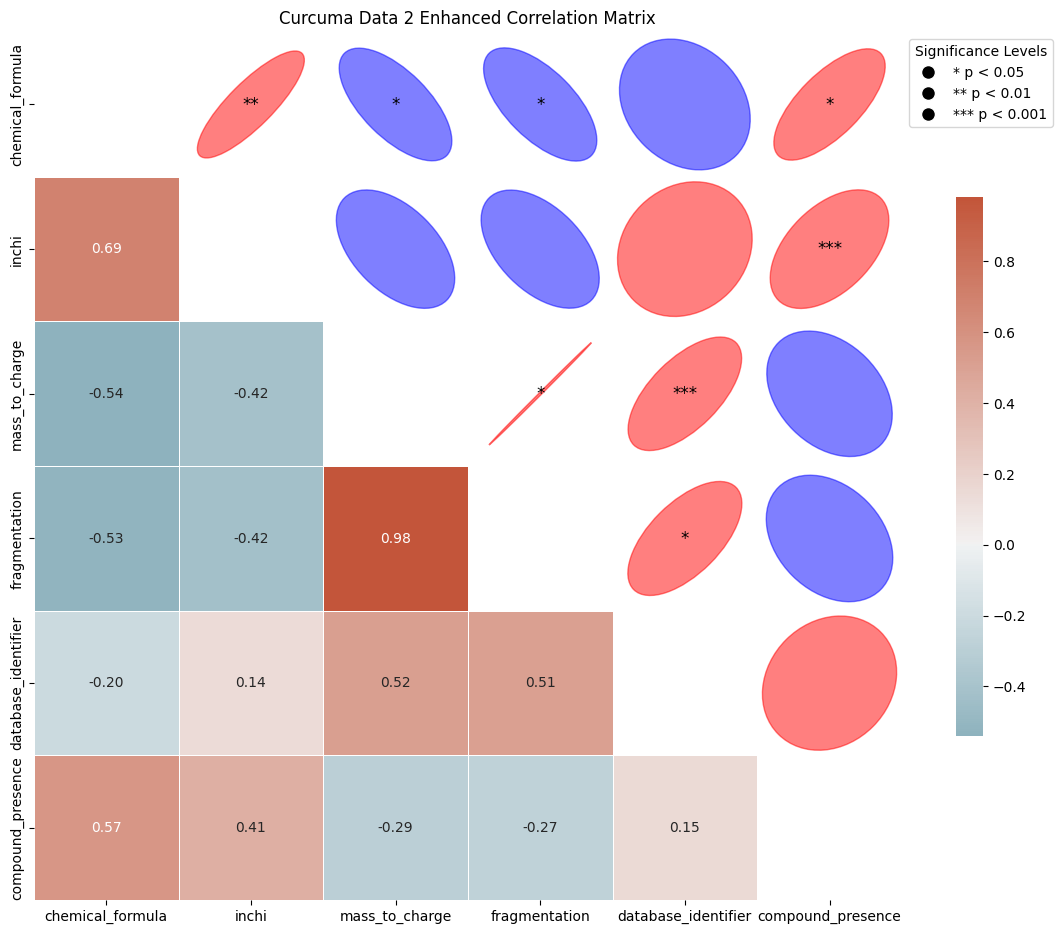

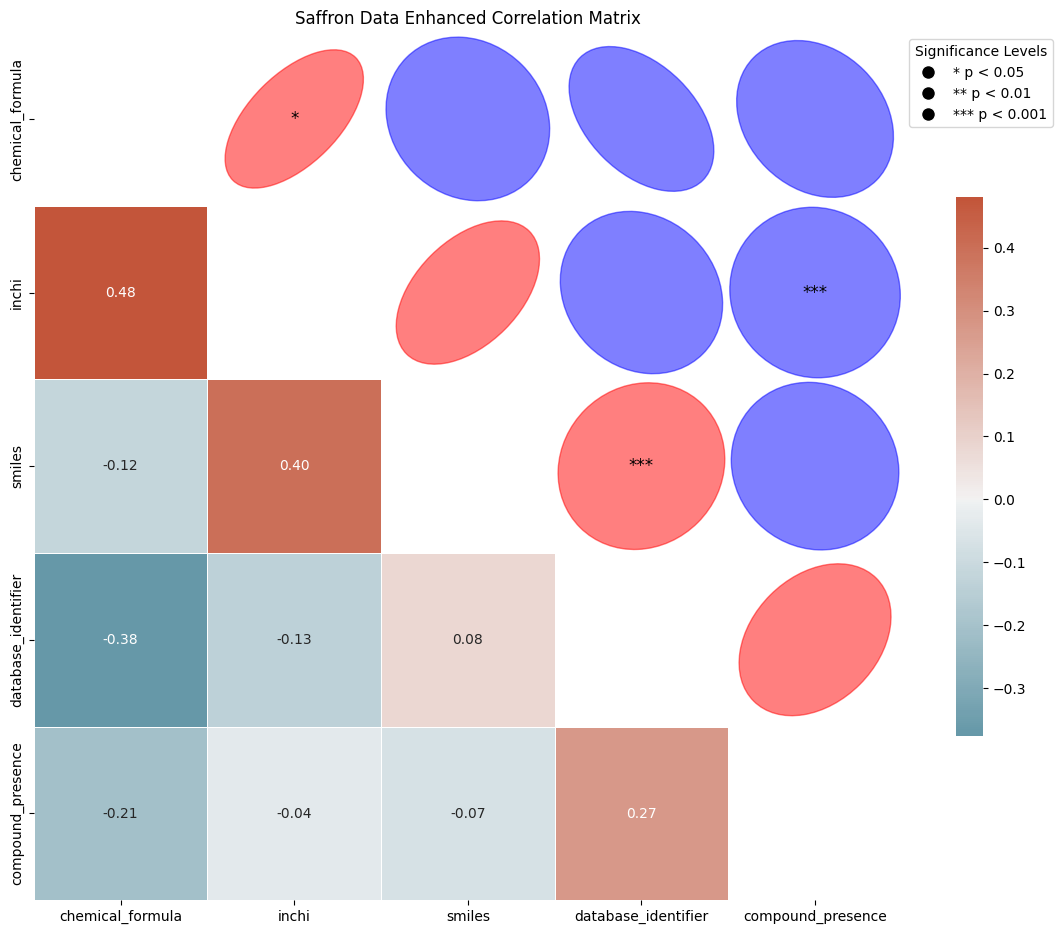

In [30]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
import scipy.stats as stats

# Load the data
curcuma_data1 = pd.read_csv('C:/Users/Muqaddas Bano/Downloads/MTBLS2790_files/m_MTBLS2790_LC-MS_negative_reverse-phase_metabolite_profiling_v2_maf.tsv', sep='\t')
curcuma_data2 = pd.read_csv('C:/Users/Muqaddas Bano/Downloads/MTBLS2790_files/m_MTBLS2790_LC-MS_positive_reverse-phase_metabolite_profiling-1_v2_maf.tsv', sep='\t')
saffron_data = pd.read_csv('C:/Users/Muqaddas Bano/Downloads/MTBLS331_files/m_MTBLS331_uofc_hcc_serum_NMR_spectroscopy_v2_maf.tsv', sep='\t')

# Ensure data is cleaned
curcuma_data1.fillna(-1, inplace=True)
curcuma_data2.fillna(-1, inplace=True)
saffron_data.fillna(-1, inplace=True)

# Create binary indicator for the presence of curcumin and crocin
curcuma_compound = 'curcumin'
saffron_compound = 'crocin'

curcuma_data1['compound_presence'] = curcuma_data1['metabolite_identification'].apply(lambda x: 1 if curcuma_compound in str(x).lower() else 0)
curcuma_data2['compound_presence'] = curcuma_data2['metabolite_identification'].apply(lambda x: 1 if curcuma_compound in str(x).lower() else 0)
saffron_data['compound_presence'] = saffron_data['metabolite_identification'].apply(lambda x: 1 if saffron_compound in str(x).lower() else 0)

# Select relevant features
features = ['chemical_formula', 'inchi', 'mass_to_charge', 'retention_time', 'fragmentation', 'smallmolecule_abundance_sub', 'smallmolecule_abundance_stdev_sub', 'smallmolecule_abundance_std_error_sub', 'smiles', 'taxid', 'species', 'search_engine_score', 'database_identifier']
target_variable = 'compound_presence'

# Convert relevant columns to strings and explicitly cast to ensure compatibility
def ensure_str(df, columns):
    for column in columns:
        if column in df.columns:
            df[column] = df[column].astype(str)
    return df

curcuma_data1 = ensure_str(curcuma_data1, ['chemical_formula', 'inchi', 'smiles', 'taxid', 'species', 'database_identifier'])
curcuma_data2 = ensure_str(curcuma_data2, ['chemical_formula', 'inchi', 'smiles', 'taxid', 'species', 'database_identifier'])
saffron_data = ensure_str(saffron_data, ['chemical_formula', 'inchi', 'smiles', 'taxid', 'species', 'database_identifier'])

# Encode categorical features
def encode_categorical_features(df, features):
    le = LabelEncoder()
    for feature in features:
        if feature in df.columns and df[feature].dtype == 'object':
            df[feature] = le.fit_transform(df[feature].astype(str))
    return df

curcuma_data1_encoded = encode_categorical_features(curcuma_data1, features + [target_variable])
curcuma_data2_encoded = encode_categorical_features(curcuma_data2, features + [target_variable])
saffron_data_encoded = encode_categorical_features(saffron_data, features + [target_variable])

# Normalizing the numerical features
def normalize_features(df, numerical_features):
    scaler = StandardScaler()
    for feature in numerical_features:
        if feature in df.columns:
            df[feature] = scaler.fit_transform(df[[feature]])
    return df

numerical_features = ['mass_to_charge', 'retention_time']
curcuma_data1_encoded = normalize_features(curcuma_data1_encoded, numerical_features)
curcuma_data2_encoded = normalize_features(curcuma_data2_encoded, numerical_features)
saffron_data_encoded = normalize_features(saffron_data_encoded, numerical_features)

# Remove constant features
def remove_constant_features(df):
    return df.loc[:, (df != df.iloc[0]).any()]

curcuma_data1_encoded = remove_constant_features(curcuma_data1_encoded)
curcuma_data2_encoded = remove_constant_features(curcuma_data2_encoded)
saffron_data_encoded = remove_constant_features(saffron_data_encoded)

# Feature selection
def select_features(df, features, target_variable, k=5):
    present_features = [feature for feature in features if feature in df.columns]
    X = df[present_features]
    y = df[target_variable]
    selector = SelectKBest(score_func=f_classif, k=min(k, len(present_features)))
    X_new = selector.fit_transform(X, y)
    selected_features = X.columns[selector.get_support()]
    return df[selected_features.to_list() + [target_variable]]

curcuma_data1_selected = select_features(curcuma_data1_encoded, features, target_variable)
curcuma_data2_selected = select_features(curcuma_data2_encoded, features, target_variable)
saffron_data_selected = select_features(saffron_data_encoded, features, target_variable)

# Generate statistical summaries
curcuma_data1_summary = curcuma_data1_selected.describe(include='all')
curcuma_data2_summary = curcuma_data2_selected.describe(include='all')
saffron_data_summary = saffron_data_selected.describe(include='all')

# Display summaries
print("Curcuma Data 1 Summary:")
print(curcuma_data1_summary)
print("\nCurcuma Data 2 Summary:")
print(curcuma_data2_summary)
print("\nSaffron Data Summary:")
print(saffron_data_summary)

# Calculate p-values for the correlations
def calculate_p_values(data):
    df = pd.DataFrame(data)
    df_cols = pd.DataFrame(columns=df.columns)
    p_matrix = df_cols.transpose().join(df_cols, how='outer')
    for r in df.columns:
        for c in df.columns:
            p_matrix.loc[r, c] = round(stats.pearsonr(df[r], df[c])[1], 4)
    return p_matrix

# Create an elliptical correlation plot with p-values and significance legend
def plot_correlation_ellipses(data, title):
    corr = data.corr()
    p_vals = calculate_p_values(data)
    mask = np.triu(np.ones_like(corr, dtype=bool))
    
    fig, ax = plt.subplots(figsize=(14, 14))
    cmap = sns.diverging_palette(220, 20, as_cmap=True)
    
    sns.heatmap(corr, mask=mask, cmap=cmap, center=0, annot=True, fmt='.2f', 
                square=True, linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)
    
    for i in range(len(corr.columns)):
        for j in range(i+1, len(corr.columns)):
            corr_ij = corr.iloc[i, j]
            p_val = p_vals.iloc[i, j]
            if corr_ij != 0:
                ellipse_width = 1 - abs(corr_ij)
                ellipse_angle = 45 if corr_ij > 0 else -45
                color = 'red' if corr_ij > 0 else 'blue'
                e = Ellipse((j+0.5, i+0.5), width=ellipse_width, height=1, angle=ellipse_angle, color=color, alpha=0.5)
                ax.add_patch(e)
                if p_val < 0.001:
                    ax.text(j+0.5, i+0.5, '***', ha='center', va='center', color='black', fontsize=12)
                elif p_val < 0.01:
                    ax.text(j+0.5, i+0.5, '**', ha='center', va='center', color='black', fontsize=12)
                elif p_val < 0.05:
                    ax.text(j+0.5, i+0.5, '*', ha='center', va='center', color='black', fontsize=12)
    
    # Add a legend for the significance levels
    from matplotlib.lines import Line2D
    legend_elements = [
        Line2D([0], [0], marker='o', color='w', label='* p < 0.05', markerfacecolor='black', markersize=10),
        Line2D([0], [0], marker='o', color='w', label='** p < 0.01', markerfacecolor='black', markersize=10),
        Line2D([0], [0], marker='o', color='w', label='*** p < 0.001', markerfacecolor='black', markersize=10)
    ]
    ax.legend(handles=legend_elements, loc='upper left', bbox_to_anchor=(1, 1), title="Significance Levels")
    
    plt.title(title)
    plt.show()

# Plot correlation matrices with enhanced features
plot_correlation_ellipses(curcuma_data1_selected, 'Curcuma Data 1 Enhanced Correlation Matrix')
plot_correlation_ellipses(curcuma_data2_selected, 'Curcuma Data 2 Enhanced Correlation Matrix')
plot_correlation_ellipses(saffron_data_selected, 'Saffron Data Enhanced Correlation Matrix')


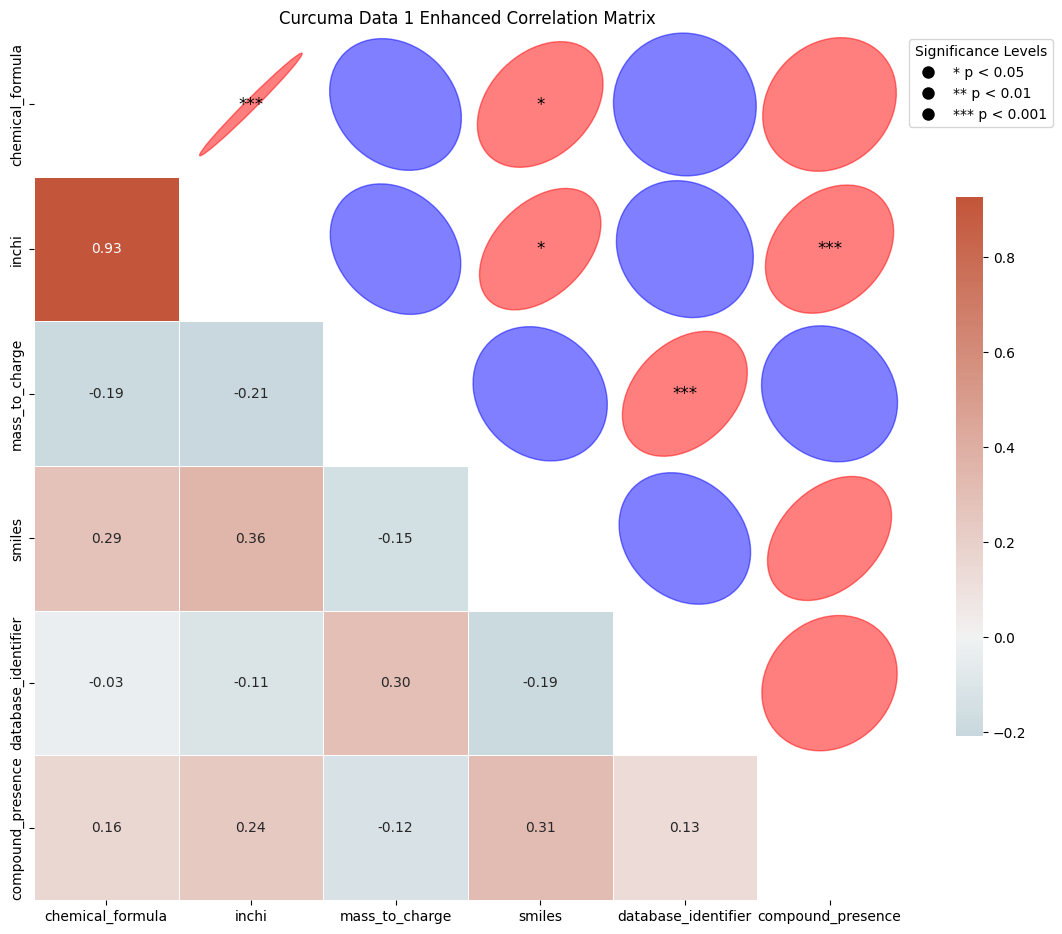

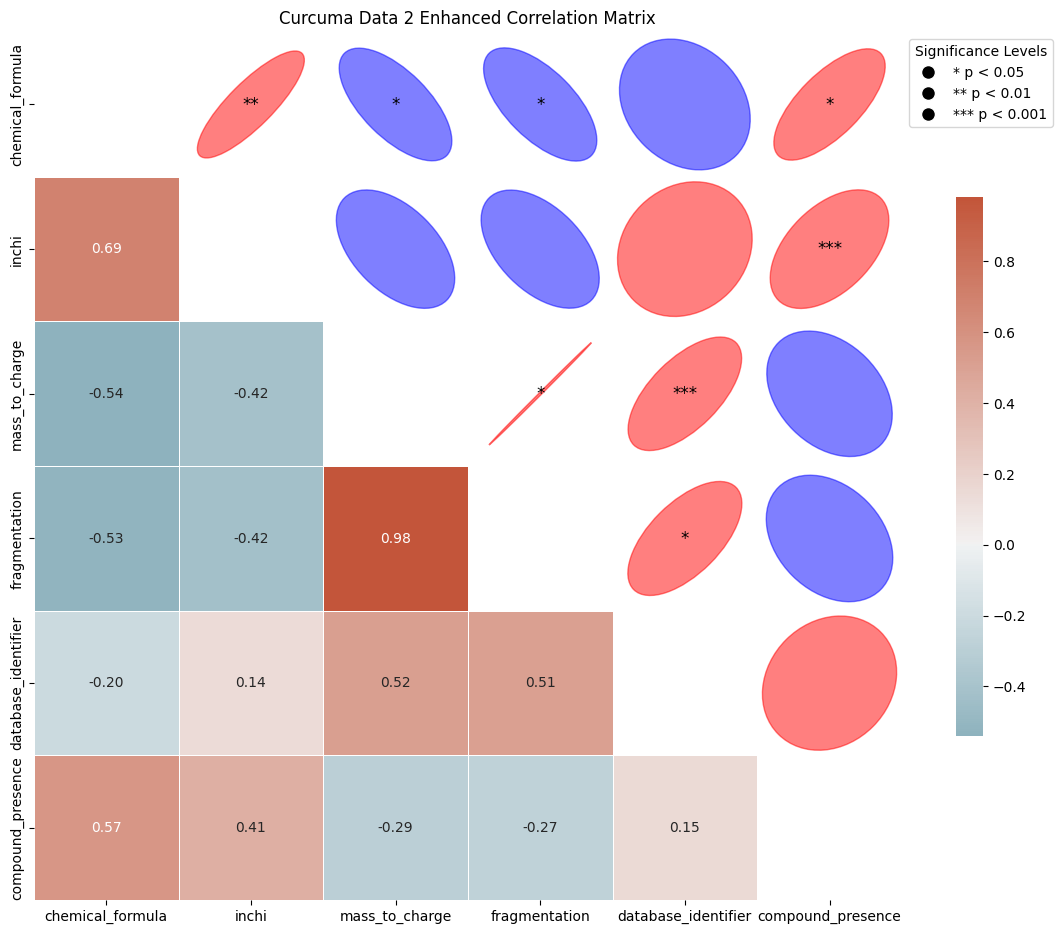

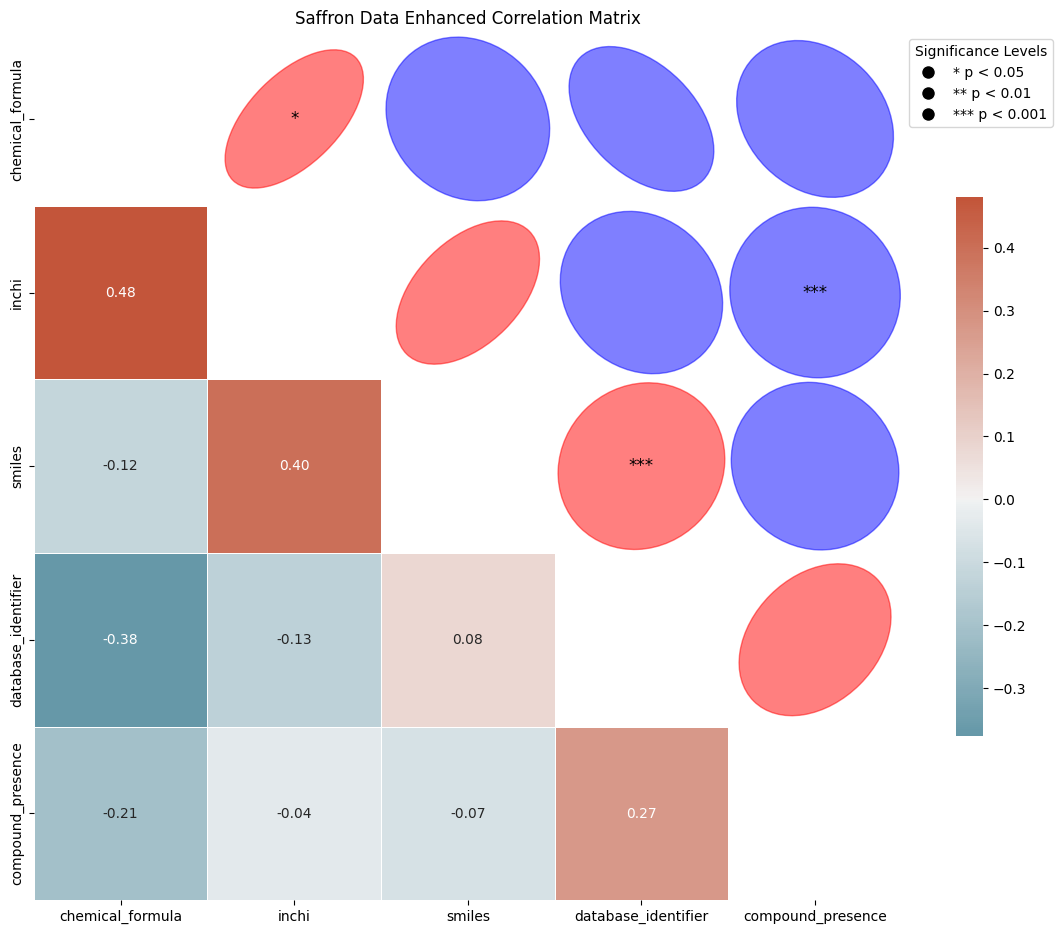

In [33]:
# Create an elliptical correlation plot with p-values and significance legend
def plot_correlation_ellipses(data, title, filename):
    corr = data.corr()
    p_vals = calculate_p_values(data)
    mask = np.triu(np.ones_like(corr, dtype=bool))
    
    fig, ax = plt.subplots(figsize=(14, 14))
    cmap = sns.diverging_palette(220, 20, as_cmap=True)
    
    sns.heatmap(corr, mask=mask, cmap=cmap, center=0, annot=True, fmt='.2f', 
                square=True, linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)
    
    for i in range(len(corr.columns)):
        for j in range(i+1, len(corr.columns)):
            corr_ij = corr.iloc[i, j]
            p_val = p_vals.iloc[i, j]
            if corr_ij != 0:
                ellipse_width = 1 - abs(corr_ij)
                ellipse_angle = 45 if corr_ij > 0 else -45
                color = 'red' if corr_ij > 0 else 'blue'
                e = Ellipse((j+0.5, i+0.5), width=ellipse_width, height=1, angle=ellipse_angle, color=color, alpha=0.5)
                ax.add_patch(e)
                if p_val < 0.001:
                    ax.text(j+0.5, i+0.5, '***', ha='center', va='center', color='black', fontsize=12)
                elif p_val < 0.01:
                    ax.text(j+0.5, i+0.5, '**', ha='center', va='center', color='black', fontsize=12)
                elif p_val < 0.05:
                    ax.text(j+0.5, i+0.5, '*', ha='center', va='center', color='black', fontsize=12)
    
    # Add a legend for the significance levels
    from matplotlib.lines import Line2D
    legend_elements = [
        Line2D([0], [0], marker='o', color='w', label='* p < 0.05', markerfacecolor='black', markersize=10),
        Line2D([0], [0], marker='o', color='w', label='** p < 0.01', markerfacecolor='black', markersize=10),
        Line2D([0], [0], marker='o', color='w', label='*** p < 0.001', markerfacecolor='black', markersize=10)
    ]
    ax.legend(handles=legend_elements, loc='upper left', bbox_to_anchor=(1, 1), title="Significance Levels")
    
    plt.title(title)
    plt.savefig(filename, format='jpeg', dpi=300, bbox_inches='tight')
    plt.show()

# Example usage
plot_correlation_ellipses(curcuma_data1_selected, 'Curcuma Data 1 Enhanced Correlation Matrix', 'curcuma_data1_correlation_matrix.jpg')
plot_correlation_ellipses(curcuma_data2_selected, 'Curcuma Data 2 Enhanced Correlation Matrix', 'curcuma_data2_correlation_matrix.jpg')
plot_correlation_ellipses(saffron_data_selected, 'Saffron Data Enhanced Correlation Matrix', 'Saffron_data_correlation_matrix.jpg')


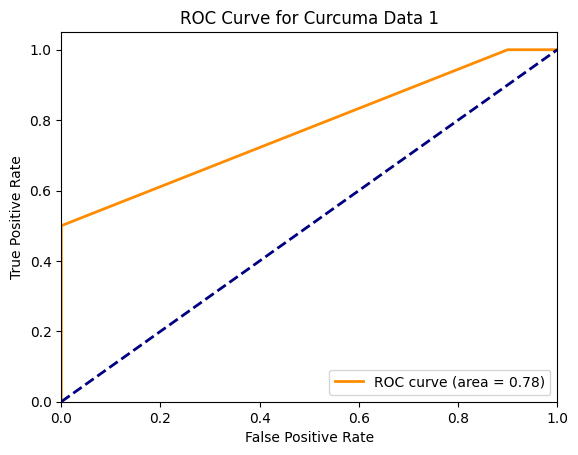

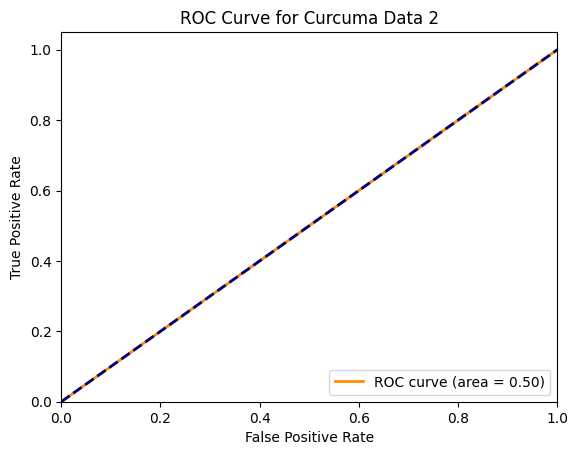

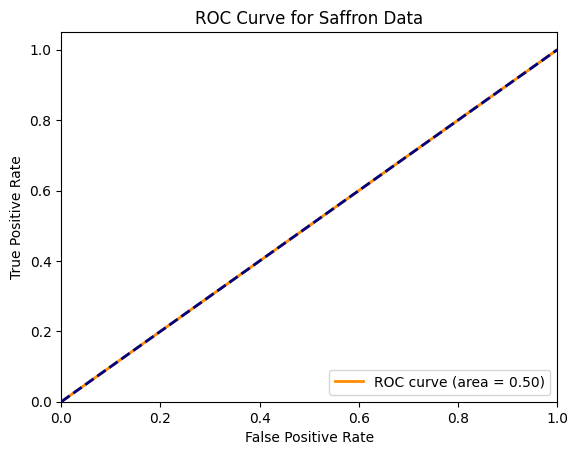

In [7]:
import pandas as pd
import numpy as np
from xgboost import XGBClassifier
from sklearn.metrics import precision_recall_curve, classification_report, roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

# Load your data
curcuma_data1 = pd.read_csv('C:/Users/Muqaddas Bano/Downloads/MTBLS2790_files/m_MTBLS2790_LC-MS_negative_reverse-phase_metabolite_profiling_v2_maf.tsv', sep='\t')
curcuma_data2 = pd.read_csv('C:/Users/Muqaddas Bano/Downloads/MTBLS2790_files/m_MTBLS2790_LC-MS_positive_reverse-phase_metabolite_profiling-1_v2_maf.tsv', sep='\t')
saffron_data = pd.read_csv('C:/Users/Muqaddas Bano/Downloads/MTBLS331_files/m_MTBLS331_uofc_hcc_serum_NMR_spectroscopy_v2_maf.tsv', sep='\t')

# Ensure data is cleaned
curcuma_data1.fillna(-1, inplace=True)
curcuma_data2.fillna(-1, inplace=True)
saffron_data.fillna(-1, inplace=True)

# Create binary indicator for the presence of curcumin and crocin
curcuma_compound = 'curcumin'
saffron_compound = 'crocin'

curcuma_data1['compound_presence'] = curcuma_data1['metabolite_identification'].apply(lambda x: 1 if curcuma_compound in str(x).lower() else 0)
curcuma_data2['compound_presence'] = curcuma_data2['metabolite_identification'].apply(lambda x: 1 if curcuma_compound in str(x).lower() else 0)
saffron_data['compound_presence'] = saffron_data['metabolite_identification'].apply(lambda x: 1 if saffron_compound in str(x).lower() else 0)

# Select relevant features and convert categorical features to numerical
def preprocess_data(data, feature_columns):
    enc = OneHotEncoder()
    for col in feature_columns:
        data.loc[:, col] = data[col].astype(str)  # Convert all values to strings
        transformed = enc.fit_transform(data[[col]])
        transformed_df = pd.DataFrame(transformed.toarray(), columns=enc.get_feature_names_out([col]))
        data = pd.concat([data.reset_index(drop=True), transformed_df.reset_index(drop=True)], axis=1).drop(columns=[col])
    return data

curcuma_data1_selected = preprocess_data(curcuma_data1[['chemical_formula', 'inchi', 'mass_to_charge', 'smiles', 'database_identifier']], 
                                         ['chemical_formula', 'inchi', 'smiles', 'database_identifier'])
curcuma_data2_selected = preprocess_data(curcuma_data2[['chemical_formula', 'inchi', 'mass_to_charge', 'fragmentation', 'database_identifier']], 
                                         ['chemical_formula', 'inchi', 'fragmentation', 'database_identifier'])
saffron_data_selected = preprocess_data(saffron_data[['chemical_formula', 'inchi', 'smiles', 'database_identifier']], 
                                        ['chemical_formula', 'inchi', 'smiles', 'database_identifier'])

# Define the target variables
curcuma1_target = curcuma_data1['compound_presence']
curcuma2_target = curcuma_data2['compound_presence']
saffron_target = saffron_data['compound_presence']

# Split the data into training and testing sets
X_train_curcuma1, X_test_curcuma1, y_train_curcuma1, y_test_curcuma1 = train_test_split(
    curcuma_data1_selected, curcuma1_target, test_size=0.2, random_state=42
)

X_train_curcuma2, X_test_curcuma2, y_train_curcuma2, y_test_curcuma2 = train_test_split(
    curcuma_data2_selected, curcuma2_target, test_size=0.2, random_state=42
)

X_train_saffron, X_test_saffron, y_train_saffron, y_test_saffron = train_test_split(
    saffron_data_selected, saffron_target, test_size=0.2, random_state=42
)

# Ensure feature names are strings and do not contain invalid characters
def clean_feature_names(df):
    df.columns = df.columns.str.replace('[', '', regex=False).str.replace(']', '', regex=False).str.replace('<', '', regex=False).str.replace('>', '', regex=False).str.replace(' ', '_')
    return df

X_train_curcuma1 = clean_feature_names(X_train_curcuma1)
X_test_curcuma1 = clean_feature_names(X_test_curcuma1)
X_train_curcuma2 = clean_feature_names(X_train_curcuma2)
X_test_curcuma2 = clean_feature_names(X_test_curcuma2)
X_train_saffron = clean_feature_names(X_train_saffron)
X_test_saffron = clean_feature_names(X_test_saffron)

### Train and Evaluate XGBoost Classifiers

# Train final model for Curcuma Data 1
final_model_curcuma1 = XGBClassifier(
    random_state=42, 
    learning_rate=0.01, 
    max_depth=3, 
    n_estimators=50, 
    scale_pos_weight=23.0
)
final_model_curcuma1.fit(X_train_curcuma1, y_train_curcuma1)

# Train final model for Curcuma Data 2
final_model_curcuma2 = XGBClassifier(
    random_state=42, 
    learning_rate=0.01, 
    max_depth=3, 
    n_estimators=50, 
    scale_pos_weight=2.0
)
final_model_curcuma2.fit(X_train_curcuma2, y_train_curcuma2)

# Train final model for Saffron Data
final_model_saffron = XGBClassifier(
    random_state=42, 
    learning_rate=0.01, 
    max_depth=3, 
    n_estimators=50, 
    scale_pos_weight=3.0
)
final_model_saffron.fit(X_train_saffron, y_train_saffron)

### Generate and Plot ROC Curves

# Function to plot ROC curve and save as high-resolution JPEG
def plot_roc_curve(y_true, y_scores, title, filename):
    fpr, tpr, _ = roc_curve(y_true, y_scores)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(title)
    plt.legend(loc="lower right")
    plt.savefig(filename, format='jpeg', dpi=300)
    plt.show()

# Predict probabilities and generate ROC curve for Curcuma Data 1
y_scores_curcuma1 = final_model_curcuma1.predict_proba(X_test_curcuma1)[:, 1]
plot_roc_curve(y_test_curcuma1, y_scores_curcuma1, 'ROC Curve for Curcuma Data 1', 'roc_curve_curcuma1.jpg')

# Predict probabilities and generate ROC curve for Curcuma Data 2
y_scores_curcuma2 = final_model_curcuma2.predict_proba(X_test_curcuma2)[:, 1]
plot_roc_curve(y_test_curcuma2, y_scores_curcuma2, 'ROC Curve for Curcuma Data 2', 'roc_curve_curcuma2.jpg')

# Predict probabilities and generate ROC curve for Saffron Data
y_scores_saffron = final_model_saffron.predict_proba(X_test_saffron)[:, 1]
plot_roc_curve(y_test_saffron, y_scores_saffron, 'ROC Curve for Saffron Data', 'roc_curve_saffron.jpg')


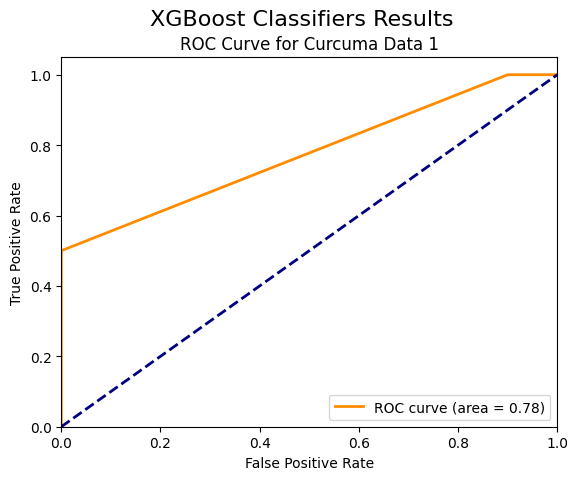

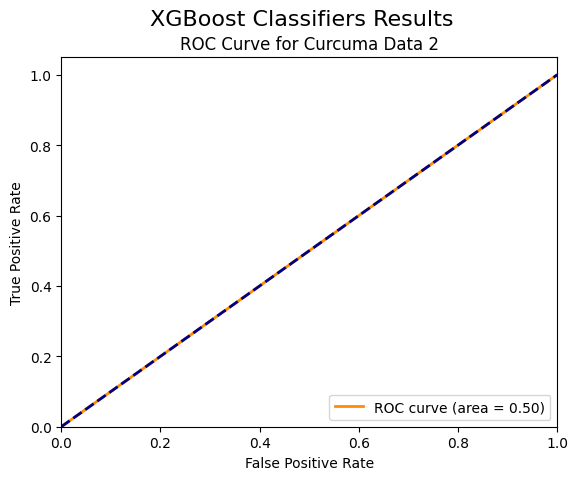

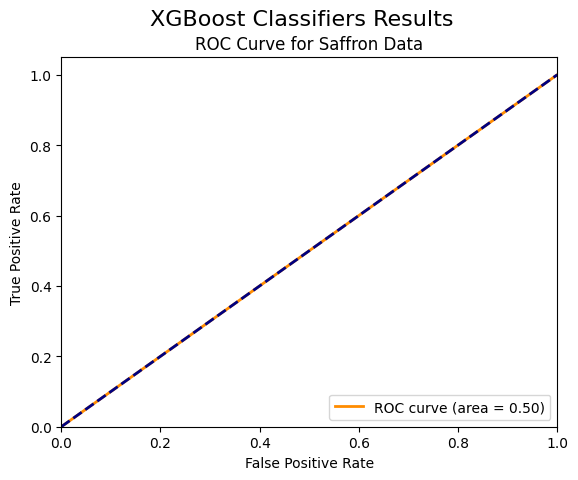

In [8]:
import pandas as pd
import numpy as np
from xgboost import XGBClassifier
from sklearn.metrics import precision_recall_curve, classification_report, roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

# Load your data
curcuma_data1 = pd.read_csv('C:/Users/Muqaddas Bano/Downloads/MTBLS2790_files/m_MTBLS2790_LC-MS_negative_reverse-phase_metabolite_profiling_v2_maf.tsv', sep='\t')
curcuma_data2 = pd.read_csv('C:/Users/Muqaddas Bano/Downloads/MTBLS2790_files/m_MTBLS2790_LC-MS_positive_reverse-phase_metabolite_profiling-1_v2_maf.tsv', sep='\t')
saffron_data = pd.read_csv('C:/Users/Muqaddas Bano/Downloads/MTBLS331_files/m_MTBLS331_uofc_hcc_serum_NMR_spectroscopy_v2_maf.tsv', sep='\t')

# Ensure data is cleaned
curcuma_data1.fillna(-1, inplace=True)
curcuma_data2.fillna(-1, inplace=True)
saffron_data.fillna(-1, inplace=True)

# Create binary indicator for the presence of curcumin and crocin
curcuma_compound = 'curcumin'
saffron_compound = 'crocin'

curcuma_data1['compound_presence'] = curcuma_data1['metabolite_identification'].apply(lambda x: 1 if curcuma_compound in str(x).lower() else 0)
curcuma_data2['compound_presence'] = curcuma_data2['metabolite_identification'].apply(lambda x: 1 if curcuma_compound in str(x).lower() else 0)
saffron_data['compound_presence'] = saffron_data['metabolite_identification'].apply(lambda x: 1 if saffron_compound in str(x).lower() else 0)

# Select relevant features and convert categorical features to numerical
def preprocess_data(data, feature_columns):
    enc = OneHotEncoder()
    for col in feature_columns:
        data.loc[:, col] = data[col].astype(str)  # Convert all values to strings
        transformed = enc.fit_transform(data[[col]])
        transformed_df = pd.DataFrame(transformed.toarray(), columns=enc.get_feature_names_out([col]))
        data = pd.concat([data.reset_index(drop=True), transformed_df.reset_index(drop=True)], axis=1).drop(columns=[col])
    return data

curcuma_data1_selected = preprocess_data(curcuma_data1[['chemical_formula', 'inchi', 'mass_to_charge', 'smiles', 'database_identifier']], 
                                         ['chemical_formula', 'inchi', 'smiles', 'database_identifier'])
curcuma_data2_selected = preprocess_data(curcuma_data2[['chemical_formula', 'inchi', 'mass_to_charge', 'fragmentation', 'database_identifier']], 
                                         ['chemical_formula', 'inchi', 'fragmentation', 'database_identifier'])
saffron_data_selected = preprocess_data(saffron_data[['chemical_formula', 'inchi', 'smiles', 'database_identifier']], 
                                        ['chemical_formula', 'inchi', 'smiles', 'database_identifier'])

# Define the target variables
curcuma1_target = curcuma_data1['compound_presence']
curcuma2_target = curcuma_data2['compound_presence']
saffron_target = saffron_data['compound_presence']

# Split the data into training and testing sets
X_train_curcuma1, X_test_curcuma1, y_train_curcuma1, y_test_curcuma1 = train_test_split(
    curcuma_data1_selected, curcuma1_target, test_size=0.2, random_state=42
)

X_train_curcuma2, X_test_curcuma2, y_train_curcuma2, y_test_curcuma2 = train_test_split(
    curcuma_data2_selected, curcuma2_target, test_size=0.2, random_state=42
)

X_train_saffron, X_test_saffron, y_train_saffron, y_test_saffron = train_test_split(
    saffron_data_selected, saffron_target, test_size=0.2, random_state=42
)

# Ensure feature names are strings and do not contain invalid characters
def clean_feature_names(df):
    df.columns = df.columns.str.replace('[', '', regex=False).str.replace(']', '', regex=False).str.replace('<', '', regex=False).str.replace('>', '', regex=False).str.replace(' ', '_')
    return df

X_train_curcuma1 = clean_feature_names(X_train_curcuma1)
X_test_curcuma1 = clean_feature_names(X_test_curcuma1)
X_train_curcuma2 = clean_feature_names(X_train_curcuma2)
X_test_curcuma2 = clean_feature_names(X_test_curcuma2)
X_train_saffron = clean_feature_names(X_train_saffron)
X_test_saffron = clean_feature_names(X_test_saffron)

### Train and Evaluate XGBoost Classifiers

# Train final model for Curcuma Data 1
final_model_curcuma1 = XGBClassifier(
    random_state=42, 
    learning_rate=0.01, 
    max_depth=3, 
    n_estimators=50, 
    scale_pos_weight=23.0
)
final_model_curcuma1.fit(X_train_curcuma1, y_train_curcuma1)

# Train final model for Curcuma Data 2
final_model_curcuma2 = XGBClassifier(
    random_state=42, 
    learning_rate=0.01, 
    max_depth=3, 
    n_estimators=50, 
    scale_pos_weight=2.0
)
final_model_curcuma2.fit(X_train_curcuma2, y_train_curcuma2)

# Train final model for Saffron Data
final_model_saffron = XGBClassifier(
    random_state=42, 
    learning_rate=0.01, 
    max_depth=3, 
    n_estimators=50, 
    scale_pos_weight=3.0
)
final_model_saffron.fit(X_train_saffron, y_train_saffron)

### Generate and Plot ROC Curves

# Function to plot ROC curve and save as high-resolution JPEG
def plot_roc_curve(y_true, y_scores, title, filename):
    fpr, tpr, _ = roc_curve(y_true, y_scores)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    plt.suptitle('XGBoost Classifiers Results', fontsize=16)  # Add the main heading
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(title)
    plt.legend(loc="lower right")
    plt.savefig(filename, format='jpeg', dpi=300)
    plt.show()

# Predict probabilities and generate ROC curve for Curcuma Data 1
y_scores_curcuma1 = final_model_curcuma1.predict_proba(X_test_curcuma1)[:, 1]
plot_roc_curve(y_test_curcuma1, y_scores_curcuma1, 'ROC Curve for Curcuma Data 1', 'roc_curve_curcuma1.jpg')

# Predict probabilities and generate ROC curve for Curcuma Data 2
y_scores_curcuma2 = final_model_curcuma2.predict_proba(X_test_curcuma2)[:, 1]
plot_roc_curve(y_test_curcuma2, y_scores_curcuma2, 'ROC Curve for Curcuma Data 2', 'roc_curve_curcuma2.jpg')

# Predict probabilities and generate ROC curve for Saffron Data
y_scores_saffron = final_model_saffron.predict_proba(X_test_saffron)[:, 1]
plot_roc_curve(y_test_saffron, y_scores_saffron, 'ROC Curve for Saffron Data', 'roc_curve_saffron.jpg')


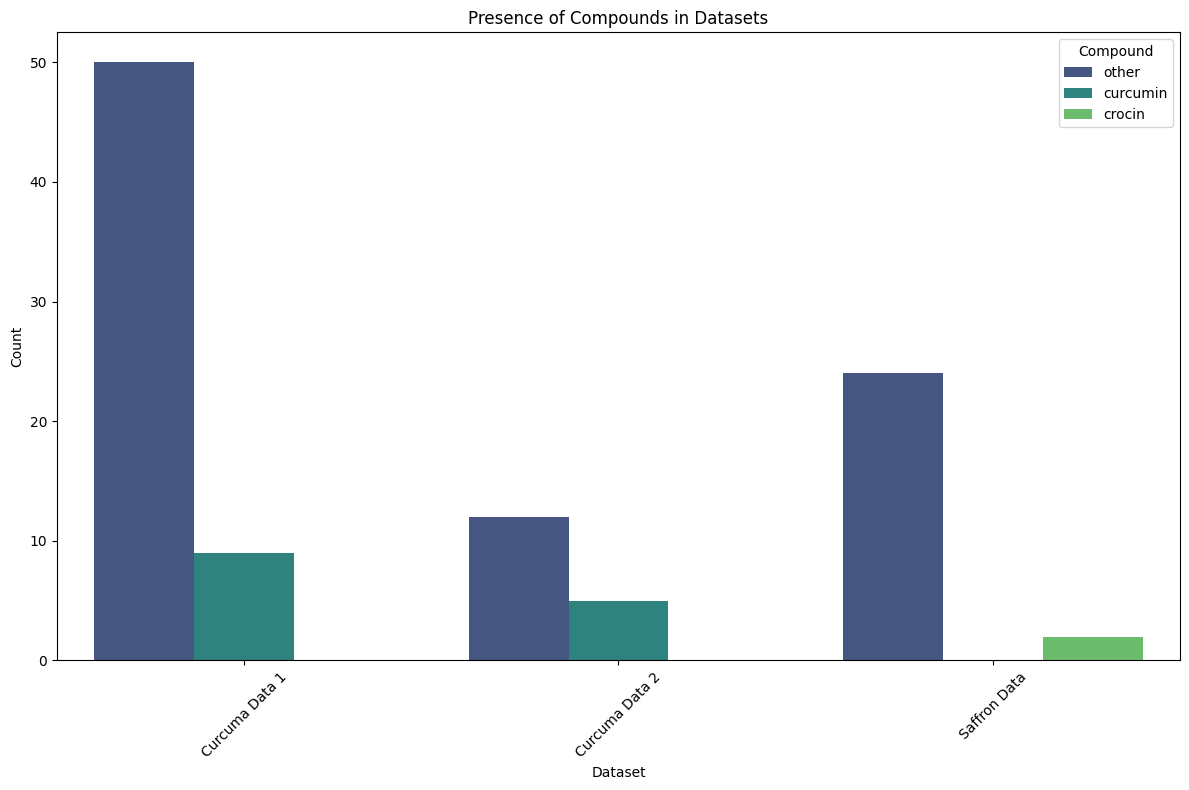

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
curcuma_data1 = pd.read_csv('C:/Users/Muqaddas Bano/Downloads/MTBLS2790_files/m_MTBLS2790_LC-MS_negative_reverse-phase_metabolite_profiling_v2_maf.tsv', sep='\t')
curcuma_data2 = pd.read_csv('C:/Users/Muqaddas Bano/Downloads/MTBLS2790_files/m_MTBLS2790_LC-MS_positive_reverse-phase_metabolite_profiling-1_v2_maf.tsv', sep='\t')
saffron_data = pd.read_csv('C:/Users/Muqaddas Bano/Downloads/MTBLS331_files/m_MTBLS331_uofc_hcc_serum_NMR_spectroscopy_v2_maf.tsv', sep='\t')

# Function to create a compound presence DataFrame
def create_compound_presence_df(data, compound_name, dataset_name):
    data['compound_presence'] = data['metabolite_identification'].apply(lambda x: compound_name if compound_name in str(x).lower() else 'other')
    compound_counts = data['compound_presence'].value_counts().reset_index()
    compound_counts.columns = ['compound', 'count']
    compound_counts['dataset'] = dataset_name
    return compound_counts

# Create compound presence DataFrames
curcuma_data1_compounds = create_compound_presence_df(curcuma_data1, 'curcumin', 'Curcuma Data 1')
curcuma_data2_compounds = create_compound_presence_df(curcuma_data2, 'curcumin', 'Curcuma Data 2')
saffron_data_compounds = create_compound_presence_df(saffron_data, 'crocin', 'Saffron Data')

# Combine all DataFrames
all_compounds = pd.concat([curcuma_data1_compounds, curcuma_data2_compounds, saffron_data_compounds])

# Plotting
plt.figure(figsize=(12, 8))
sns.barplot(data=all_compounds, x='dataset', y='count', hue='compound', palette='viridis')
plt.title('Presence of Compounds in Datasets')
plt.xlabel('Dataset')
plt.ylabel('Count')
plt.legend(title='Compound')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('compound_presence_datasets.jpg', format='jpeg', dpi=300)
plt.show()


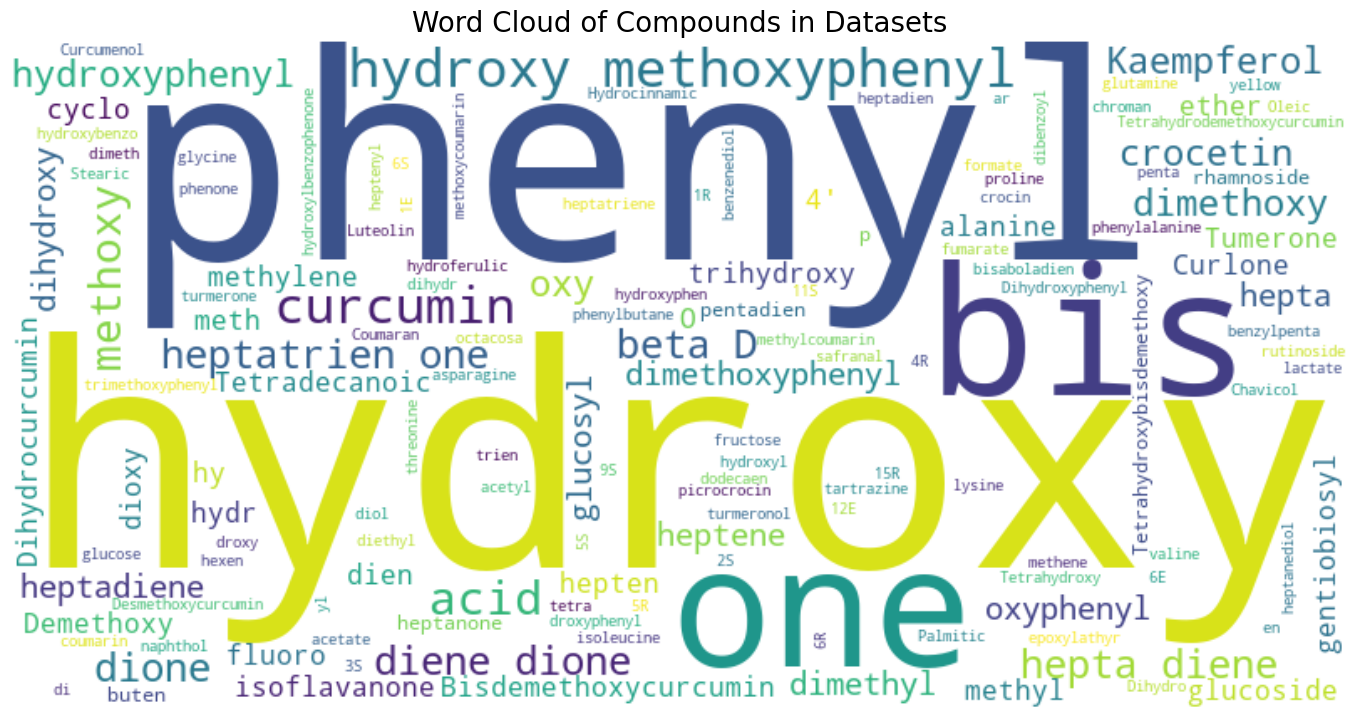

In [11]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Load the data
curcuma_data1 = pd.read_csv('C:/Users/Muqaddas Bano/Downloads/MTBLS2790_files/m_MTBLS2790_LC-MS_negative_reverse-phase_metabolite_profiling_v2_maf.tsv', sep='\t')
curcuma_data2 = pd.read_csv('C:/Users/Muqaddas Bano/Downloads/MTBLS2790_files/m_MTBLS2790_LC-MS_positive_reverse-phase_metabolite_profiling-1_v2_maf.tsv', sep='\t')
saffron_data = pd.read_csv('C:/Users/Muqaddas Bano/Downloads/MTBLS331_files/m_MTBLS331_uofc_hcc_serum_NMR_spectroscopy_v2_maf.tsv', sep='\t')


# Function to create a compound list
def get_compound_list(data):
    compounds = data['metabolite_identification'].dropna().tolist()
    return compounds

# Get compound lists from each dataset
curcuma_compounds1 = get_compound_list(curcuma_data1)
curcuma_compounds2 = get_compound_list(curcuma_data2)
saffron_compounds = get_compound_list(saffron_data)

# Combine all compounds into one list
all_compounds = curcuma_compounds1 + curcuma_compounds2 + saffron_compounds

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis', max_words=200).generate(' '.join(all_compounds))

# Plotting the word cloud
plt.figure(figsize=(15, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Compounds in Datasets', fontsize=20)
plt.tight_layout(pad=0)
plt.savefig('compound_wordcloud.jpg', format='jpeg', dpi=300)
plt.show()


In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
curcuma_data1 = pd.read_csv('C:/Users/Muqaddas Bano/Downloads/MTBLS2790_files/m_MTBLS2790_LC-MS_negative_reverse-phase_metabolite_profiling_v2_maf.tsv', sep='\t')
curcuma_data2 = pd.read_csv('C:/Users/Muqaddas Bano/Downloads/MTBLS2790_files/m_MTBLS2790_LC-MS_positive_reverse-phase_metabolite_profiling-1_v2_maf.tsv', sep='\t')
saffron_data = pd.read_csv('C:/Users/Muqaddas Bano/Downloads/MTBLS331_files/m_MTBLS331_uofc_hcc_serum_NMR_spectroscopy_v2_maf.tsv', sep='\t')

# Function to create a compound presence DataFrame
def create_compound_presence_df(data, dataset_name):
    compound_counts = data['metabolite_identification'].value_counts().reset_index()
    compound_counts.columns = ['compound', 'count']
    compound_counts['dataset'] = dataset_name
    return compound_counts

# Create compound presence DataFrames
curcuma_data1_compounds = create_compound_presence_df(curcuma_data1, 'Curcuma Data 1')
curcuma_data2_compounds = create_compound_presence_df(curcuma_data2, 'Curcuma Data 2')
saffron_data_compounds = create_compound_presence_df(saffron_data, 'Saffron Data')

# Combine all DataFrames
all_compounds = pd.concat([curcuma_data1_compounds, curcuma_data2_compounds, saffron_data_compounds])

# Pivot the DataFrame for the heatmap
heatmap_data = all_compounds.pivot('compound', 'dataset', 'count').fillna(0)

# Plotting
plt.figure(figsize=(15, 10))
sns.heatmap(heatmap_data, annot=True, fmt="g", cmap='viridis', cbar_kws={'label': 'Count'})
plt.title('Heatmap of Compound Presence in Datasets')
plt.xlabel('Dataset')
plt.ylabel('Compound')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('compound_heatmap.jpg', format='jpeg', dpi=300)
plt.show()


TypeError: DataFrame.pivot() takes 1 positional argument but 4 were given

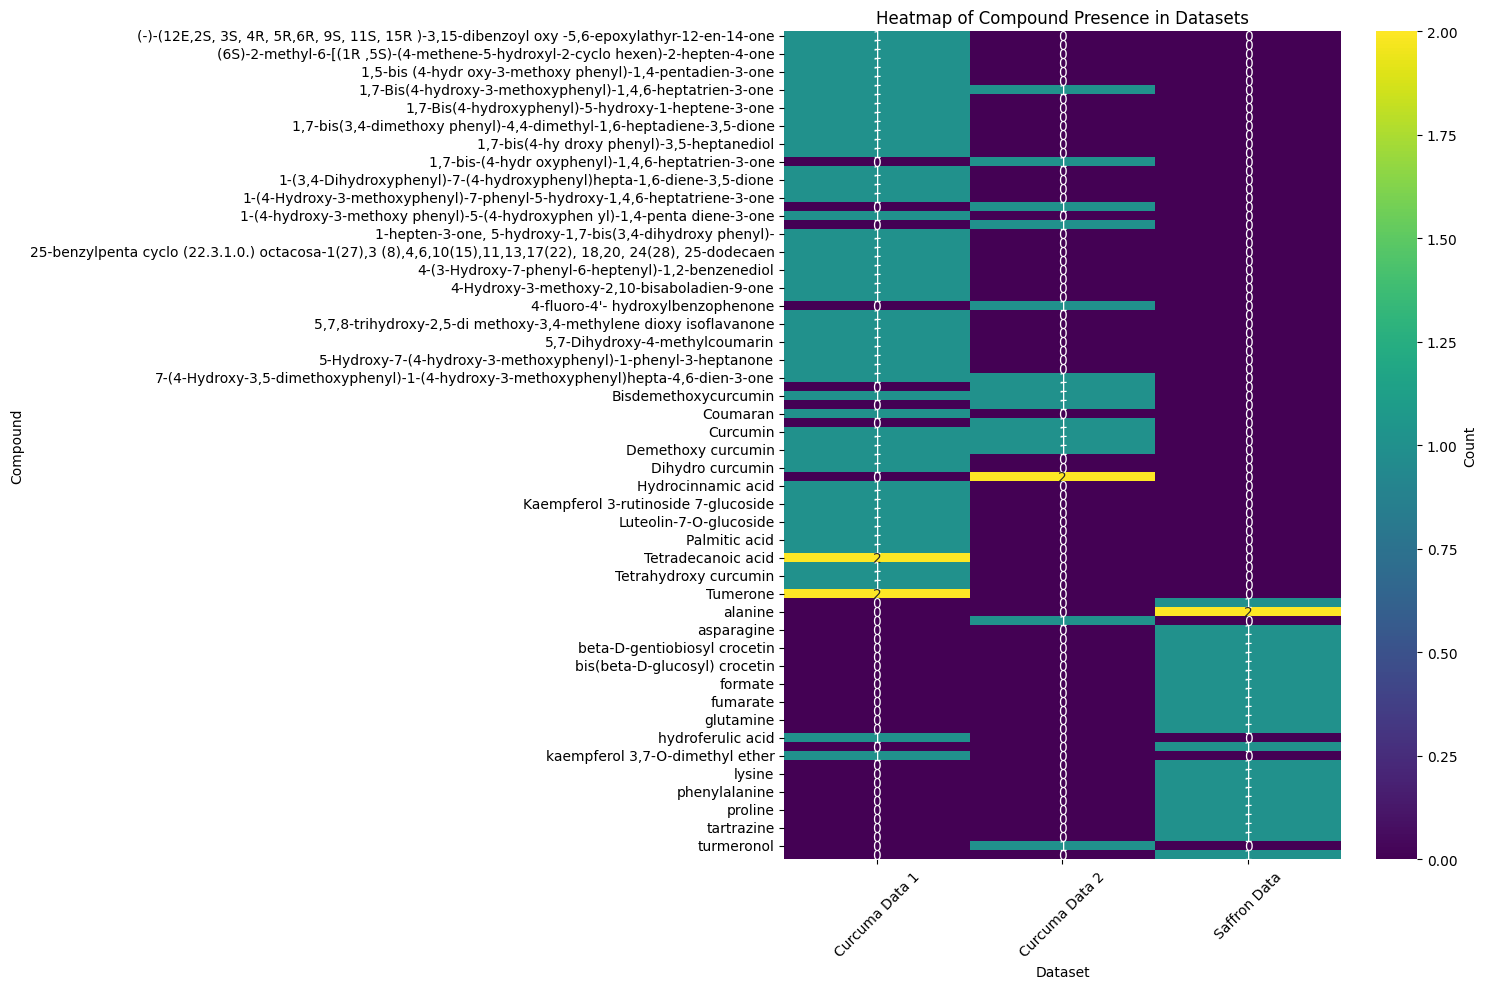

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
curcuma_data1 = pd.read_csv('C:/Users/Muqaddas Bano/Downloads/MTBLS2790_files/m_MTBLS2790_LC-MS_negative_reverse-phase_metabolite_profiling_v2_maf.tsv', sep='\t')
curcuma_data2 = pd.read_csv('C:/Users/Muqaddas Bano/Downloads/MTBLS2790_files/m_MTBLS2790_LC-MS_positive_reverse-phase_metabolite_profiling-1_v2_maf.tsv', sep='\t')
saffron_data = pd.read_csv('C:/Users/Muqaddas Bano/Downloads/MTBLS331_files/m_MTBLS331_uofc_hcc_serum_NMR_spectroscopy_v2_maf.tsv', sep='\t')

# Function to create a compound presence DataFrame
def create_compound_presence_df(data, dataset_name):
    compound_counts = data['metabolite_identification'].value_counts().reset_index()
    compound_counts.columns = ['compound', 'count']
    compound_counts['dataset'] = dataset_name
    return compound_counts

# Create compound presence DataFrames
curcuma_data1_compounds = create_compound_presence_df(curcuma_data1, 'Curcuma Data 1')
curcuma_data2_compounds = create_compound_presence_df(curcuma_data2, 'Curcuma Data 2')
saffron_data_compounds = create_compound_presence_df(saffron_data, 'Saffron Data')

# Combine all DataFrames
all_compounds = pd.concat([curcuma_data1_compounds, curcuma_data2_compounds, saffron_data_compounds])

# Pivot the DataFrame for the heatmap
heatmap_data = all_compounds.pivot_table(index='compound', columns='dataset', values='count', fill_value=0)

# Plotting
plt.figure(figsize=(15, 10))
sns.heatmap(heatmap_data, annot=True, fmt="g", cmap='viridis', cbar_kws={'label': 'Count'})
plt.title('Heatmap of Compound Presence in Datasets')
plt.xlabel('Dataset')
plt.ylabel('Compound')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('compound_heatmap.jpg', format='jpeg', dpi=300)
plt.show()


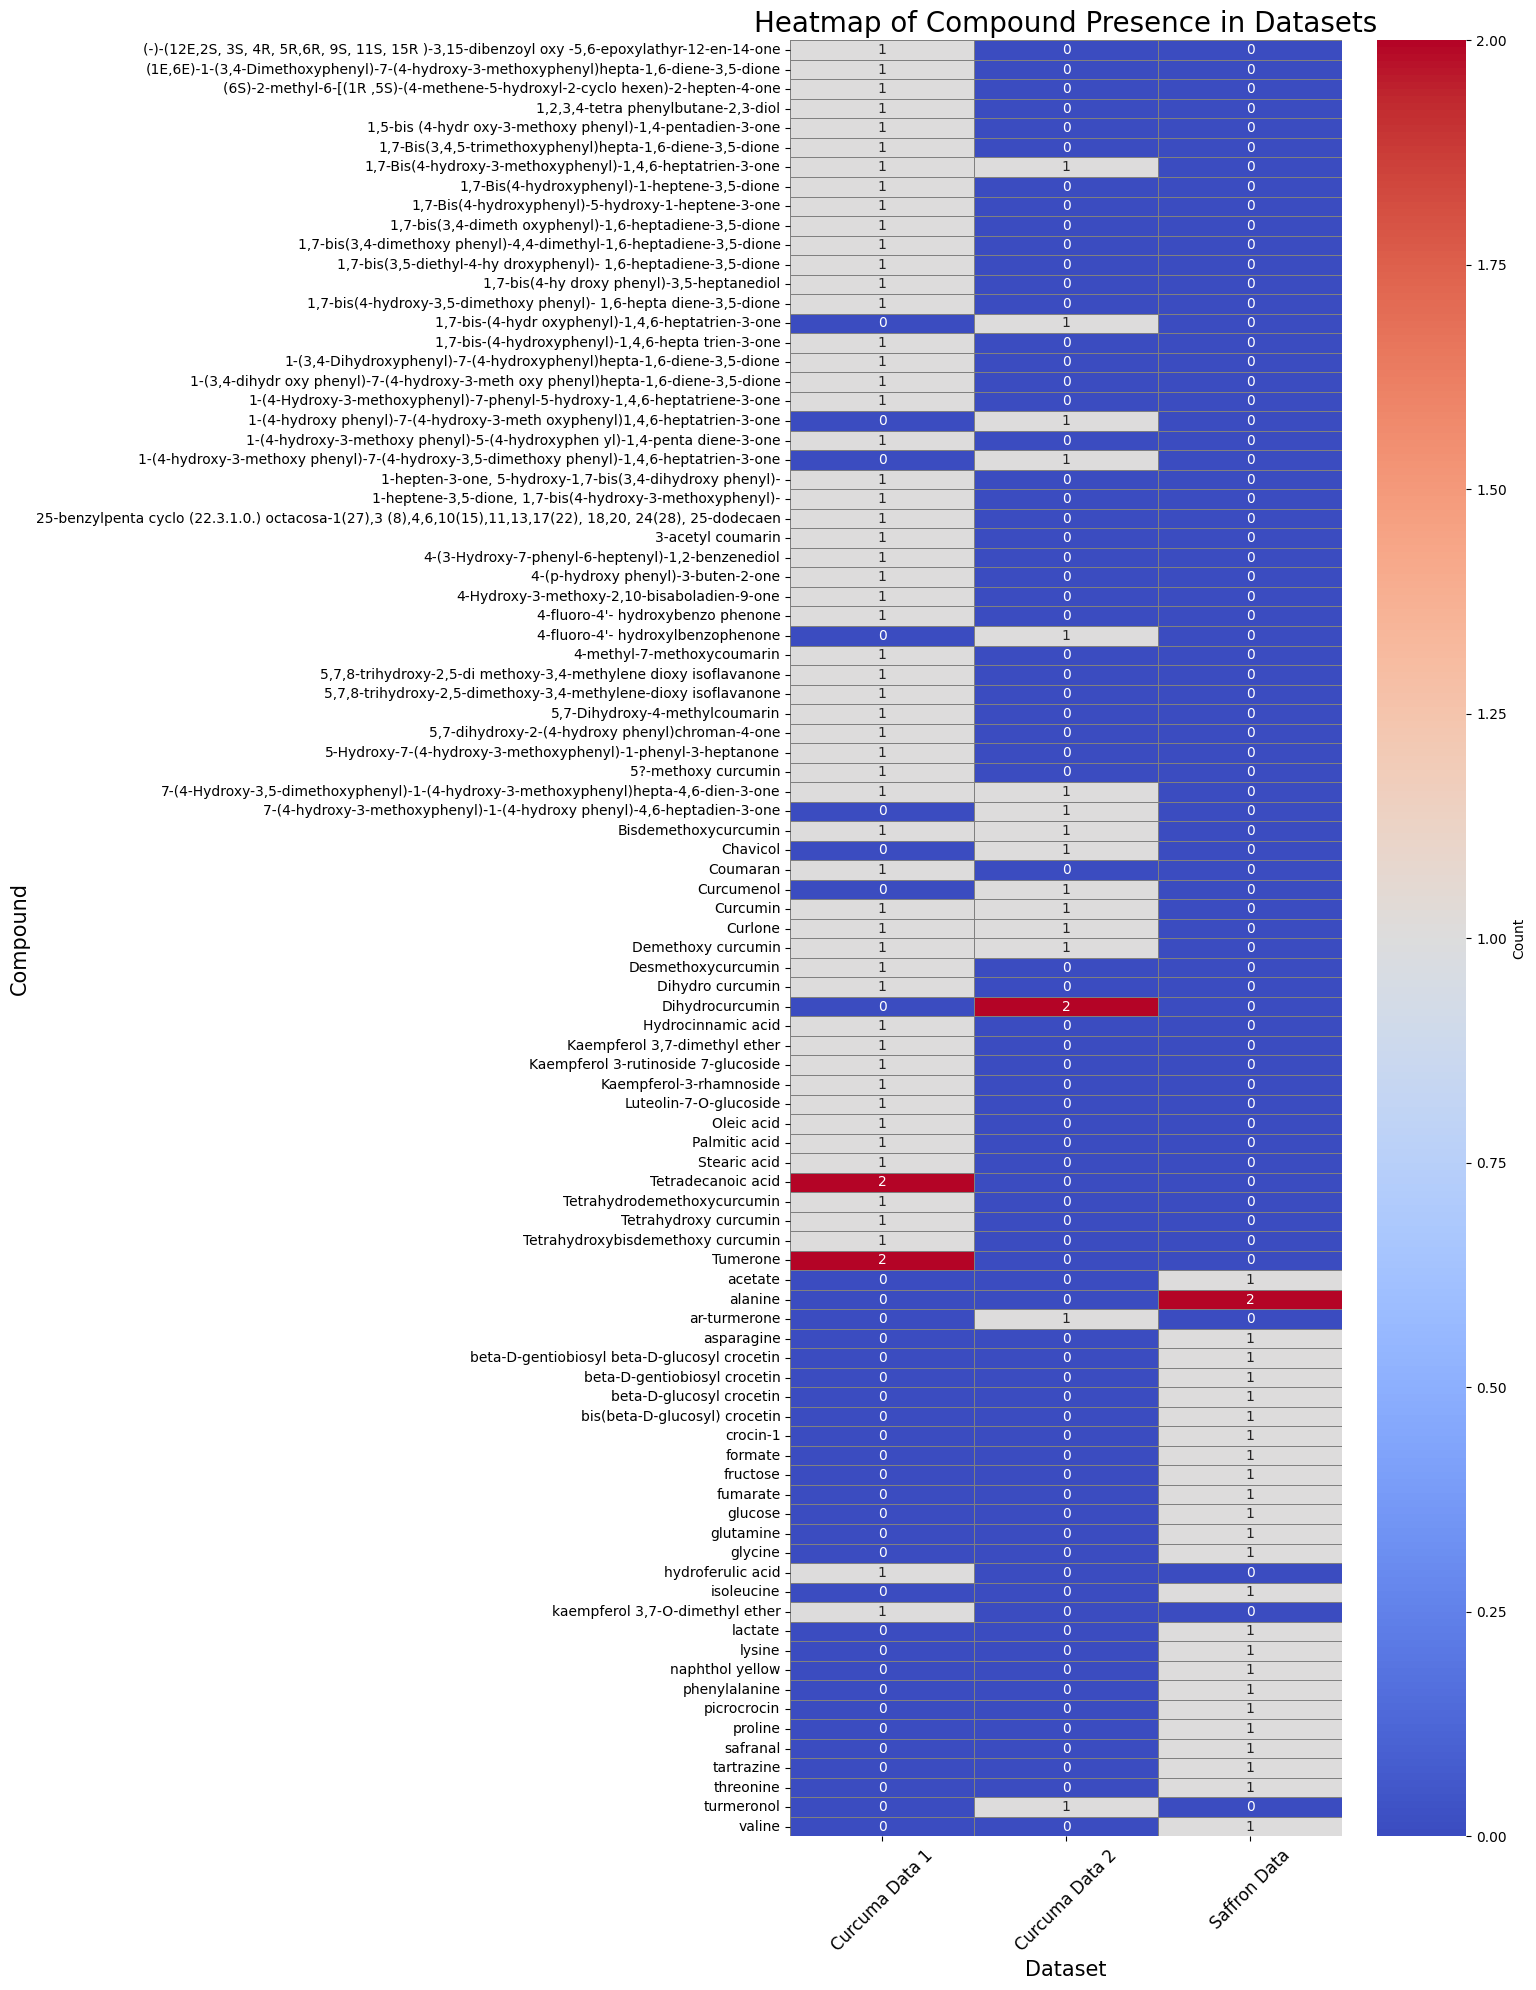

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
curcuma_data1 = pd.read_csv('C:/Users/Muqaddas Bano/Downloads/MTBLS2790_files/m_MTBLS2790_LC-MS_negative_reverse-phase_metabolite_profiling_v2_maf.tsv', sep='\t')
curcuma_data2 = pd.read_csv('C:/Users/Muqaddas Bano/Downloads/MTBLS2790_files/m_MTBLS2790_LC-MS_positive_reverse-phase_metabolite_profiling-1_v2_maf.tsv', sep='\t')
saffron_data = pd.read_csv('C:/Users/Muqaddas Bano/Downloads/MTBLS331_files/m_MTBLS331_uofc_hcc_serum_NMR_spectroscopy_v2_maf.tsv', sep='\t')

# Function to create a compound presence DataFrame
def create_compound_presence_df(data, dataset_name):
    compound_counts = data['metabolite_identification'].value_counts().reset_index()
    compound_counts.columns = ['compound', 'count']
    compound_counts['dataset'] = dataset_name
    return compound_counts

# Create compound presence DataFrames
curcuma_data1_compounds = create_compound_presence_df(curcuma_data1, 'Curcuma Data 1')
curcuma_data2_compounds = create_compound_presence_df(curcuma_data2, 'Curcuma Data 2')
saffron_data_compounds = create_compound_presence_df(saffron_data, 'Saffron Data')

# Combine all DataFrames
all_compounds = pd.concat([curcuma_data1_compounds, curcuma_data2_compounds, saffron_data_compounds])

# Pivot the DataFrame for the heatmap
heatmap_data = all_compounds.pivot_table(index='compound', columns='dataset', values='count', fill_value=0)

# Plotting
plt.figure(figsize=(15, 20))  # Increase figure size for better readability
sns.heatmap(heatmap_data, annot=True, fmt="g", cmap='coolwarm', cbar_kws={'label': 'Count'}, linewidths=.5, linecolor='gray')

# Customizing the plot for better readability
plt.title('Heatmap of Compound Presence in Datasets', fontsize=20)
plt.xlabel('Dataset', fontsize=15)
plt.ylabel('Compound', fontsize=15)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(rotation=0, fontsize=10)  # Keep y-axis labels horizontal for readability

plt.tight_layout()
plt.savefig('compound_heatmap.jpg', format='jpeg', dpi=300)
plt.show()


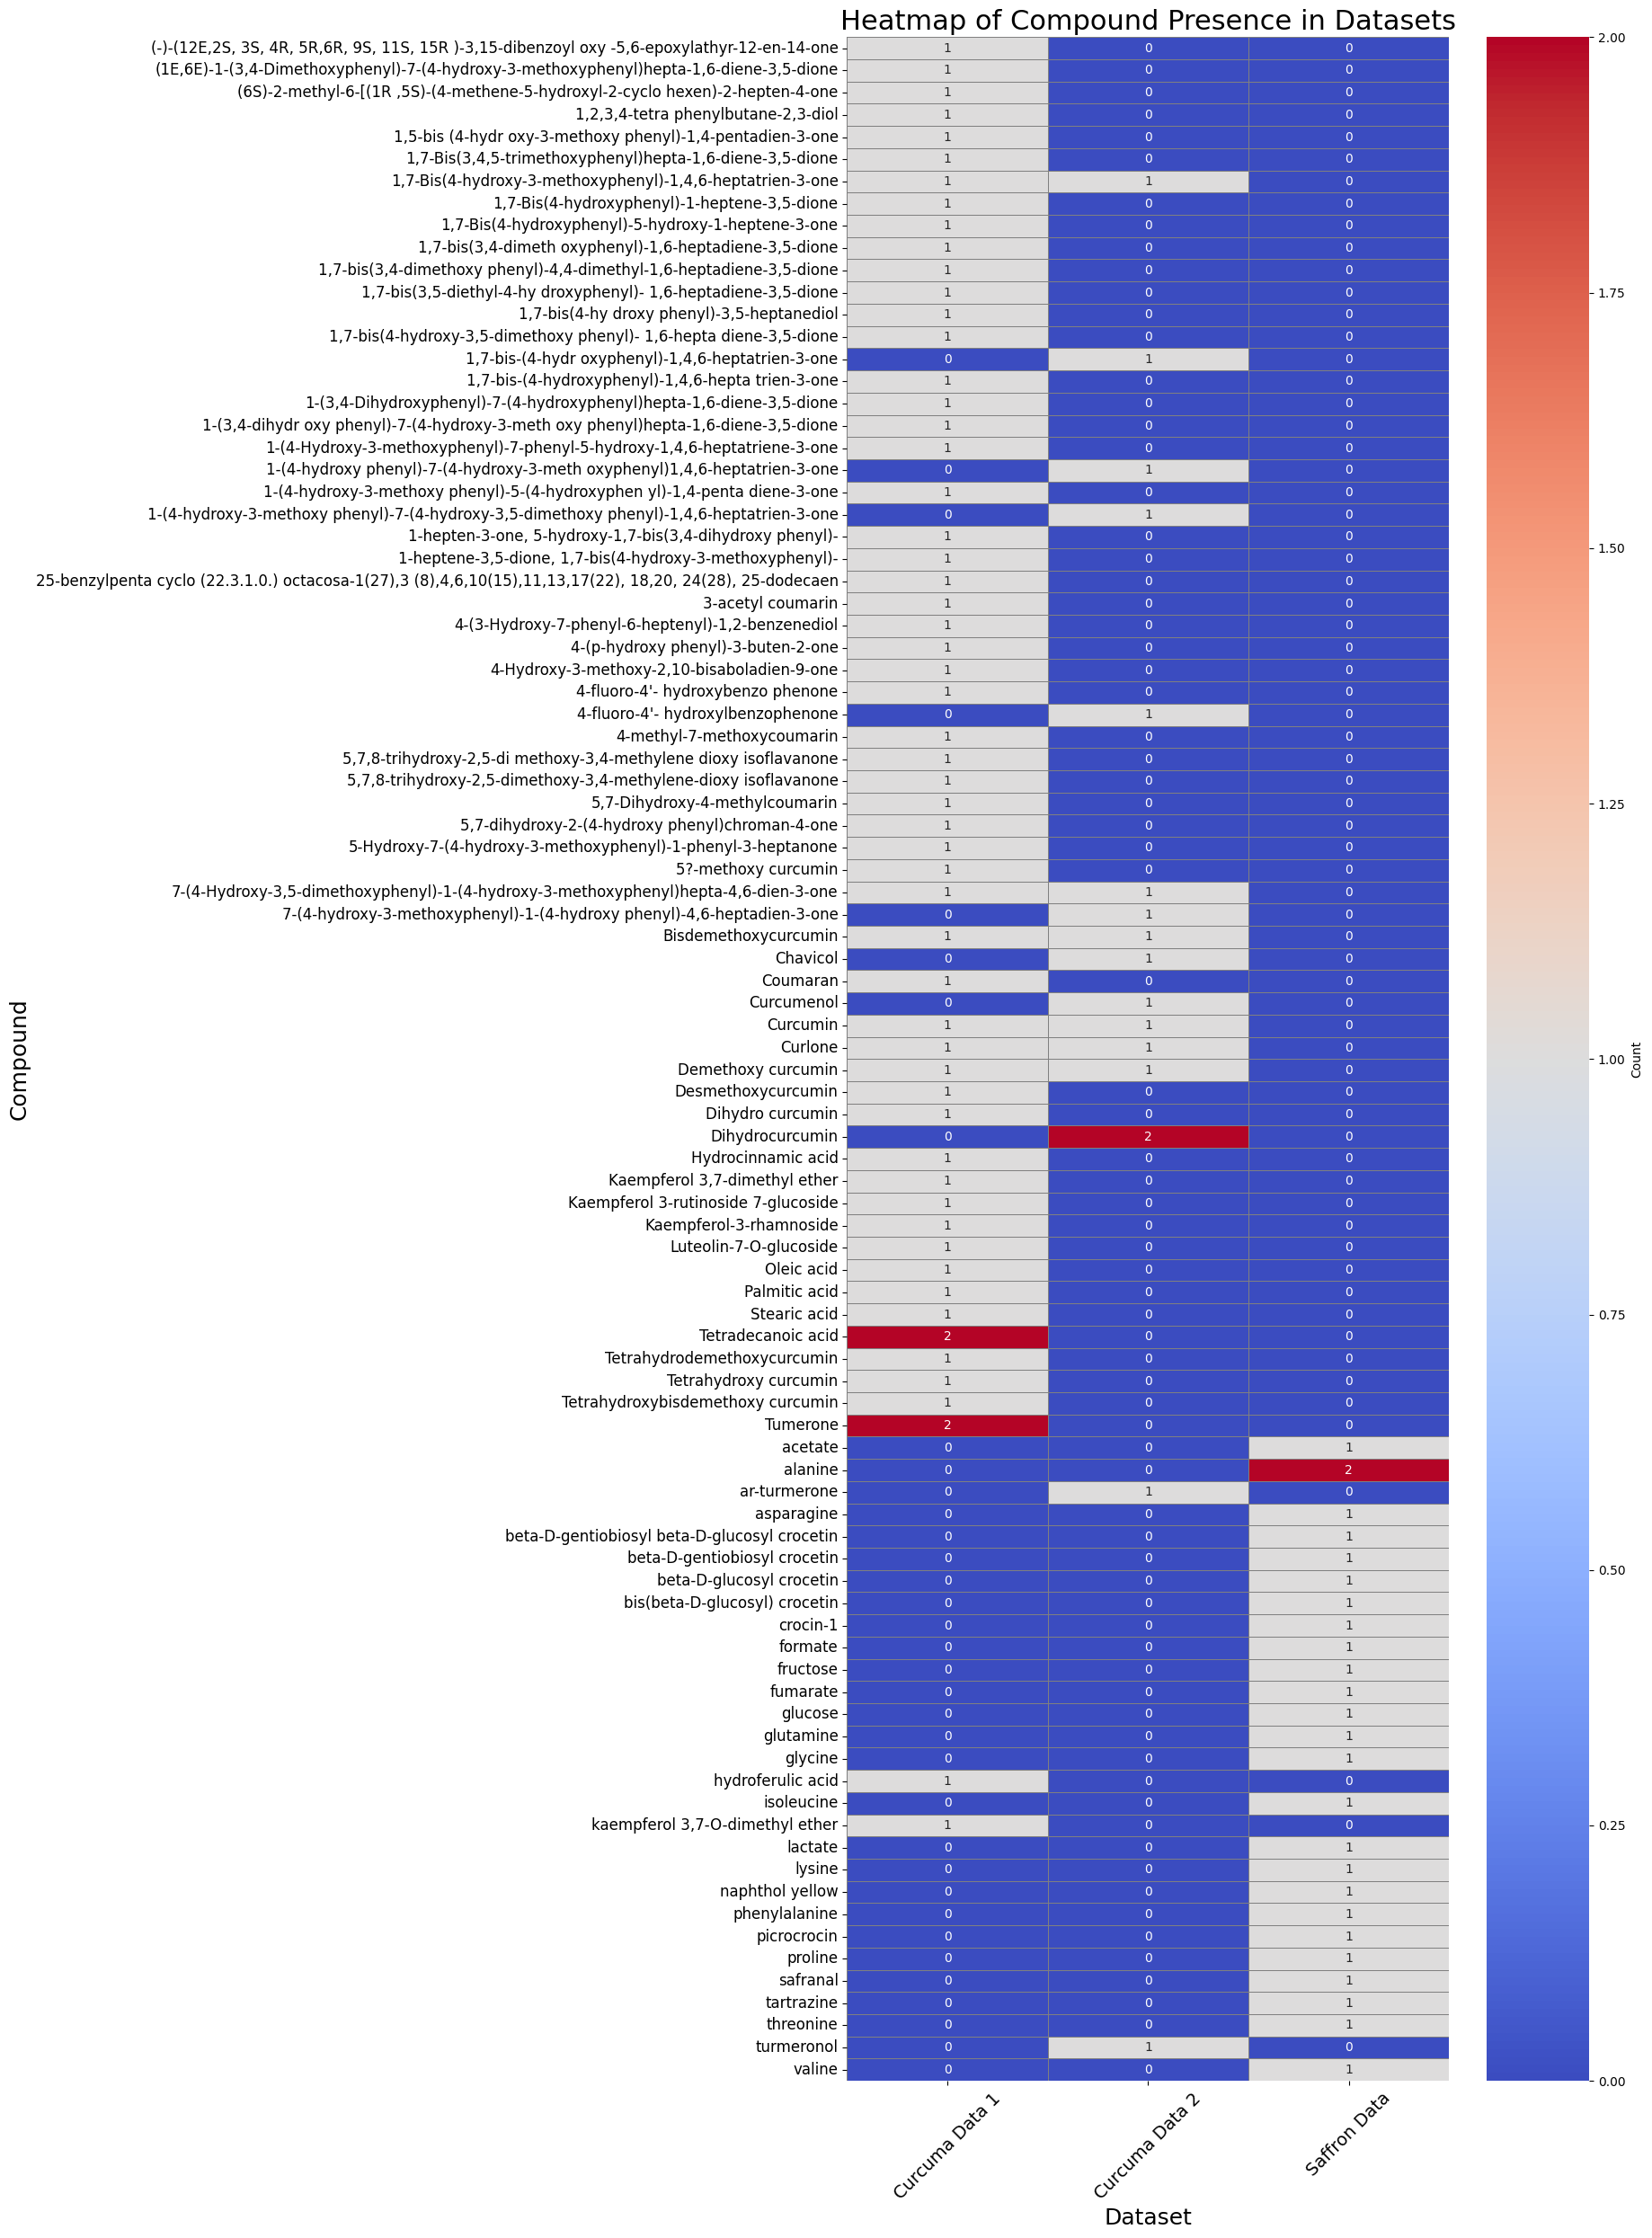

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
curcuma_data1 = pd.read_csv('C:/Users/Muqaddas Bano/Downloads/MTBLS2790_files/m_MTBLS2790_LC-MS_negative_reverse-phase_metabolite_profiling_v2_maf.tsv', sep='\t')
curcuma_data2 = pd.read_csv('C:/Users/Muqaddas Bano/Downloads/MTBLS2790_files/m_MTBLS2790_LC-MS_positive_reverse-phase_metabolite_profiling-1_v2_maf.tsv', sep='\t')
saffron_data = pd.read_csv('C:/Users/Muqaddas Bano/Downloads/MTBLS331_files/m_MTBLS331_uofc_hcc_serum_NMR_spectroscopy_v2_maf.tsv', sep='\t')

# Function to create a compound presence DataFrame
def create_compound_presence_df(data, dataset_name):
    compound_counts = data['metabolite_identification'].value_counts().reset_index()
    compound_counts.columns = ['compound', 'count']
    compound_counts['dataset'] = dataset_name
    return compound_counts

# Create compound presence DataFrames
curcuma_data1_compounds = create_compound_presence_df(curcuma_data1, 'Curcuma Data 1')
curcuma_data2_compounds = create_compound_presence_df(curcuma_data2, 'Curcuma Data 2')
saffron_data_compounds = create_compound_presence_df(saffron_data, 'Saffron Data')

# Combine all DataFrames
all_compounds = pd.concat([curcuma_data1_compounds, curcuma_data2_compounds, saffron_data_compounds])

# Pivot the DataFrame for the heatmap
heatmap_data = all_compounds.pivot_table(index='compound', columns='dataset', values='count', fill_value=0)

# Plotting
plt.figure(figsize=(18, 25))  # Increase figure size for better readability
sns.heatmap(heatmap_data, annot=True, fmt="g", cmap='coolwarm', cbar_kws={'label': 'Count'}, linewidths=.5, linecolor='gray')

# Customizing the plot for better readability
plt.title('Heatmap of Compound Presence in Datasets', fontsize=22)
plt.xlabel('Dataset', fontsize=18)
plt.ylabel('Compound', fontsize=18)
plt.xticks(rotation=45, fontsize=14)
plt.yticks(rotation=0, fontsize=12)  # Keep y-axis labels horizontal for readability

# Adjust the layout to ensure everything fits well
plt.tight_layout()
plt.savefig('compound_heatmap.jpg', format='jpeg', dpi=300)
plt.show()


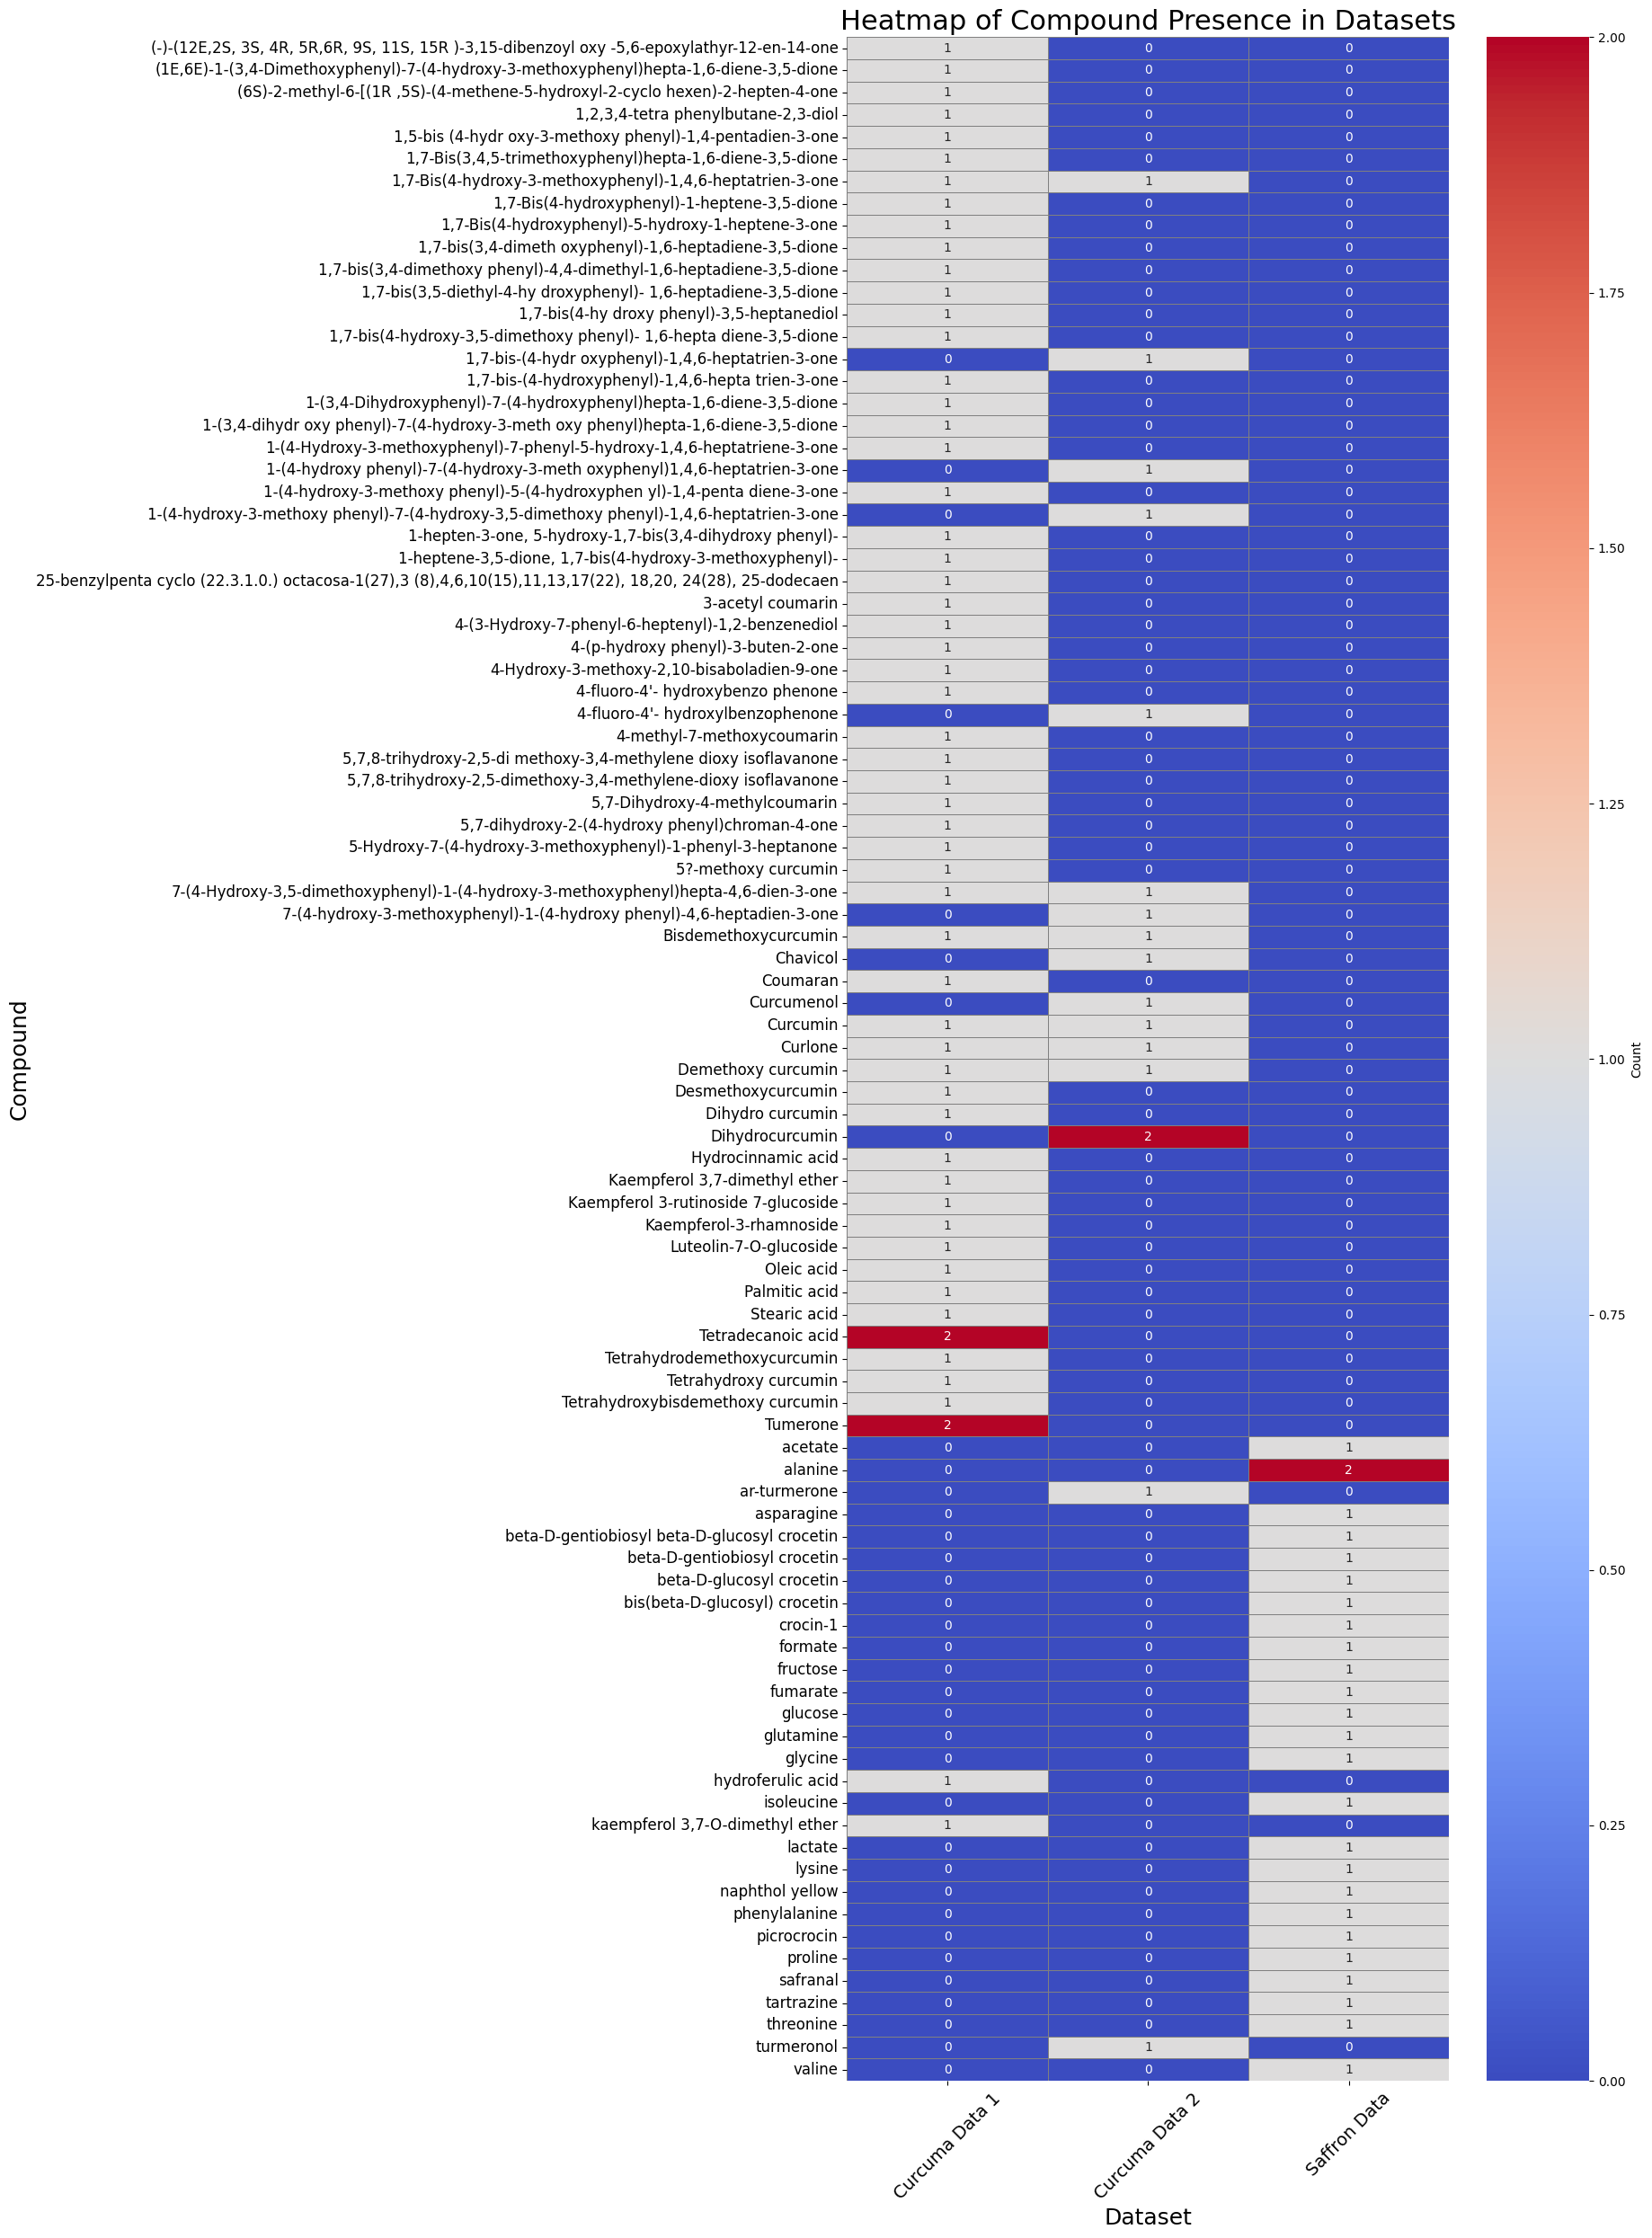

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
curcuma_data1 = pd.read_csv('C:/Users/Muqaddas Bano/Downloads/MTBLS2790_files/m_MTBLS2790_LC-MS_negative_reverse-phase_metabolite_profiling_v2_maf.tsv', sep='\t')
curcuma_data2 = pd.read_csv('C:/Users/Muqaddas Bano/Downloads/MTBLS2790_files/m_MTBLS2790_LC-MS_positive_reverse-phase_metabolite_profiling-1_v2_maf.tsv', sep='\t')
saffron_data = pd.read_csv('C:/Users/Muqaddas Bano/Downloads/MTBLS331_files/m_MTBLS331_uofc_hcc_serum_NMR_spectroscopy_v2_maf.tsv', sep='\t')

# Function to create a compound presence DataFrame
def create_compound_presence_df(data, dataset_name):
    compound_counts = data['metabolite_identification'].value_counts().reset_index()
    compound_counts.columns = ['compound', 'count']
    compound_counts['dataset'] = dataset_name
    return compound_counts

# Create compound presence DataFrames
curcuma_data1_compounds = create_compound_presence_df(curcuma_data1, 'Curcuma Data 1')
curcuma_data2_compounds = create_compound_presence_df(curcuma_data2, 'Curcuma Data 2')
saffron_data_compounds = create_compound_presence_df(saffron_data, 'Saffron Data')

# Combine all DataFrames
all_compounds = pd.concat([curcuma_data1_compounds, curcuma_data2_compounds, saffron_data_compounds])

# Pivot the DataFrame for the heatmap
heatmap_data = all_compounds.pivot_table(index='compound', columns='dataset', values='count', fill_value=0)

# Plotting
plt.figure(figsize=(18, 25))  # Increase figure size for better readability
sns.heatmap(heatmap_data, annot=True, fmt="g", cmap='coolwarm', cbar_kws={'label': 'Count'}, linewidths=.5, linecolor='gray')

# Customizing the plot for better readability
plt.title('Heatmap of Compound Presence in Datasets', fontsize=22)
plt.xlabel('Dataset', fontsize=18)
plt.ylabel('Compound', fontsize=18)
plt.xticks(rotation=45, fontsize=14)
plt.yticks(rotation=0, fontsize=12)  # Keep y-axis labels horizontal for readability

# Adjust the layout to ensure everything fits well
plt.tight_layout()
plt.savefig('compound_heatmap.jpg', format='jpeg', dpi=300)
plt.show()


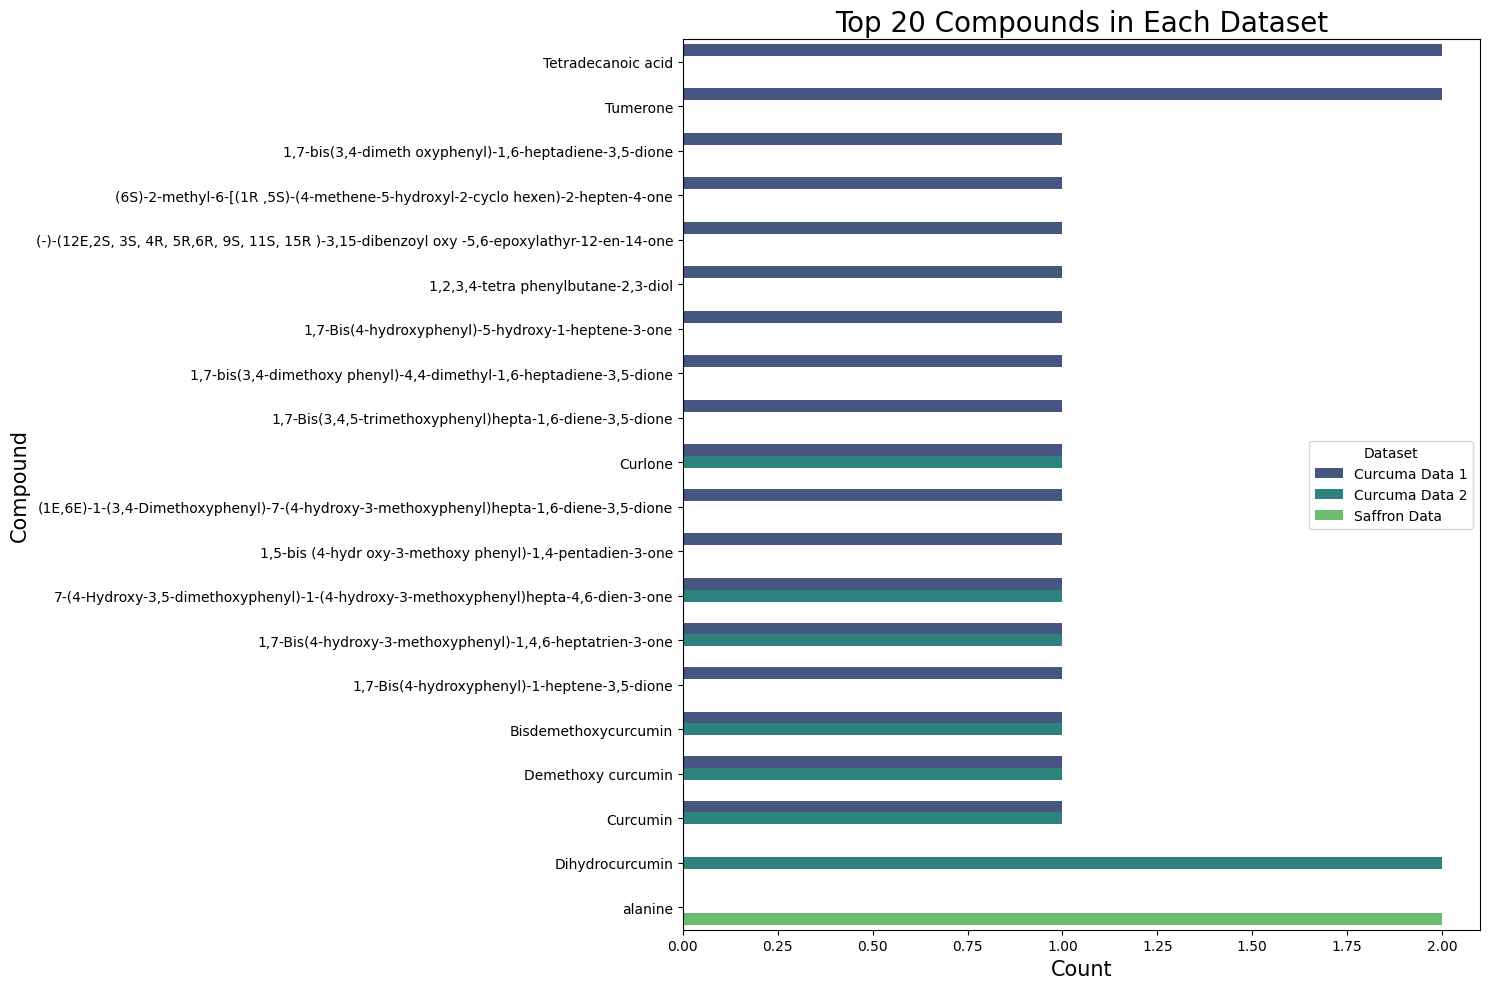

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
curcuma_data1 = pd.read_csv('C:/Users/Muqaddas Bano/Downloads/MTBLS2790_files/m_MTBLS2790_LC-MS_negative_reverse-phase_metabolite_profiling_v2_maf.tsv', sep='\t')
curcuma_data2 = pd.read_csv('C:/Users/Muqaddas Bano/Downloads/MTBLS2790_files/m_MTBLS2790_LC-MS_positive_reverse-phase_metabolite_profiling-1_v2_maf.tsv', sep='\t')
saffron_data = pd.read_csv('C:/Users/Muqaddas Bano/Downloads/MTBLS331_files/m_MTBLS331_uofc_hcc_serum_NMR_spectroscopy_v2_maf.tsv', sep='\t')

# Function to create a compound presence DataFrame
def create_compound_presence_df(data, dataset_name):
    compound_counts = data['metabolite_identification'].value_counts().reset_index()
    compound_counts.columns = ['compound', 'count']
    compound_counts['dataset'] = dataset_name
    return compound_counts

# Create compound presence DataFrames
curcuma_data1_compounds = create_compound_presence_df(curcuma_data1, 'Curcuma Data 1')
curcuma_data2_compounds = create_compound_presence_df(curcuma_data2, 'Curcuma Data 2')
saffron_data_compounds = create_compound_presence_df(saffron_data, 'Saffron Data')

# Combine all DataFrames
all_compounds = pd.concat([curcuma_data1_compounds, curcuma_data2_compounds, saffron_data_compounds])

# Select the top N compounds for comparison
top_n = 20
top_compounds = all_compounds.groupby('compound')['count'].sum().nlargest(top_n).index
top_compounds_df = all_compounds[all_compounds['compound'].isin(top_compounds)]

# Plotting
plt.figure(figsize=(15, 10))
sns.barplot(data=top_compounds_df, x='count', y='compound', hue='dataset', palette='viridis')
plt.title('Top 20 Compounds in Each Dataset', fontsize=20)
plt.xlabel('Count', fontsize=15)
plt.ylabel('Compound', fontsize=15)
plt.legend(title='Dataset')
plt.tight_layout()
plt.savefig('top_compounds_comparison.jpg', format='jpeg', dpi=300)
plt.show()


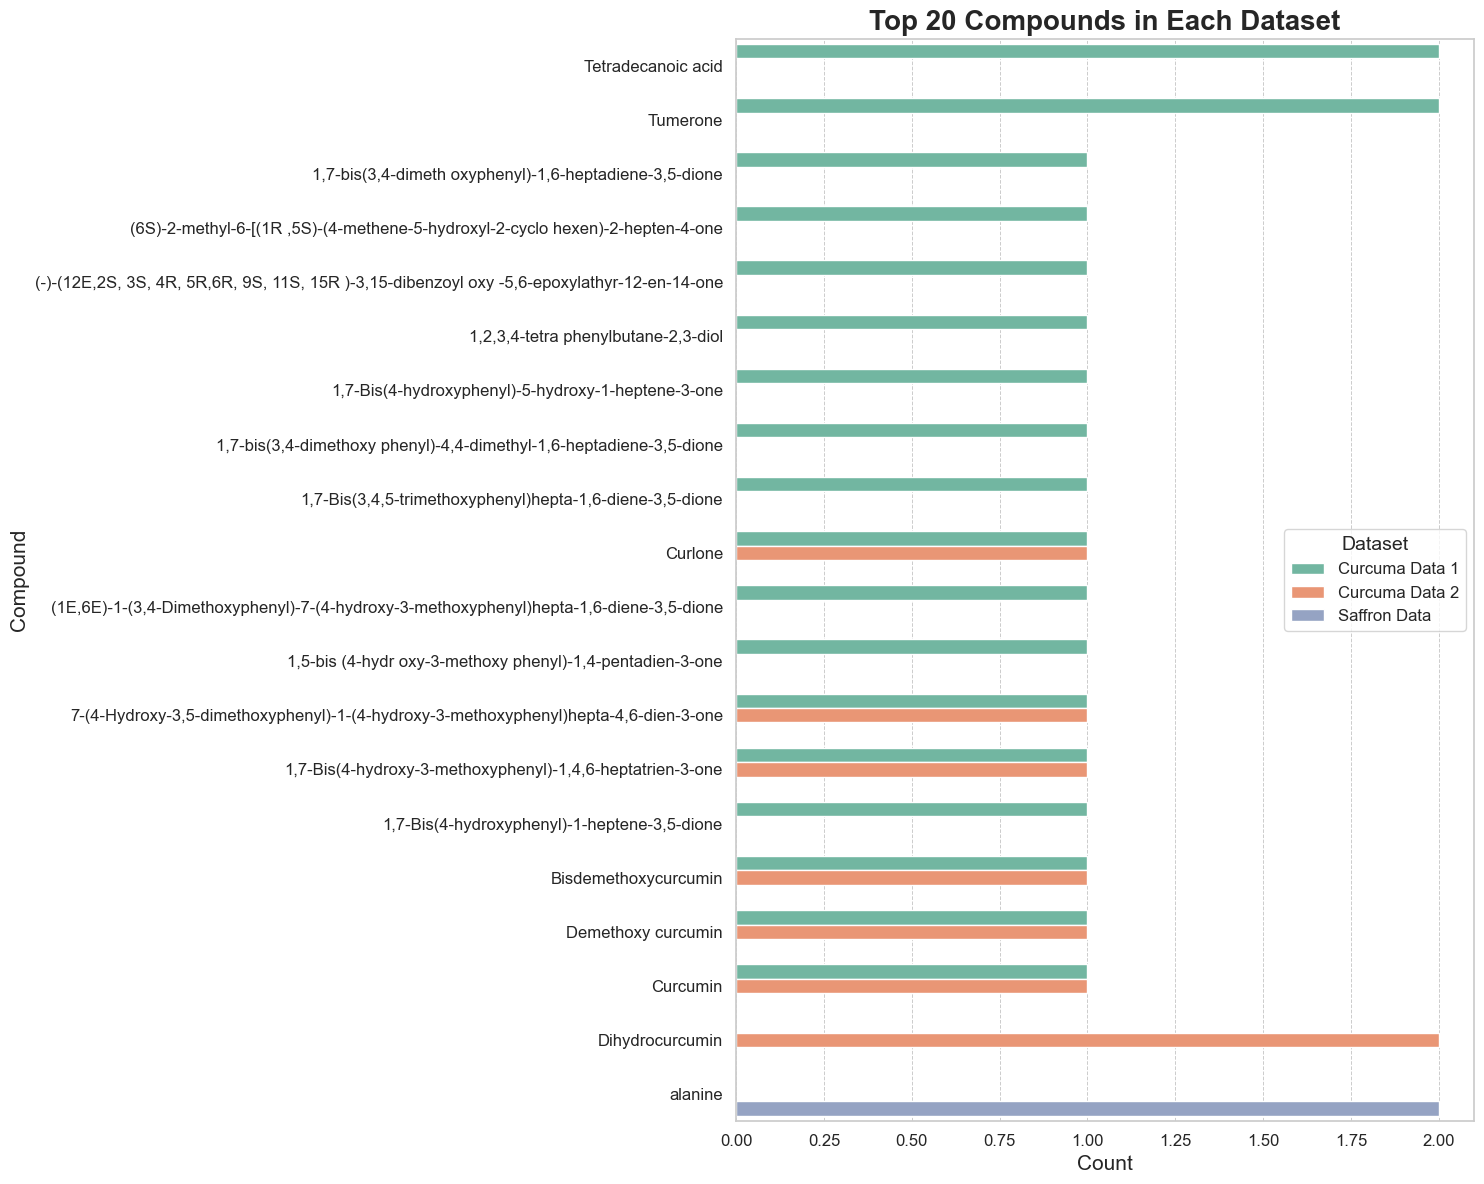

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
curcuma_data1 = pd.read_csv('C:/Users/Muqaddas Bano/Downloads/MTBLS2790_files/m_MTBLS2790_LC-MS_negative_reverse-phase_metabolite_profiling_v2_maf.tsv', sep='\t')
curcuma_data2 = pd.read_csv('C:/Users/Muqaddas Bano/Downloads/MTBLS2790_files/m_MTBLS2790_LC-MS_positive_reverse-phase_metabolite_profiling-1_v2_maf.tsv', sep='\t')
saffron_data = pd.read_csv('C:/Users/Muqaddas Bano/Downloads/MTBLS331_files/m_MTBLS331_uofc_hcc_serum_NMR_spectroscopy_v2_maf.tsv', sep='\t')


# Function to create a compound presence DataFrame
def create_compound_presence_df(data, dataset_name):
    compound_counts = data['metabolite_identification'].value_counts().reset_index()
    compound_counts.columns = ['compound', 'count']
    compound_counts['dataset'] = dataset_name
    return compound_counts

# Create compound presence DataFrames
curcuma_data1_compounds = create_compound_presence_df(curcuma_data1, 'Curcuma Data 1')
curcuma_data2_compounds = create_compound_presence_df(curcuma_data2, 'Curcuma Data 2')
saffron_data_compounds = create_compound_presence_df(saffron_data, 'Saffron Data')

# Combine all DataFrames
all_compounds = pd.concat([curcuma_data1_compounds, curcuma_data2_compounds, saffron_data_compounds])

# Select the top N compounds for comparison
top_n = 20
top_compounds = all_compounds.groupby('compound')['count'].sum().nlargest(top_n).index
top_compounds_df = all_compounds[all_compounds['compound'].isin(top_compounds)]

# Plotting
plt.figure(figsize=(15, 12))
sns.set(style="whitegrid")
sns.barplot(data=top_compounds_df, x='count', y='compound', hue='dataset', palette='Set2')

# Customizing the plot
plt.title('Top 20 Compounds in Each Dataset', fontsize=20, weight='bold')
plt.xlabel('Count', fontsize=15)
plt.ylabel('Compound', fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='Dataset', fontsize=12, title_fontsize=14)
plt.grid(axis='x', linestyle='--', linewidth=0.7)

# Adjust the layout to ensure everything fits well
plt.tight_layout()
plt.savefig('top_compounds_comparison.jpg', format='jpeg', dpi=300)
plt.show()
